In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


#CRAB

##READ DATA

In [5]:
df_crab = pd.read_csv("crab_data.txt", sep=";", header=None)
df_crab = df_crab.drop(6,axis=1)
df_crab.columns = ["Event","Cloud_num","X_pos","Y_pos","Z_pos","Energy"]

In [6]:
df_crab

Event  Cloud_num    X_pos     Y_pos     Z_pos    Energy
0           1          0  21.7369  14.04840  0.002678   0.14664
1           1          1  21.7369  14.04830  0.002701   5.14605
2           1          2  21.7369  14.04840  0.002677   0.03256
3           1          3  21.7369  14.04840  0.002678   0.03317
4           1          4  21.7369  14.04840  0.002678   0.02242
...       ...        ...      ...       ...       ...       ...
785546  40798         11  13.3868   3.13599  4.901200  40.70680
785547  40798         12  13.3866   3.13684  4.901980   0.03677
785548  40798         13  13.3866   3.13684  4.901980   0.03825
785549  40798         14  13.3866   3.13684  4.901980   0.32370
785550  40798         15  13.3866   3.13684  4.901980   0.12758

[785551 rows x 6 columns]

In [7]:
df_crab.describe().T 

count          mean           std           min           25%  \
Event      785551.0  23452.886860  11604.026701  1.000000e+00  14036.000000   
Cloud_num  785551.0     11.519382      9.184299  0.000000e+00      4.000000   
X_pos      785551.0     12.730456      7.335553 -8.612210e-16      6.266920   
Y_pos      785551.0     13.248724      7.343234  4.500000e-01      6.629740   
Z_pos      785551.0      0.344641      0.748472  0.000000e+00      0.032142   
Energy     785551.0      1.949486      7.812860  4.811720e-04      0.023030   

                    50%           75%          max  
Event      25408.000000  33327.000000  40798.00000  
Cloud_num     10.000000     17.000000     84.00000  
X_pos         12.983100     19.179550     25.40000  
Y_pos         13.426800     19.608600     25.85000  
Z_pos          0.093784      0.260982      4.99982  
Energy         0.045840      0.385380    175.85800

In [8]:
df_crab.dtypes

Event          int64
Cloud_num      int64
X_pos        float64
Y_pos        float64
Z_pos        float64
Energy       float64
dtype: object

In [9]:
df_crab.isnull().sum() / df_crab.shape[0]

Event        0.0
Cloud_num    0.0
X_pos        0.0
Y_pos        0.0
Z_pos        0.0
Energy       0.0
dtype: float64

In [10]:
df_crab[df_crab.X_pos < 0]

Event  Cloud_num         X_pos    Y_pos     Z_pos    Energy
142275  10141         10 -8.612210e-16  20.5795  0.052194  0.002453

In [11]:
df_crab = df_crab.drop(labels=[142275], axis=0)
df_crab = df_crab.reset_index(drop=True)

In [12]:
deneme = df_crab.copy()

In [13]:
deneme['Energy_sum'] = deneme.groupby('Event').Energy.transform(sum)

In [14]:
def for_weighted_xpos(row):
  x_pos_sum = row.X_pos*row.Energy
  return x_pos_sum
def for_weighted_ypos(row):
  y_pos_sum = row.Y_pos*row.Energy
  return y_pos_sum
def for_weighted_zpos(row):
  z_pos_sum = row.Z_pos*row.Energy
  return z_pos_sum

deneme['for_xpos'] = deneme.apply(for_weighted_xpos, axis=1)
deneme['for_ypos'] = deneme.apply(for_weighted_ypos, axis=1)
deneme['for_zpos'] = deneme.apply(for_weighted_zpos, axis=1)

In [15]:
deneme['X_pos_sum'] = deneme.groupby('Event').for_xpos.transform(sum)
deneme['Y_pos_sum'] = deneme.groupby('Event').for_ypos.transform(sum)
deneme['Z_pos_sum'] = deneme.groupby('Event').for_zpos.transform(sum)

In [16]:
deneme['weighted_Xpos'] = deneme.apply(lambda x: x['X_pos_sum']/x['Energy_sum'],axis=1)
deneme['weighted_Ypos'] = deneme.apply(lambda x: x['Y_pos_sum']/x['Energy_sum'],axis=1)
deneme['weighted_Zpos'] = deneme.apply(lambda x: x['Z_pos_sum']/x['Energy_sum'],axis=1)

In [17]:
deneme = deneme[(deneme.Cloud_num == 0) & (deneme.Energy_sum <= 800)].reset_index(drop=True)

In [18]:
deneme = deneme[['Event','weighted_Xpos','weighted_Ypos','weighted_Zpos','Energy_sum']]

In [19]:
deneme

Event  weighted_Xpos  weighted_Ypos  weighted_Zpos  Energy_sum
0          1      21.736900      14.048349       0.002686   10.085050
1          2      15.547060       5.981963       0.012055   10.169700
2          3      16.850200      14.159600       0.019064   10.020920
3          4      13.114100       9.450865       0.004870   10.056120
4          5      10.757151      16.919600       0.002706   10.149240
...      ...            ...            ...            ...         ...
40793  40794      19.708380       2.491993       1.694119  116.434866
40794  40795      20.947079      21.067507       3.752689  198.261000
40795  40796       6.339163       0.976521       1.113457  197.170000
40796  40797      17.542964      19.985518       1.245543  197.755000
40797  40798      13.424553       3.092605       4.867849   67.417800

[40798 rows x 5 columns]

##WEIGHTED HISTOGRAMS


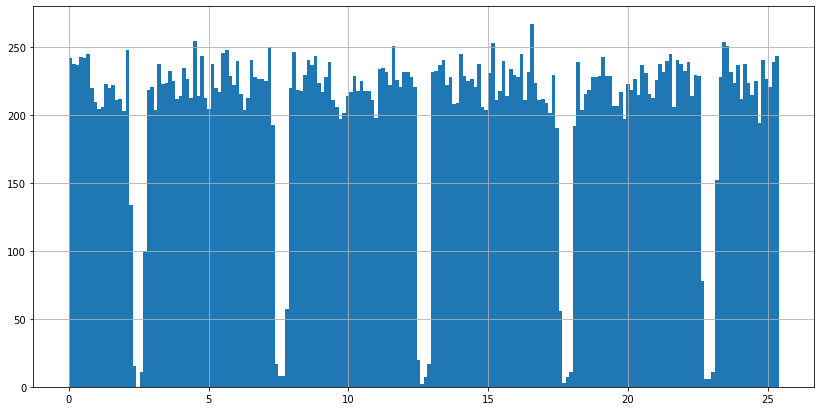

In [ ]:
deneme.weighted_Xpos.hist(bins=200,figsize=(14,7))

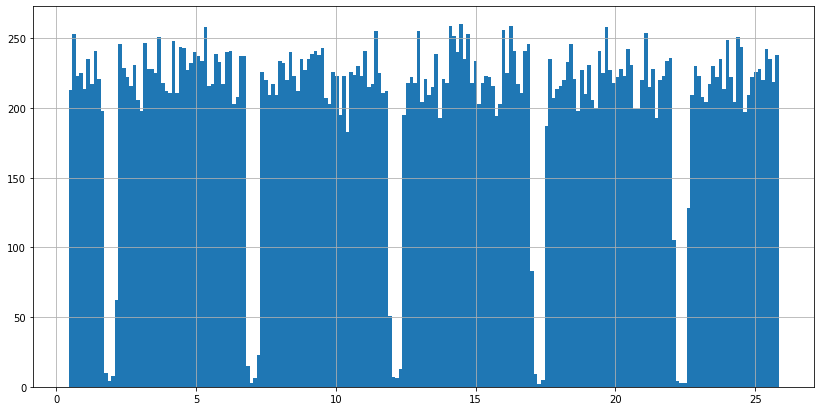

In [ ]:
deneme.weighted_Ypos.hist(bins=200,figsize=(14,7))

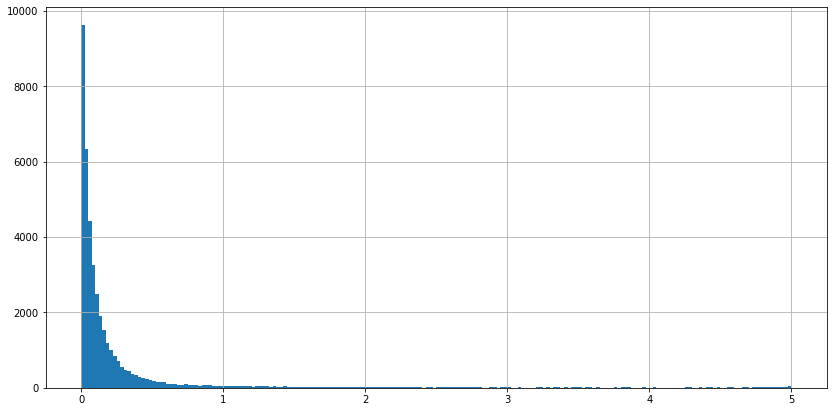

In [ ]:
deneme.weighted_Zpos.hist(bins=200,figsize=(14,7))

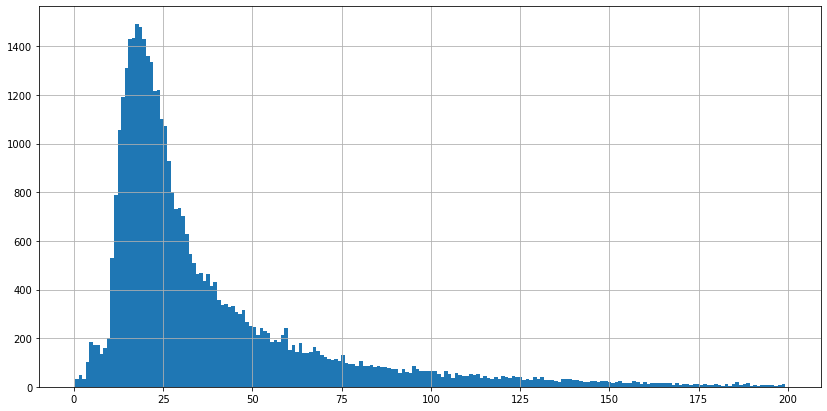

In [ ]:
deneme.Energy_sum.hist(bins=200,figsize=(14,7))

##SPECIAL HISTOGRAMS (weighted)


###60 80

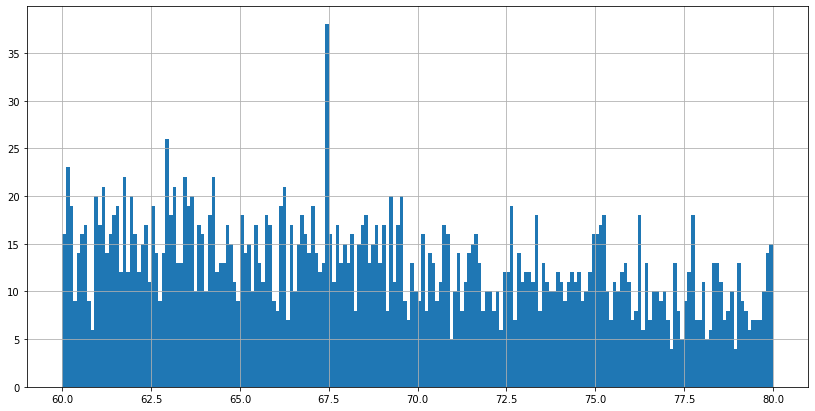

In [ ]:
deneme[(deneme.Energy_sum >= 60) & (deneme.Energy_sum <= 80)].Energy_sum.hist(bins=200,figsize=(14,7))

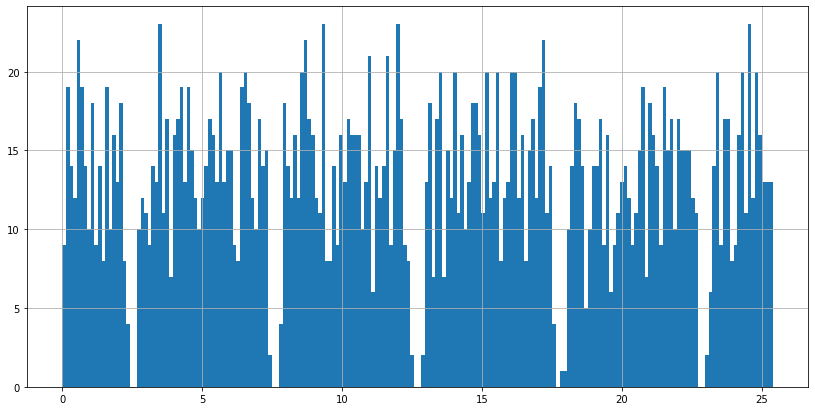

In [ ]:
deneme[(deneme.Energy_sum >= 60) & (deneme.Energy_sum <= 80)].weighted_Xpos.hist(bins=200,figsize=(14,7))

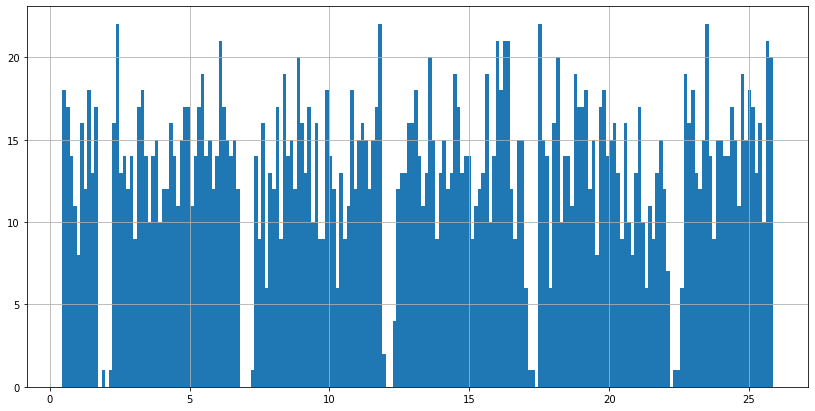

In [ ]:
deneme[(deneme.Energy_sum >= 60) & (deneme.Energy_sum <= 80)].weighted_Ypos.hist(bins=200,figsize=(14,7))

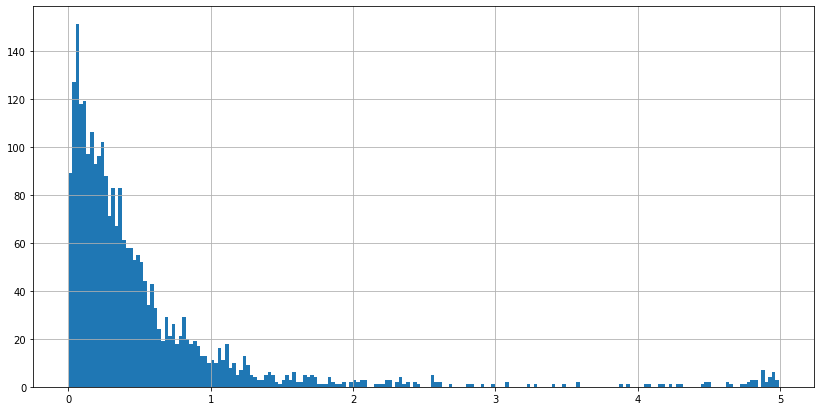

In [ ]:
deneme[(deneme.Energy_sum >= 60) & (deneme.Energy_sum <= 80)].weighted_Zpos.hist(bins=200,figsize=(14,7))

###20 200

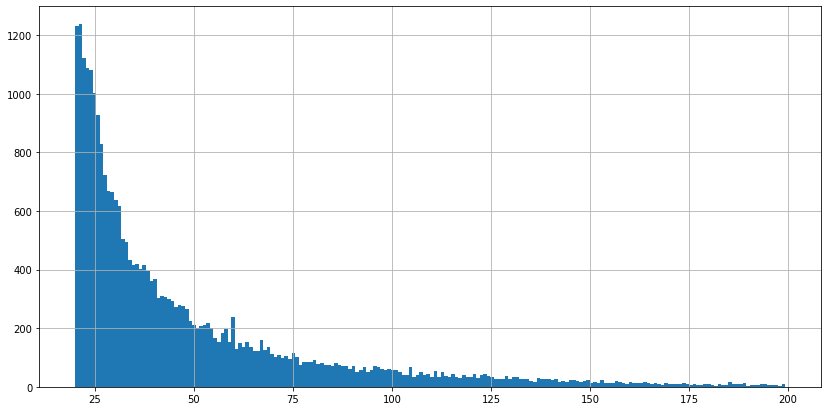

In [ ]:
deneme[(deneme.Energy_sum >= 20) & (deneme.Energy_sum <= 200)].Energy_sum.hist(bins=200,figsize=(14,7))

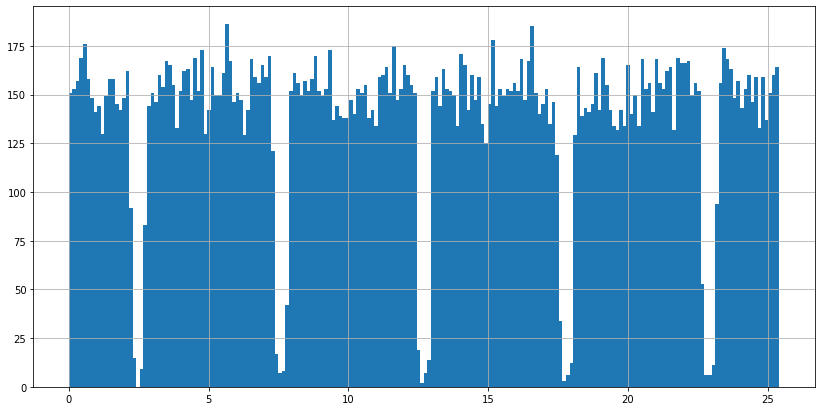

In [ ]:
deneme[(deneme.Energy_sum >= 20) & (deneme.Energy_sum <= 200)].weighted_Xpos.hist(bins=200,figsize=(14,7))

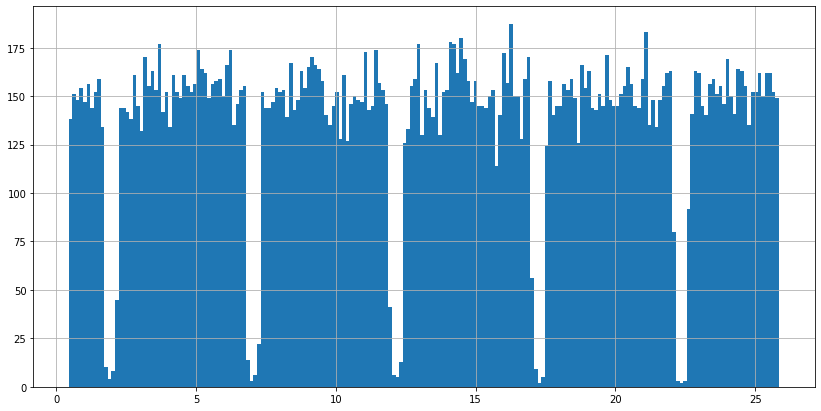

In [ ]:
deneme[(deneme.Energy_sum >= 20) & (deneme.Energy_sum <= 200)].weighted_Ypos.hist(bins=200,figsize=(14,7))

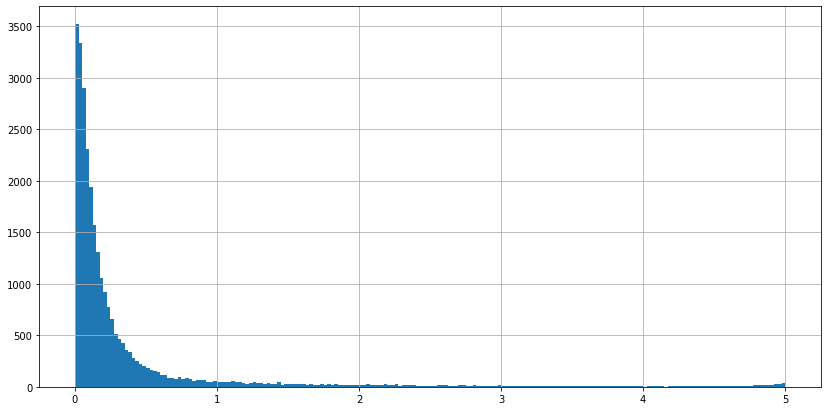

In [ ]:
deneme[(deneme.Energy_sum >= 20) & (deneme.Energy_sum <= 200)].weighted_Zpos.hist(bins=200,figsize=(14,7))

##K-MEANS

###20 200


In [ ]:
deneme2 = deneme[(deneme.Energy_sum >= 20) & (deneme.Energy_sum <= 200)]

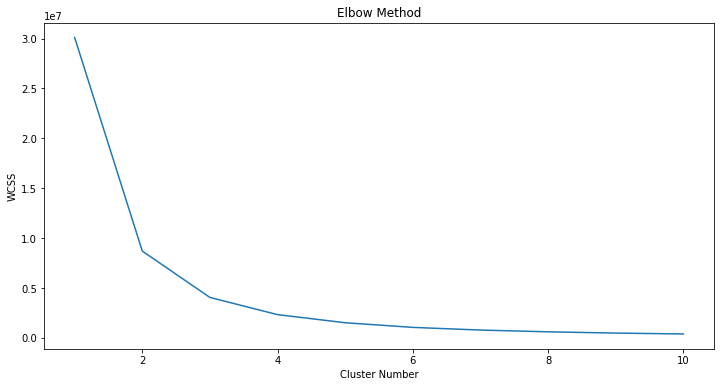

In [ ]:
X = deneme2.iloc[:,[4,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

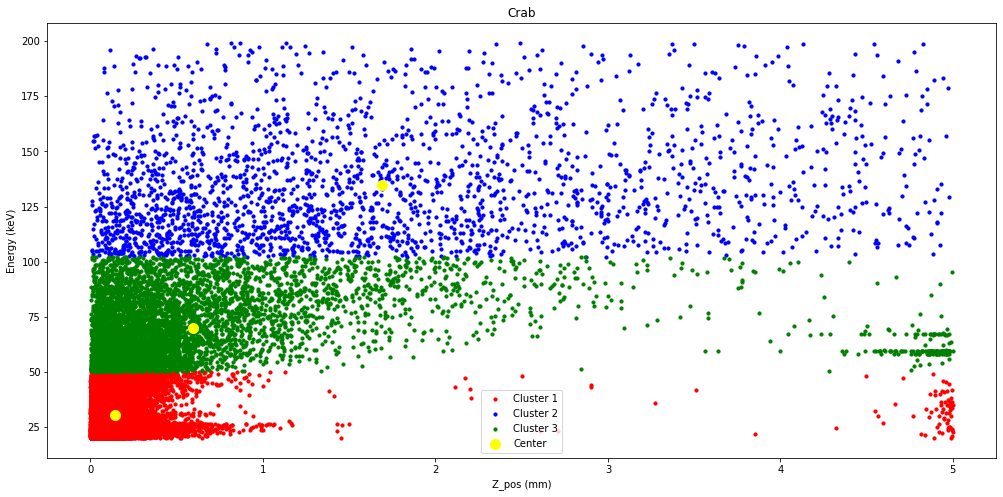

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Center')
plt.title("Crab")
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

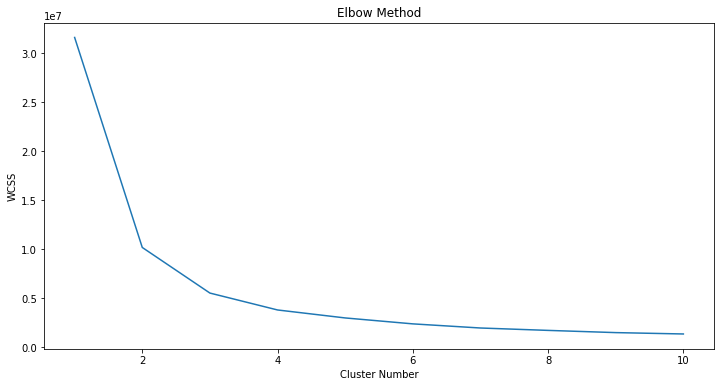

In [ ]:
X = deneme2.iloc[:,[3,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

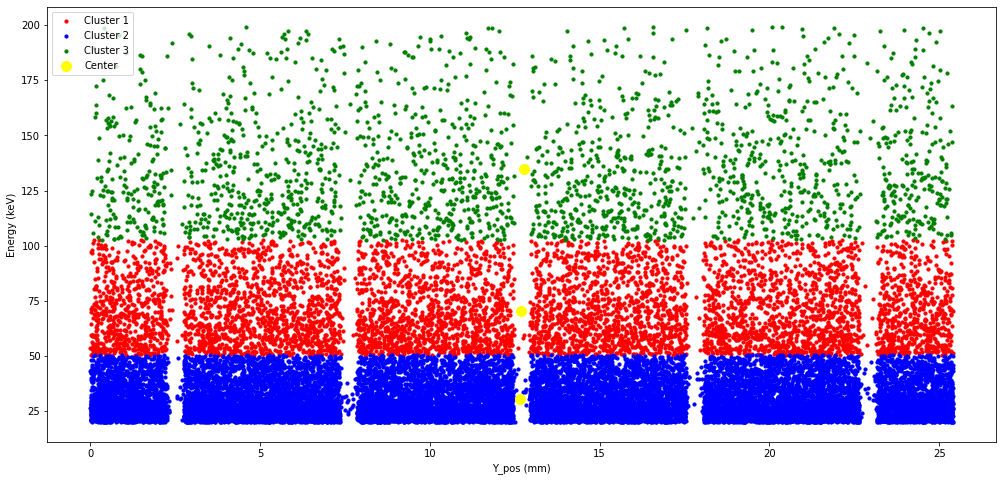

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Center')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

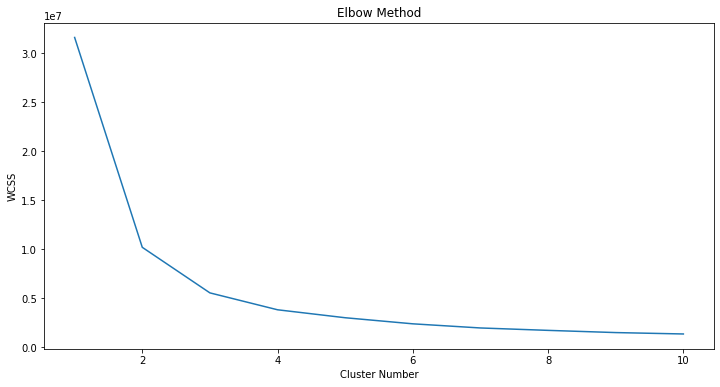

In [ ]:
X = deneme2.iloc[:,[2,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

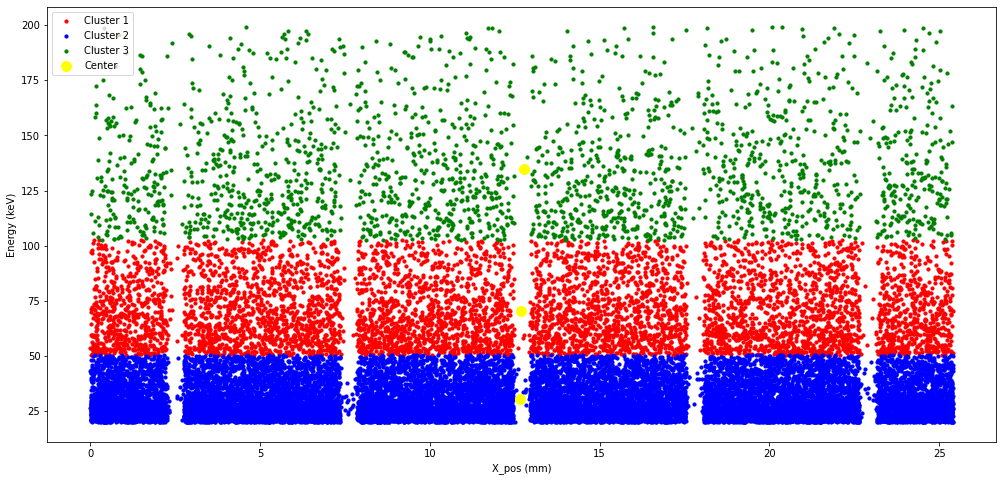

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Center')
plt.xlabel('X_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

###20 40

In [ ]:
deneme3 = deneme[(deneme.Energy_sum >= 20) & (deneme.Energy_sum <= 40)]

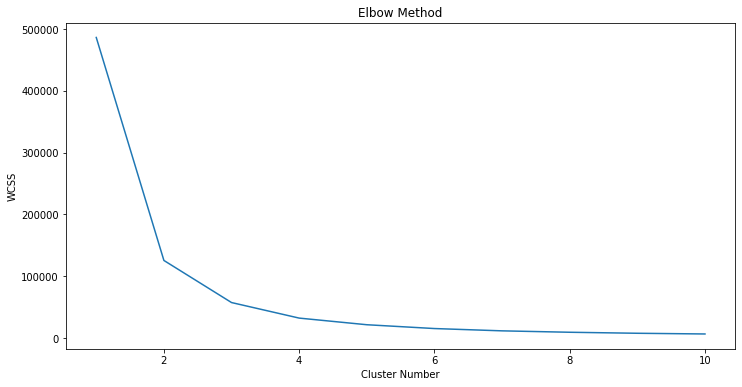

In [ ]:
X = deneme3.iloc[:,[4,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

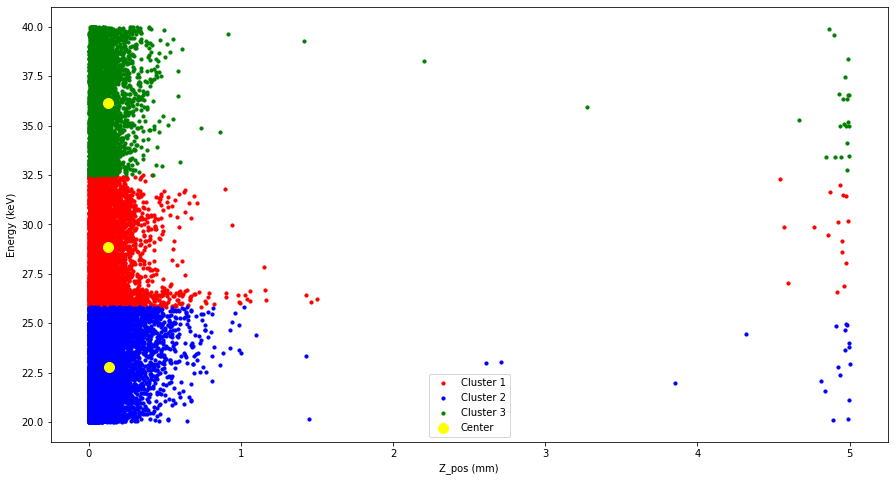

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label = 'Center')
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

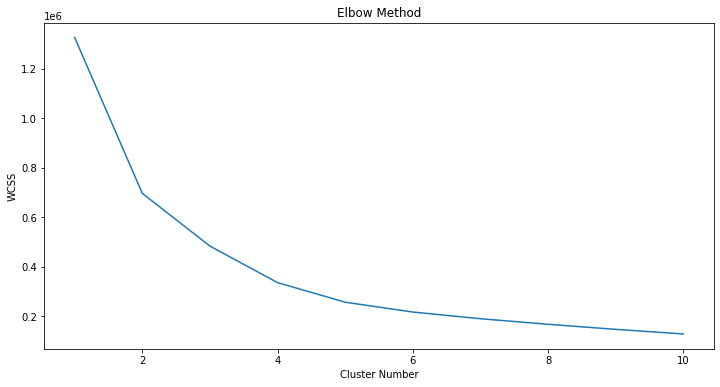

In [ ]:
X = deneme3.iloc[:,[3,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

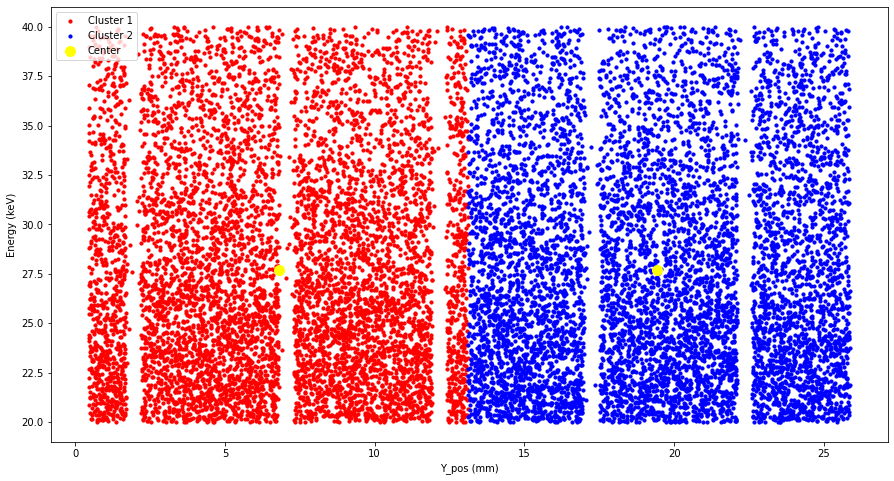

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label='Center')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

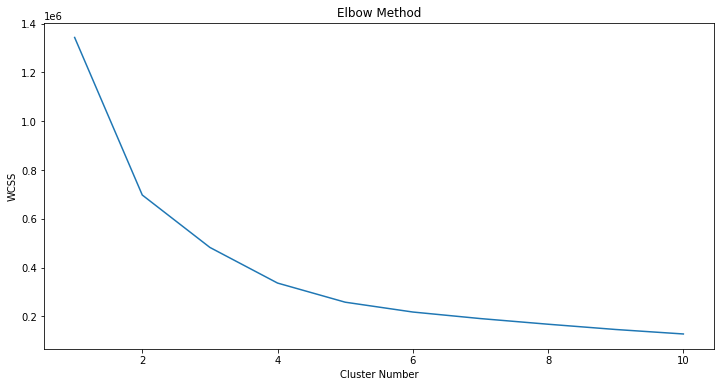

In [ ]:
X = deneme3.iloc[:,[2,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

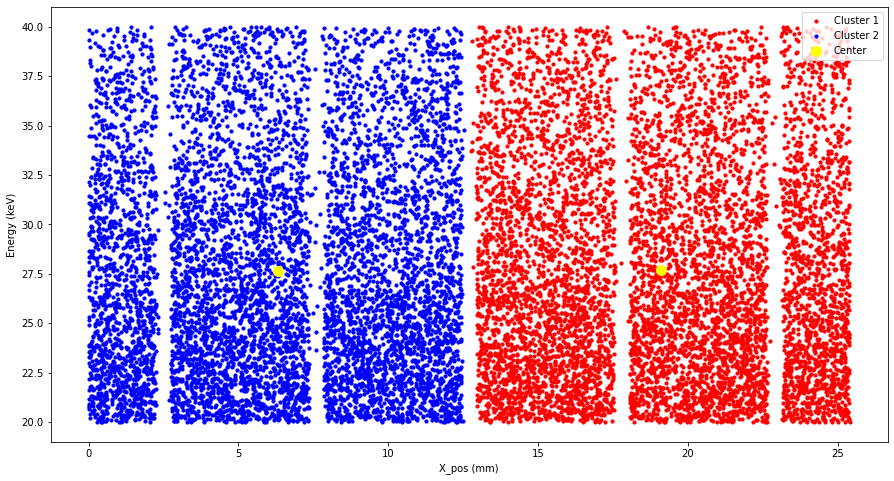

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label='Center')
plt.xlabel('X_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

###40 60

In [ ]:
deneme4 = deneme[(deneme.Energy_sum >= 40) & (deneme.Energy_sum <= 60)]

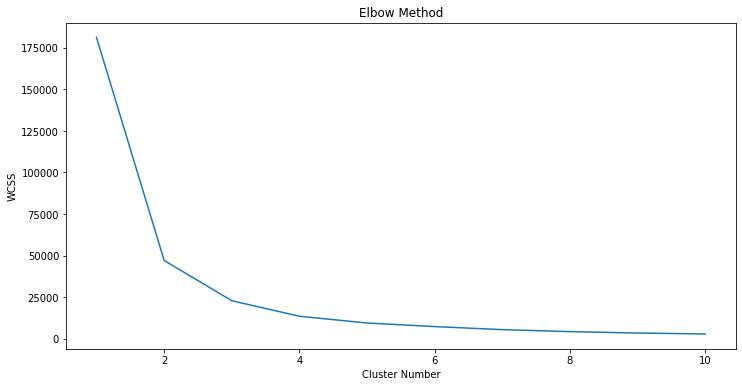

In [ ]:
X = deneme4.iloc[:,[4,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

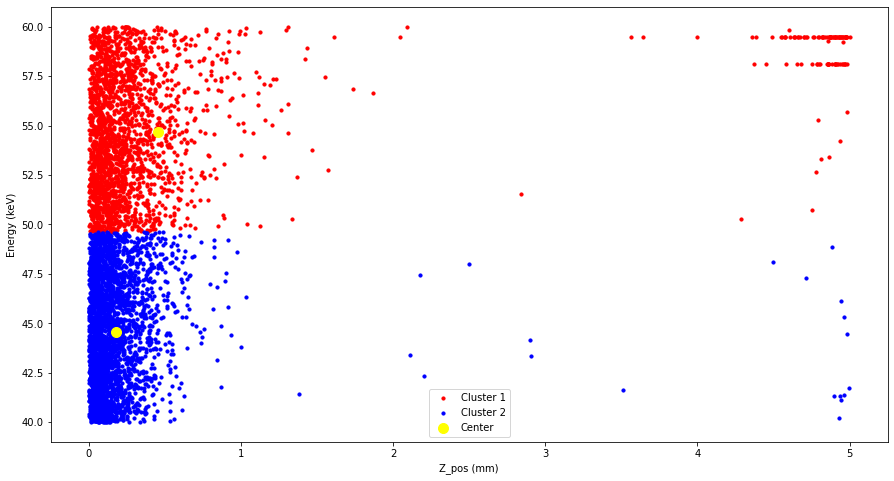

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

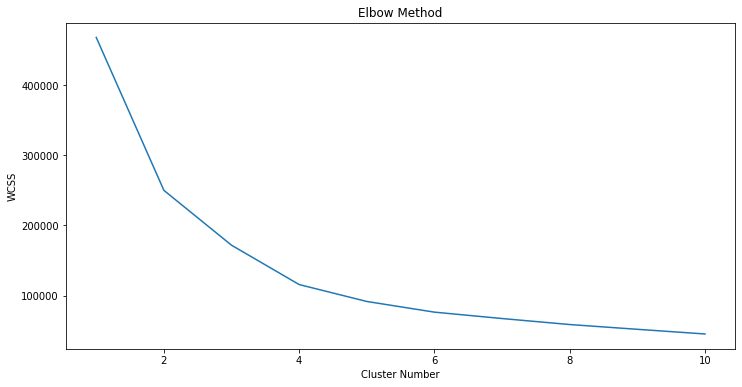

In [ ]:
X = deneme4.iloc[:,[3,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

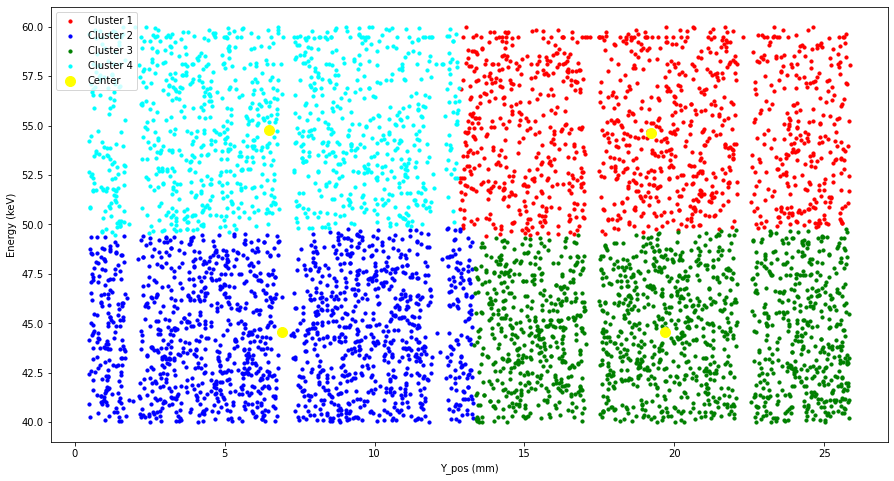

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'black', label = 'Cluster 5')     
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

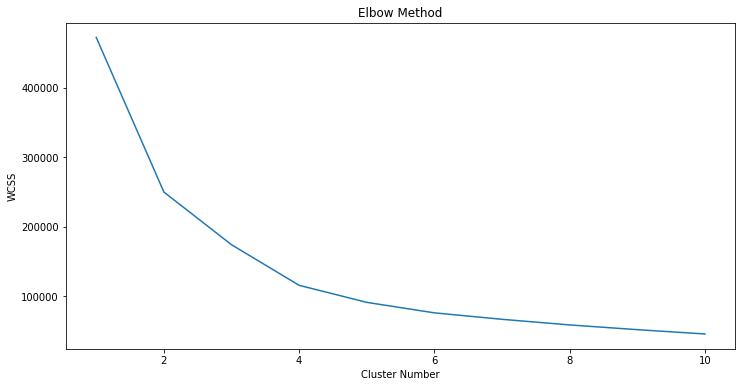

In [ ]:
X = deneme4.iloc[:,[2,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

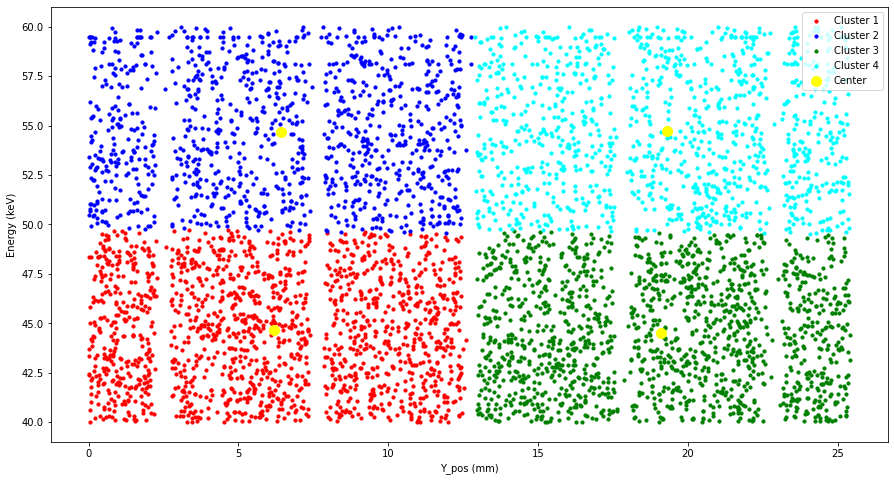

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

###60 80

In [ ]:
deneme5 = deneme[(deneme.Energy_sum >= 60) & (deneme.Energy_sum <= 80)]

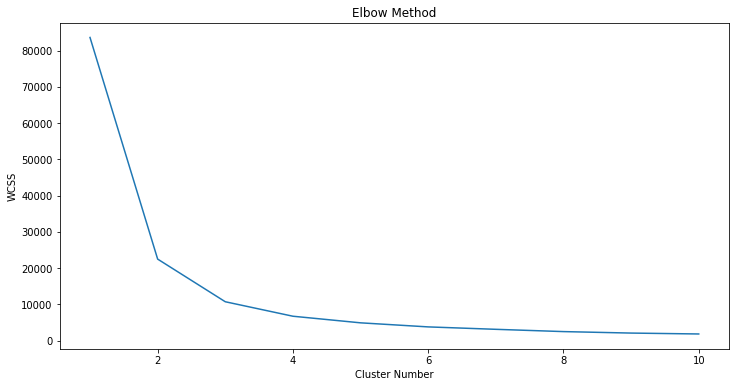

In [ ]:
X = deneme5.iloc[:,[4,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

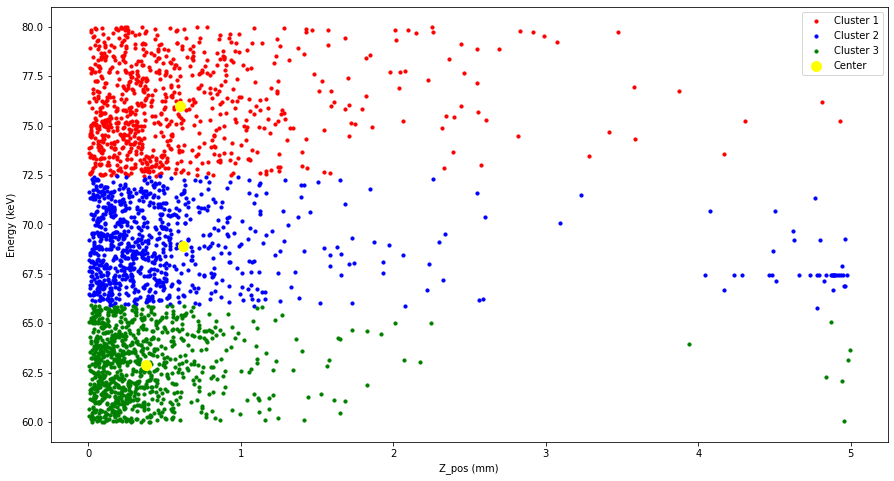

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

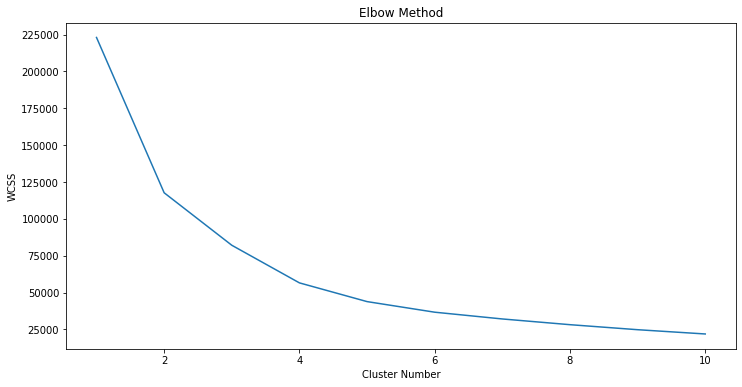

In [ ]:
X = deneme5.iloc[:,[3,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

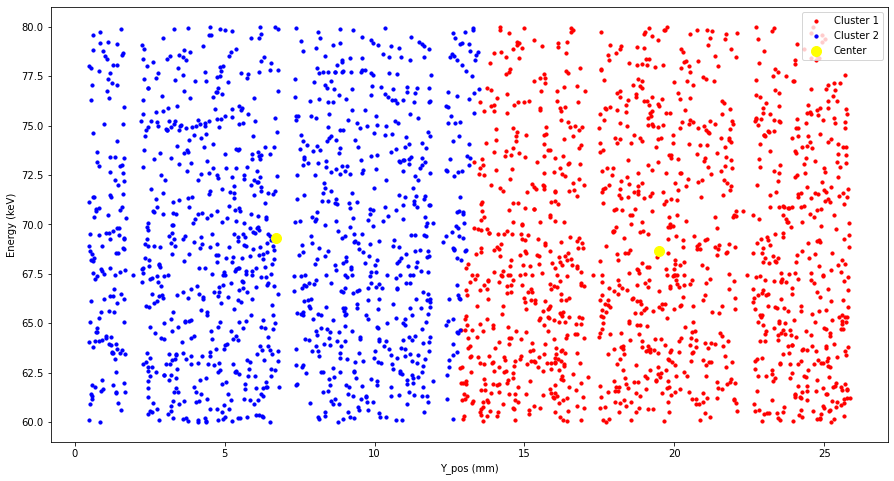

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

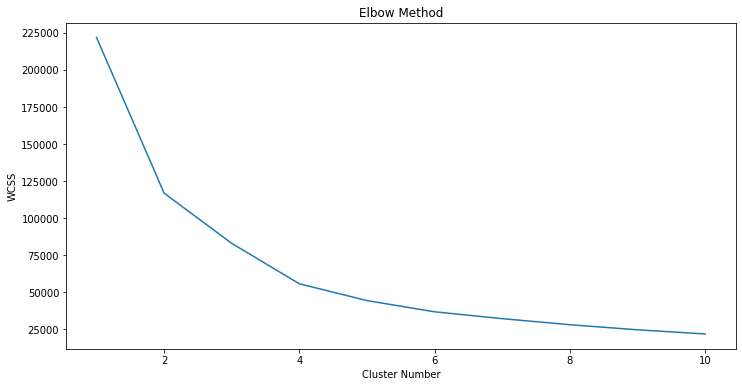

In [ ]:
X = deneme5.iloc[:,[2,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

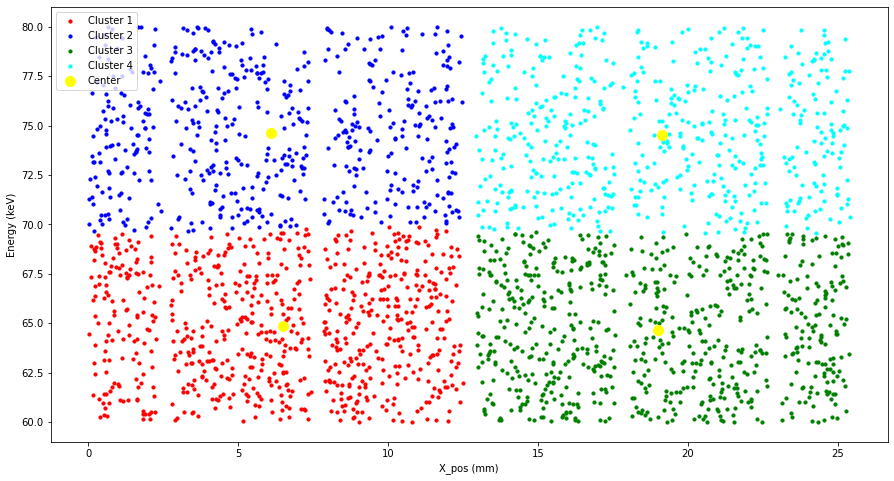

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('X_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

###80 150

In [ ]:
deneme6 = deneme[(deneme.Energy_sum >= 80) & (deneme.Energy_sum <= 150)]

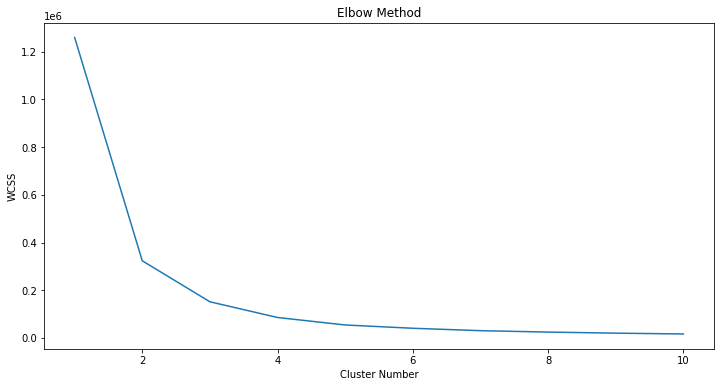

In [ ]:
X = deneme6.iloc[:,[4,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

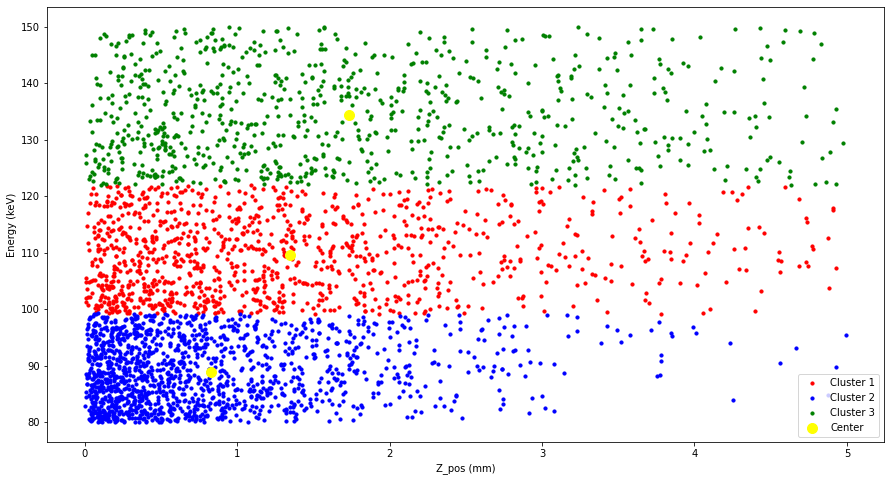

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

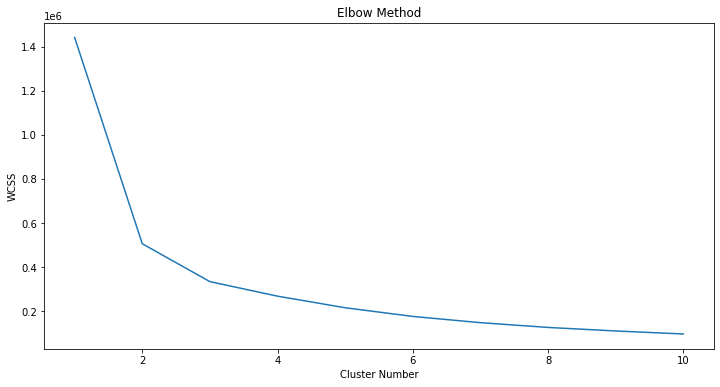

In [ ]:
X = deneme6.iloc[:,[3,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

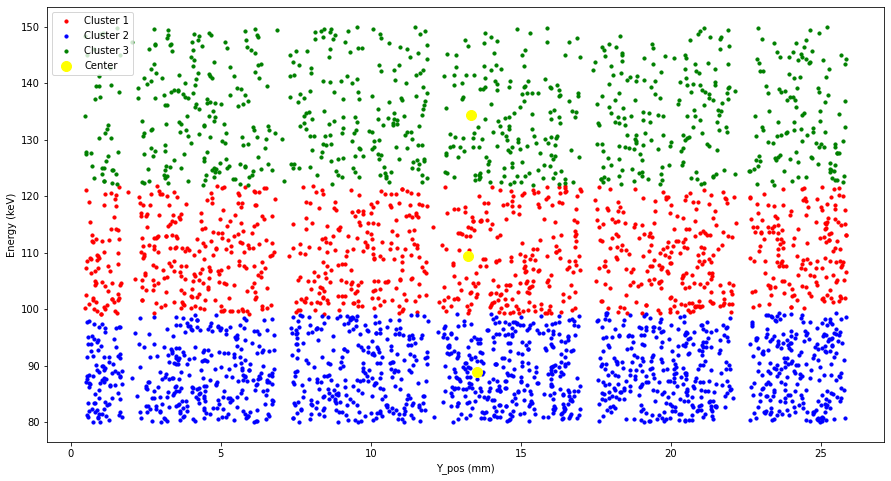

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

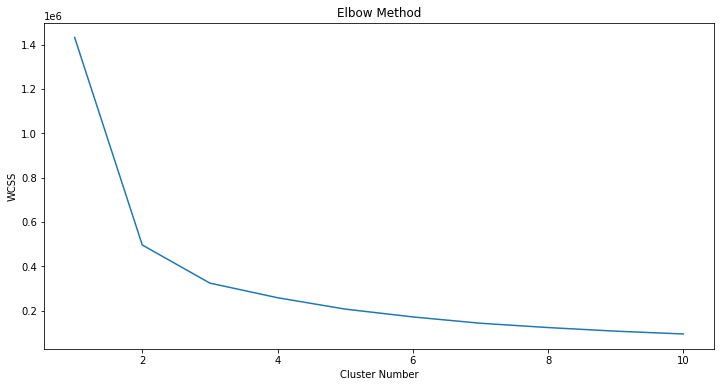

In [ ]:
X = deneme6.iloc[:,[2,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

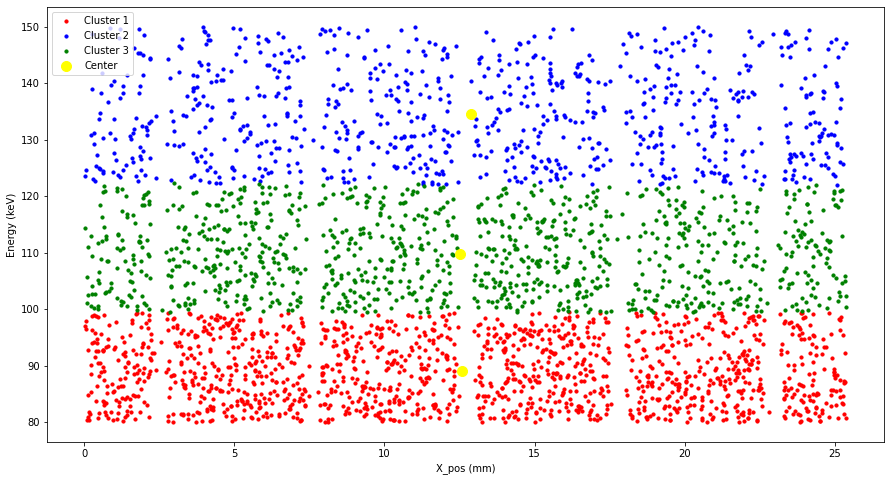

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('X_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

###150 200

In [ ]:
deneme7 = deneme[(deneme.Energy_sum >= 150) & (deneme.Energy_sum <= 200)]

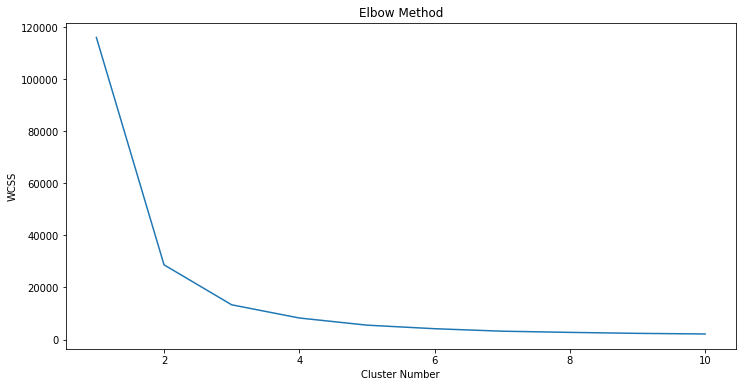

In [ ]:
X = deneme7.iloc[:,[4,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

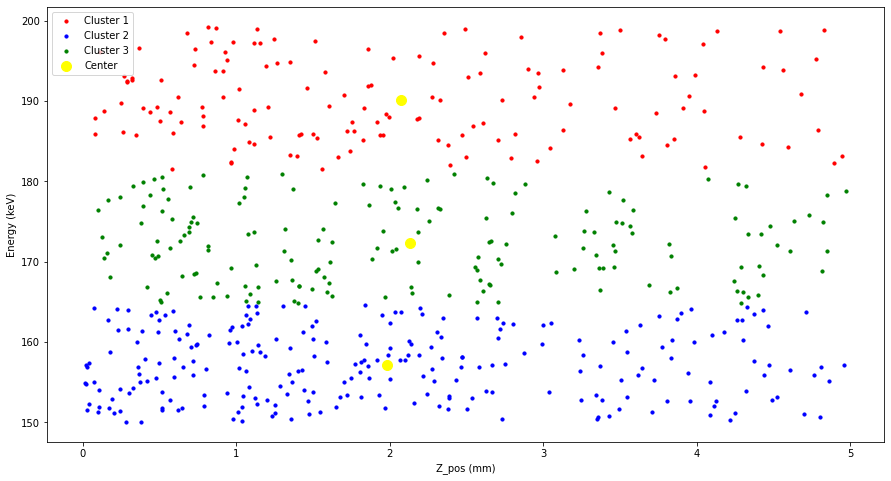

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

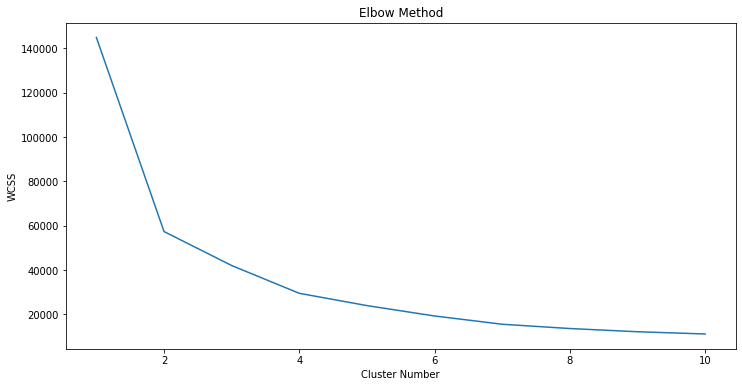

In [ ]:
X = deneme7.iloc[:,[3,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

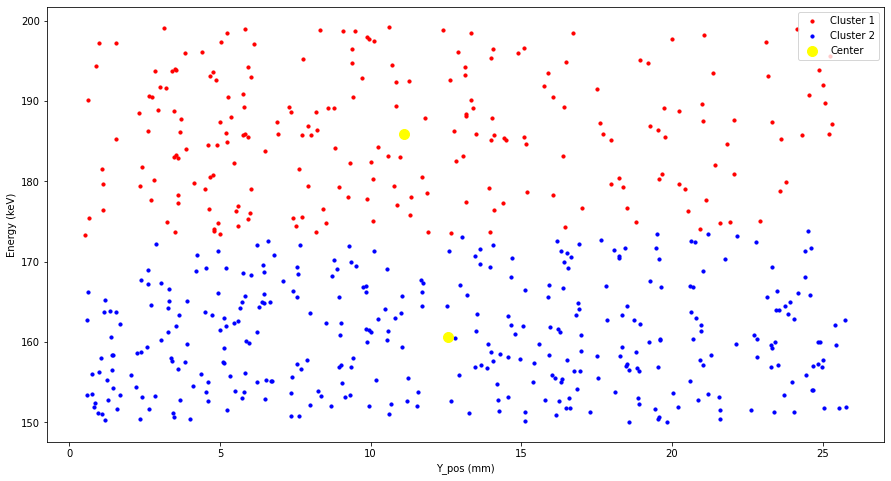

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

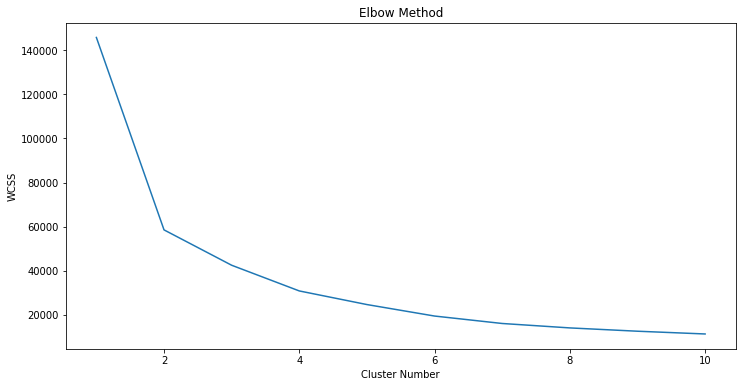

In [ ]:
X = deneme7.iloc[:,[2,5]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

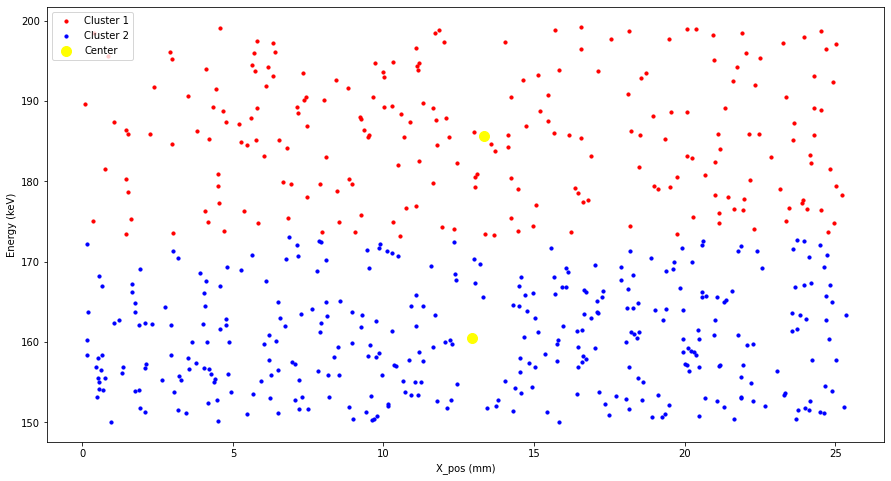

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('X_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

#CXB

##READ DATA

In [20]:
df_cxb = pd.read_csv("cxb_data.txt",sep=';', header=None)
df_cxb = df_cxb.drop(6,axis=1)
df_cxb.columns = ["Event","Cloud_num","X_pos","Y_pos","Z_pos","Energy"]

In [21]:
df_cxb

Event  Cloud_num     X_pos    Y_pos     Z_pos   Energy
0               1          0  20.37710  20.4196  0.014218  0.20204
1               1          1  20.37720  20.4196  0.014250  6.65117
2               1          2  20.37710  20.4196  0.014218  0.03825
3               1          3  20.37710  20.4196  0.014218  0.03751
4               1          4  20.37710  20.4196  0.014218  0.04280
...           ...        ...       ...      ...       ...      ...
74703458  2005921         63   4.18935  19.2219  1.353670  0.17795
74703459  2005921         64   4.18935  19.2219  1.353670  0.47580
74703460  2005921         65   4.18935  19.2219  1.353670  0.03825
74703461  2005921         66   4.18935  19.2219  1.353670  0.03751
74703462  2005921         67   4.18935   0.0000  0.000000  0.00000

[74703463 rows x 6 columns]

In [22]:
df_cxb.shape

(74703463, 6)

In [23]:
df_cxb.describe().T

count          mean            std           min  \
Event      74703463.0  1.206893e+06  530797.455456  1.000000e+00   
Cloud_num  74703463.0  4.798566e+01      53.608012  0.000000e+00   
X_pos      74703463.0  1.270948e+01       7.426194 -1.332270e-15   
Y_pos      74703463.0  1.318975e+01       7.422636  0.000000e+00   
Z_pos      74703463.0  2.470474e+00       1.565514 -8.881780e-16   
Energy     74703463.0  8.245159e+01     285.530498  0.000000e+00   

                    25%           50%           75%         max  
Event      804361.00000  1.271453e+06  1.662137e+06  2005921.00  
Cloud_num      12.00000  3.000000e+01  6.500000e+01      751.00  
X_pos           6.29128  1.271150e+01  1.912360e+01       25.40  
Y_pos           6.78590  1.320920e+01  1.960100e+01       25.85  
Z_pos           1.06865  2.451940e+00  3.863130e+00        5.00  
Energy          0.02420  2.134000e-01  1.329810e+01    10665.00

In [ ]:
df_cxb.dtypes

Event           int64
e_Cloud         int64
X_pos         float64
Y_pos         float64
Z_pos         float64
Energy        float64
Vertex_pos      int64
dtype: object

In [ ]:
df_cxb.isnull().sum() / df_cxb.shape[0]

Event         0.0
e_Cloud       0.0
X_pos         0.0
Y_pos         0.0
Z_pos         0.0
Energy        0.0
Vertex_pos    0.0
dtype: float64

In [24]:
deneme_CXB = df_cxb[df_cxb.Event <= 300000]

In [25]:
deneme_CXB['Energy_sum'] = deneme_CXB.groupby('Event').Energy.transform(sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
def for_weighted_xpos_CXB(row):
  x_pos_sum = row.X_pos*row.Energy
  return x_pos_sum
def for_weighted_ypos_CXB(row):
  y_pos_sum = row.Y_pos*row.Energy
  return y_pos_sum
def for_weighted_zpos_CXB(row):
  z_pos_sum = row.Z_pos*row.Energy
  return z_pos_sum

deneme_CXB['for_xpos'] = deneme_CXB.apply(for_weighted_xpos_CXB, axis=1)
deneme_CXB['for_ypos'] = deneme_CXB.apply(for_weighted_ypos_CXB, axis=1)
deneme_CXB['for_zpos'] = deneme_CXB.apply(for_weighted_zpos_CXB, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [27]:
deneme_CXB['X_pos_sum'] = deneme_CXB.groupby('Event').for_xpos.transform(sum)
deneme_CXB['Y_pos_sum'] = deneme_CXB.groupby('Event').for_ypos.transform(sum)
deneme_CXB['Z_pos_sum'] = deneme_CXB.groupby('Event').for_zpos.transform(sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [28]:
deneme_CXB['weighted_Xpos'] = deneme_CXB.apply(lambda x: x['X_pos_sum']/x['Energy_sum'],axis=1)
deneme_CXB['weighted_Ypos'] = deneme_CXB.apply(lambda x: x['Y_pos_sum']/x['Energy_sum'],axis=1)
deneme_CXB['weighted_Zpos'] = deneme_CXB.apply(lambda x: x['Z_pos_sum']/x['Energy_sum'],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [29]:
deneme_CXB = deneme_CXB[(deneme_CXB.Cloud_num == 0) & (deneme.Energy_sum <= 800)].reset_index(drop=True)

In [30]:
deneme_CXB = deneme_CXB[['Event','weighted_Xpos','weighted_Ypos','weighted_Zpos','Energy_sum']]

In [31]:
deneme_CXB

Event  weighted_Xpos  weighted_Ypos  weighted_Zpos  Energy_sum
0         1      20.377162      20.419575       0.014237    10.67317
1         2      23.105700       7.566778       0.018766    10.89122
2         3      18.343756      11.894433       0.005115    11.25810
3         4      19.369464      23.056500       0.021748    11.50472
4         5       3.494924      23.248843       0.000406    11.60152
...     ...            ...            ...            ...         ...
1758   1759      15.826190      19.549145       4.960153    66.03180
1759   1760      19.923384      22.998433       4.964883    72.75100
1760   1761      23.845270      14.935424       0.487756    72.70152
1761   1762       9.364178       4.066025       4.951885    59.48300
1762   1763       5.703787      10.443047       4.860466    61.05590

[1763 rows x 5 columns]

##WEIGHTED HISTOGRAMS


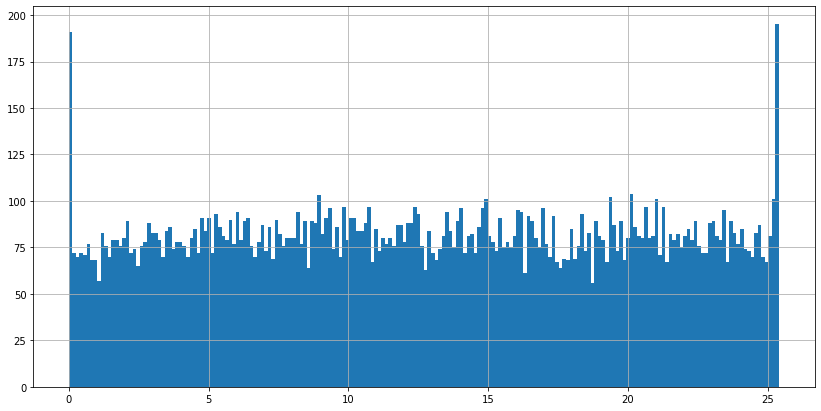

In [ ]:
deneme_CXB.weighted_Xpos.hist(bins=200,figsize=(14,7))

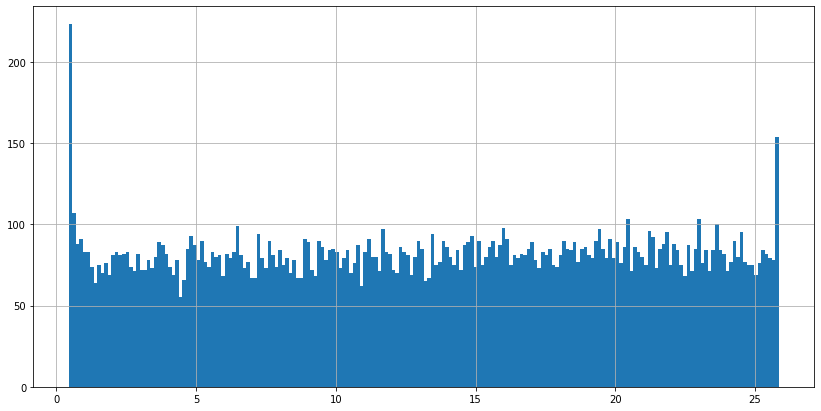

In [ ]:
deneme_CXB.weighted_Ypos.hist(bins=200,figsize=(14,7))

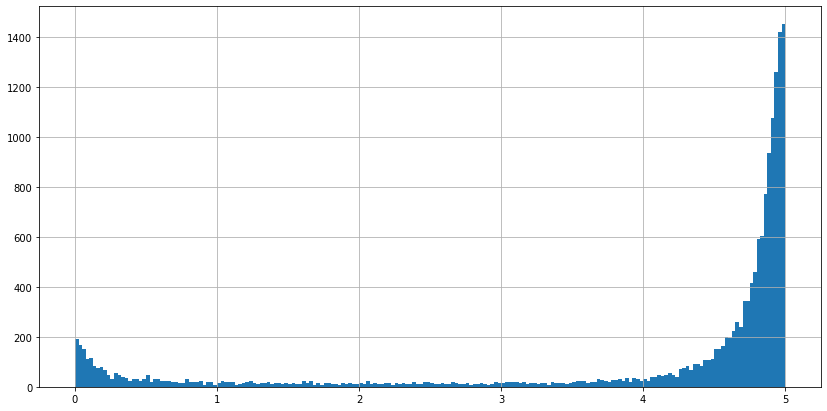

In [ ]:
deneme_CXB.weighted_Zpos.hist(bins=200,figsize=(14,7))

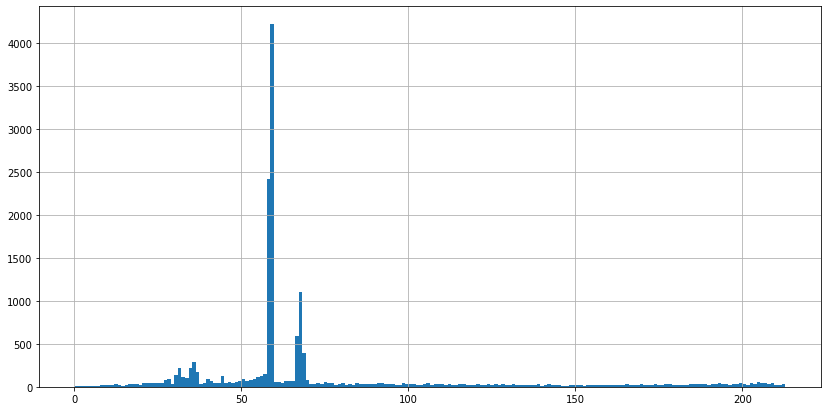

In [ ]:
deneme_CXB.Energy_sum.hist(bins=200,figsize=(14,7))

##SPECIAL HISTOGRAMS (weighted)


###60 80

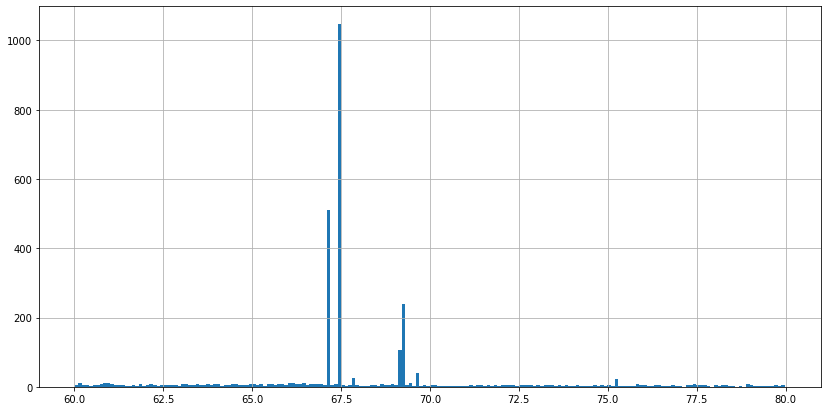

In [ ]:
deneme_CXB[(deneme_CXB.Energy_sum >= 60) & (deneme_CXB.Energy_sum <= 80)].Energy_sum.hist(bins=200,figsize=(14,7))

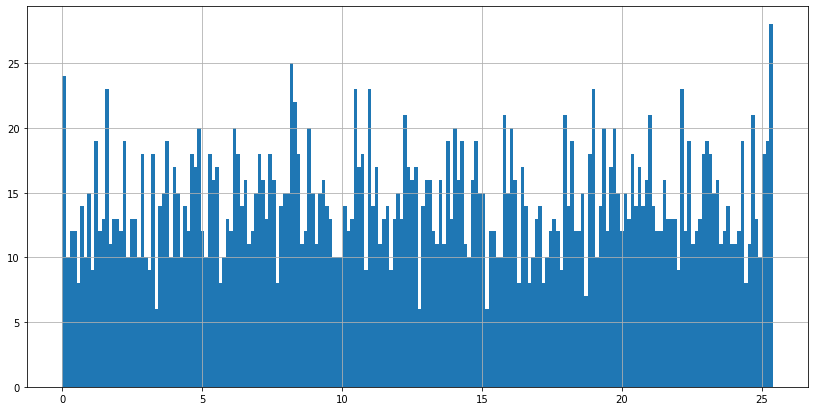

In [ ]:
deneme_CXB[(deneme_CXB.Energy_sum >= 60) & (deneme_CXB.Energy_sum <= 80)].weighted_Xpos.hist(bins=200,figsize=(14,7))

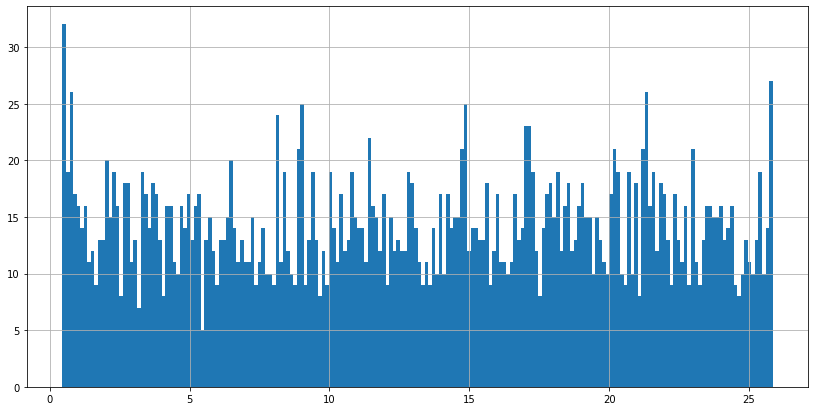

In [ ]:
deneme_CXB[(deneme_CXB.Energy_sum >= 60) & (deneme_CXB.Energy_sum <= 80)].weighted_Ypos.hist(bins=200,figsize=(14,7))

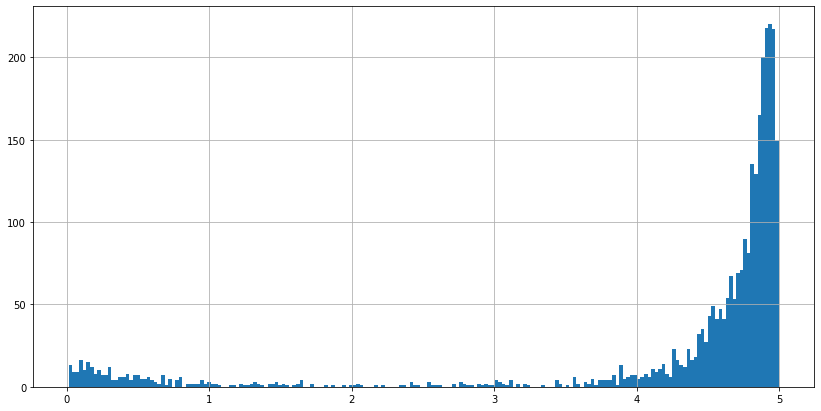

In [ ]:
deneme_CXB[(deneme_CXB.Energy_sum >= 60) & (deneme_CXB.Energy_sum <= 80)].weighted_Zpos.hist(bins=200,figsize=(14,7))

###20 200

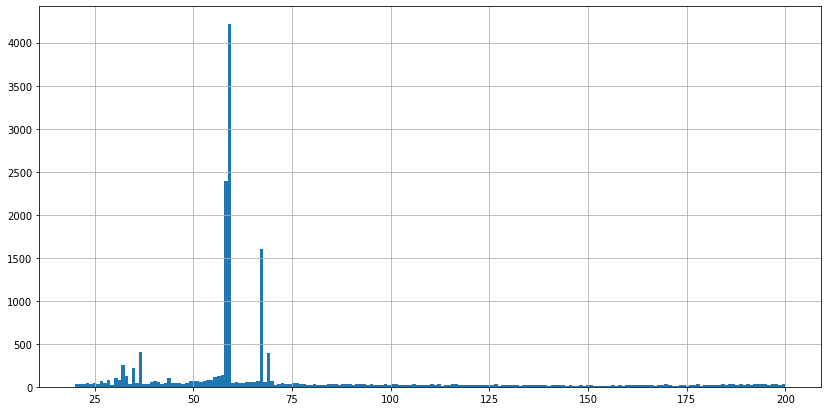

In [ ]:
deneme_CXB[(deneme_CXB.Energy_sum >= 20) & (deneme_CXB.Energy_sum <= 200)].Energy_sum.hist(bins=200,figsize=(14,7))

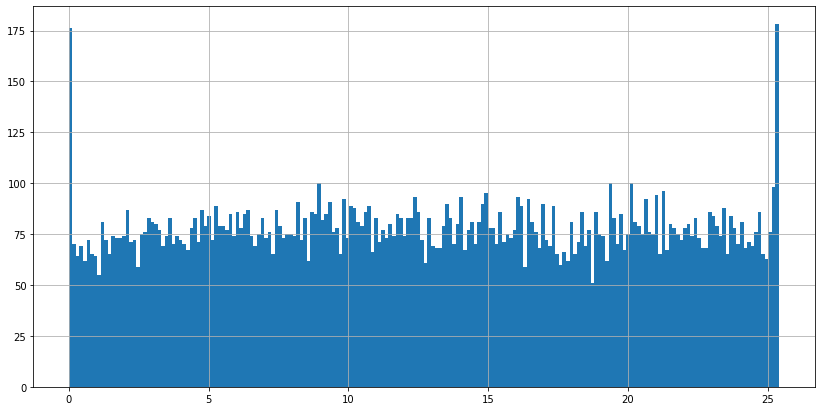

In [ ]:
deneme_CXB[(deneme_CXB.Energy_sum >= 20) & (deneme_CXB.Energy_sum <= 200)].weighted_Xpos.hist(bins=200,figsize=(14,7))

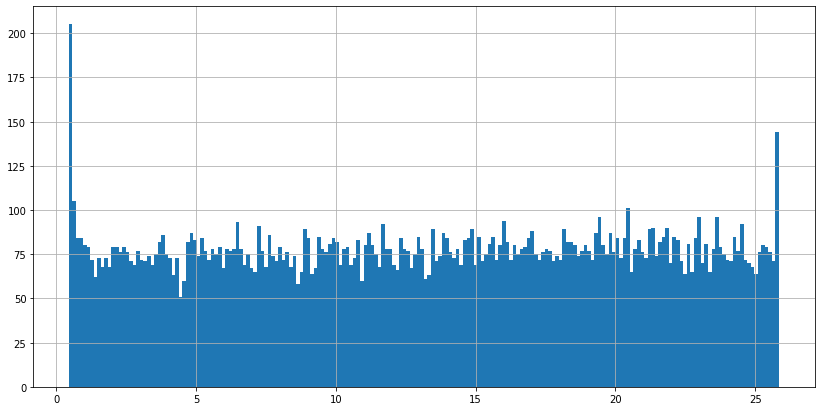

In [ ]:
deneme_CXB[(deneme_CXB.Energy_sum >= 20) & (deneme_CXB.Energy_sum <= 200)].weighted_Ypos.hist(bins=200,figsize=(14,7))

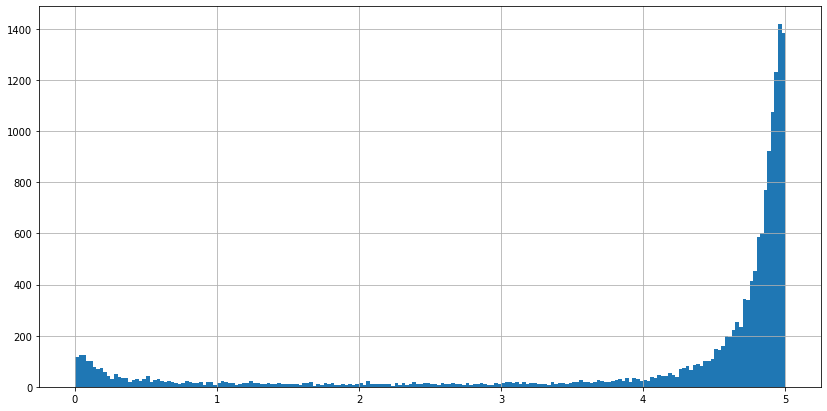

In [ ]:
deneme_CXB[(deneme_CXB.Energy_sum >= 20) & (deneme_CXB.Energy_sum <= 200)].weighted_Zpos.hist(bins=200,figsize=(14,7))

##K-MEANS

###20 200


In [ ]:
deneme3_CXB = deneme_CXB[(deneme_CXB.Energy_sum >= 20) & (deneme_CXB.Energy_sum <= 200)]

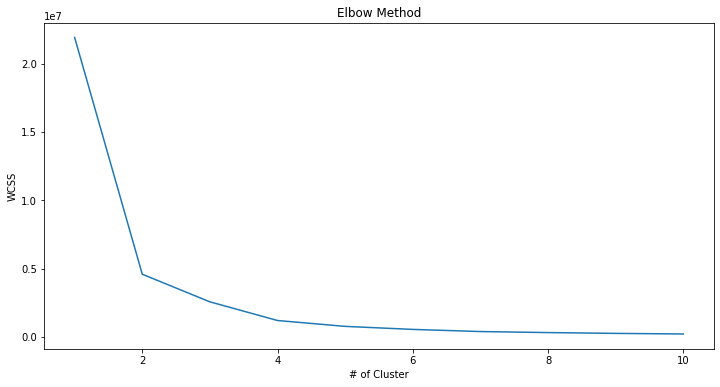

In [ ]:
X = deneme3_CXB.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

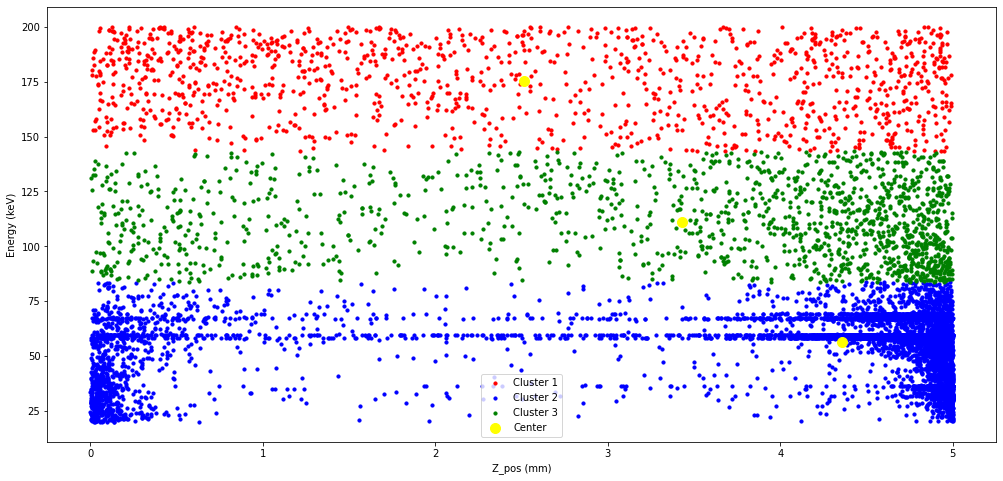

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Center')
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

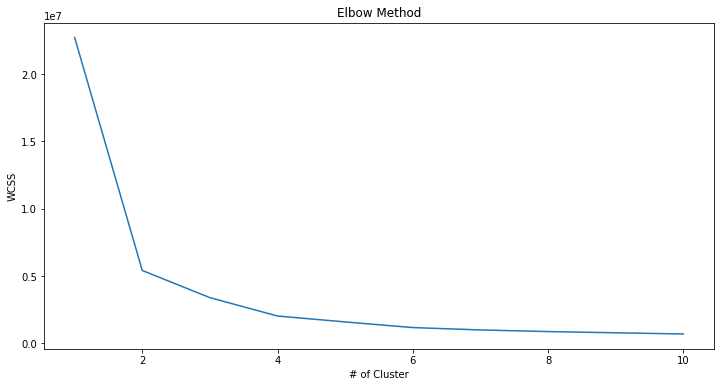

In [ ]:
X = deneme3_CXB.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

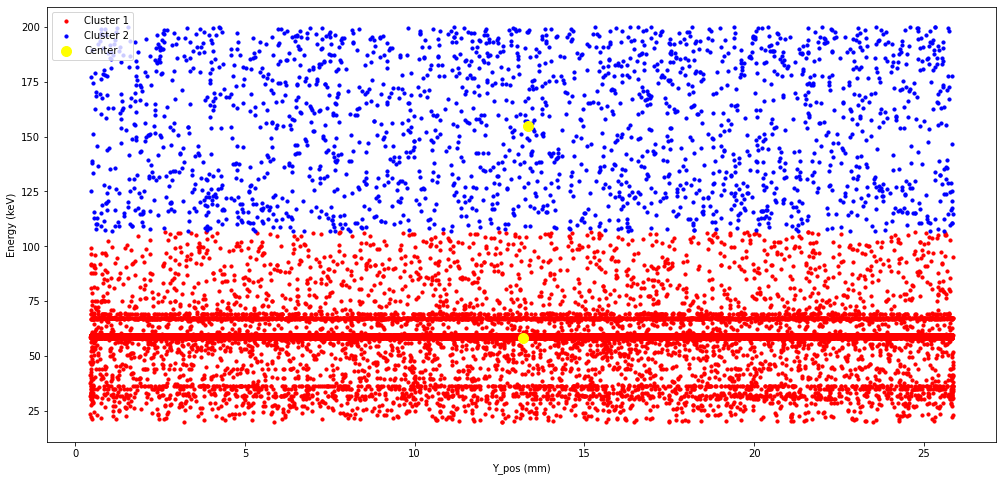

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Center')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

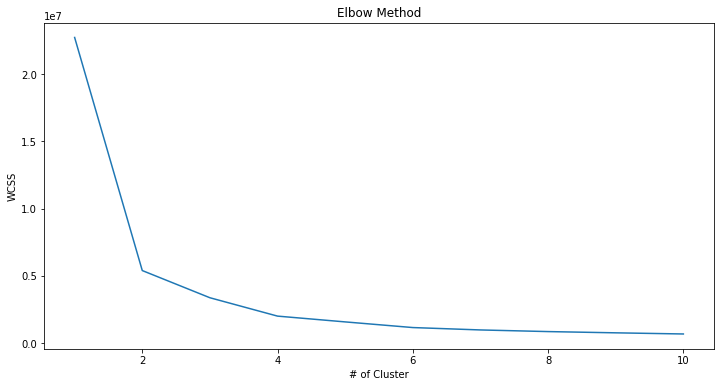

In [ ]:
X = deneme3_CXB.iloc[:,[1,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

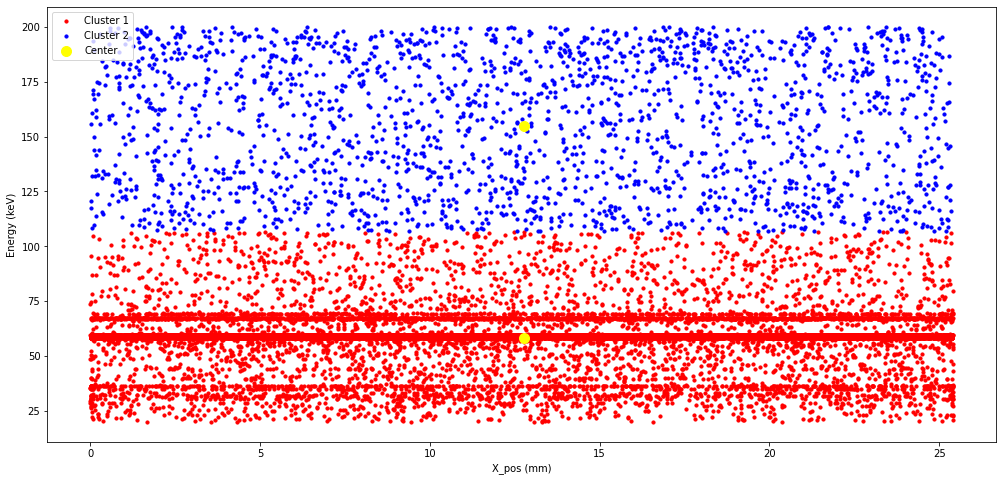

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Center')
plt.xlabel('X_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

###20 40

In [ ]:
deneme5_CXB = deneme_CXB[(deneme_CXB.Energy_sum >= 20) & (deneme_CXB.Energy_sum <= 40)]

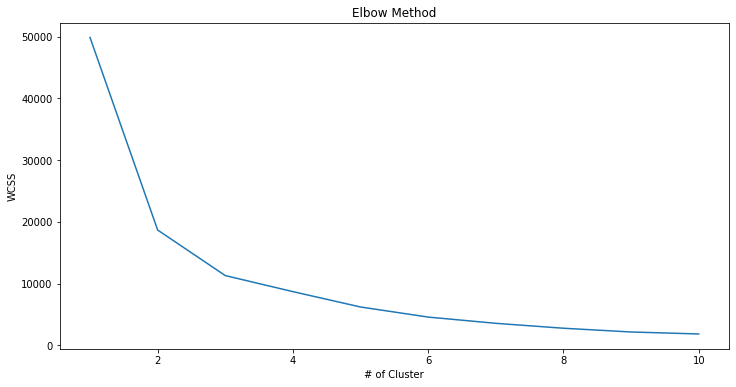

In [ ]:
X = deneme5_CXB.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

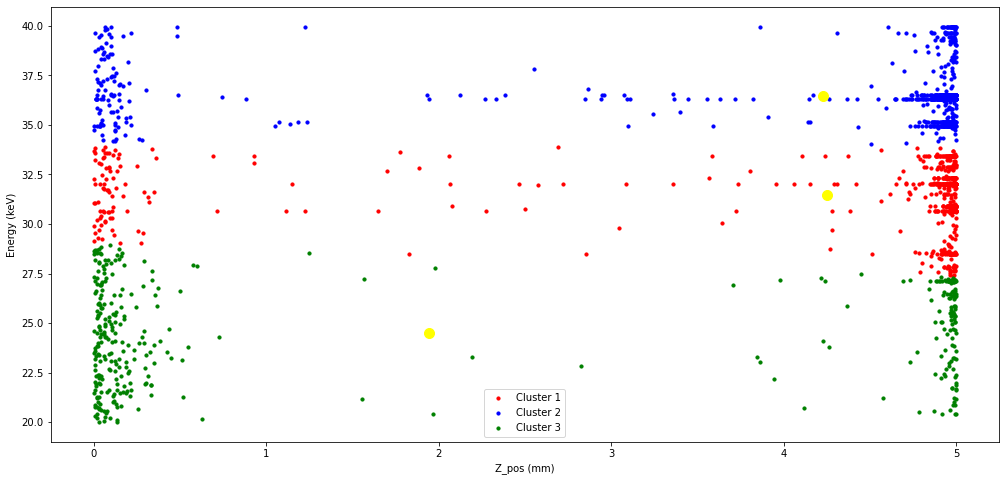

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow')
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

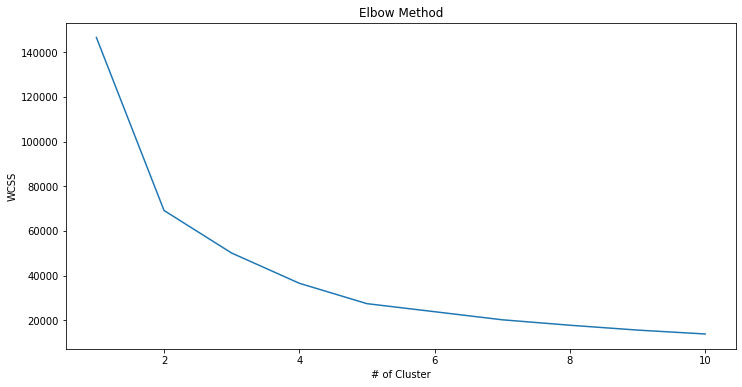

In [ ]:
X = deneme5_CXB.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

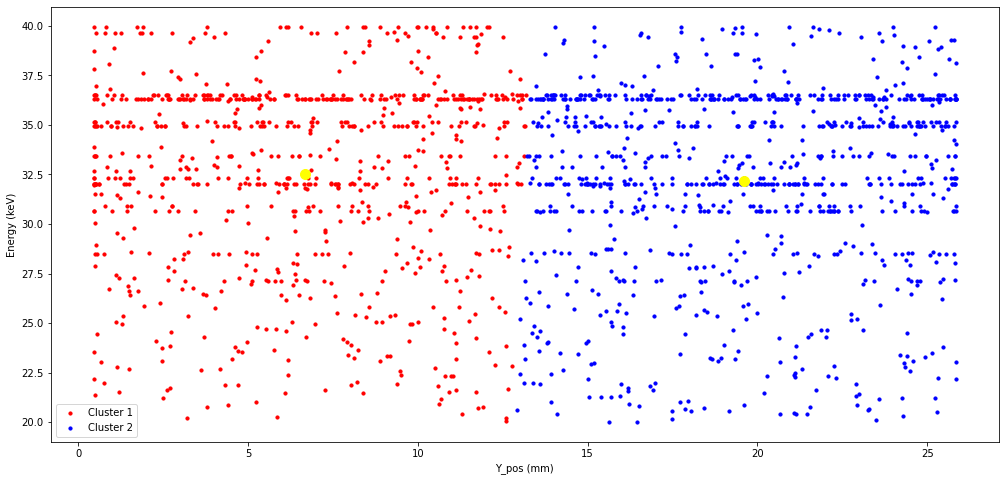

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

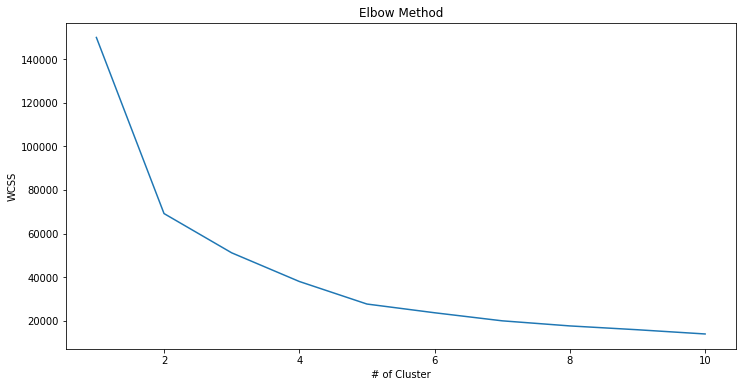

In [ ]:
X = deneme5_CXB.iloc[:,[1,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

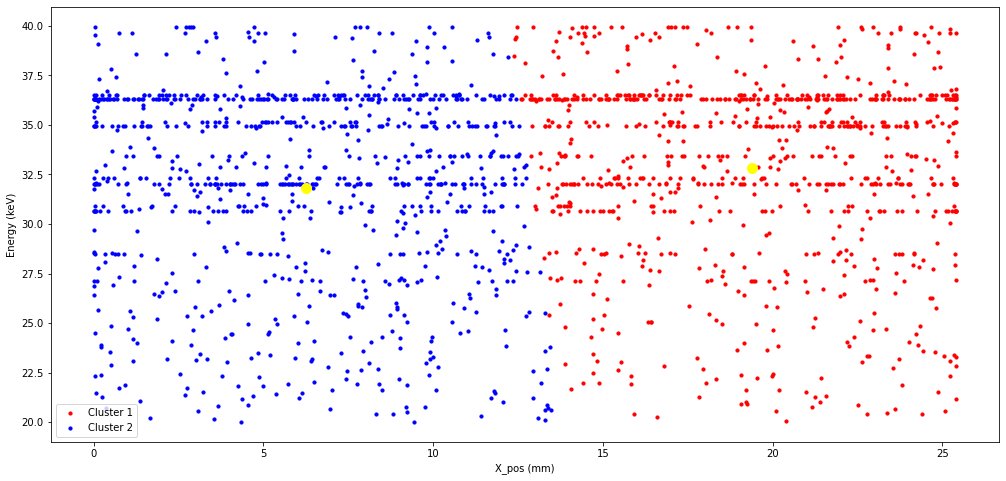

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow')
plt.xlabel('X_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

###40 60

In [ ]:
deneme6_CXB = deneme_CXB[(deneme_CXB.Energy_sum >= 40) & (deneme_CXB.Energy_sum <= 60)]

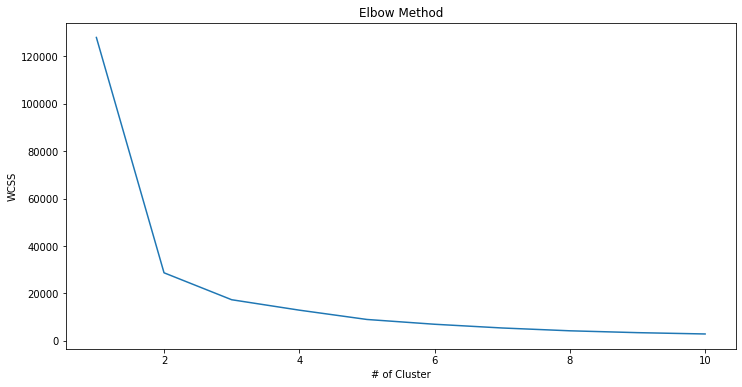

In [ ]:
X = deneme6_CXB.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

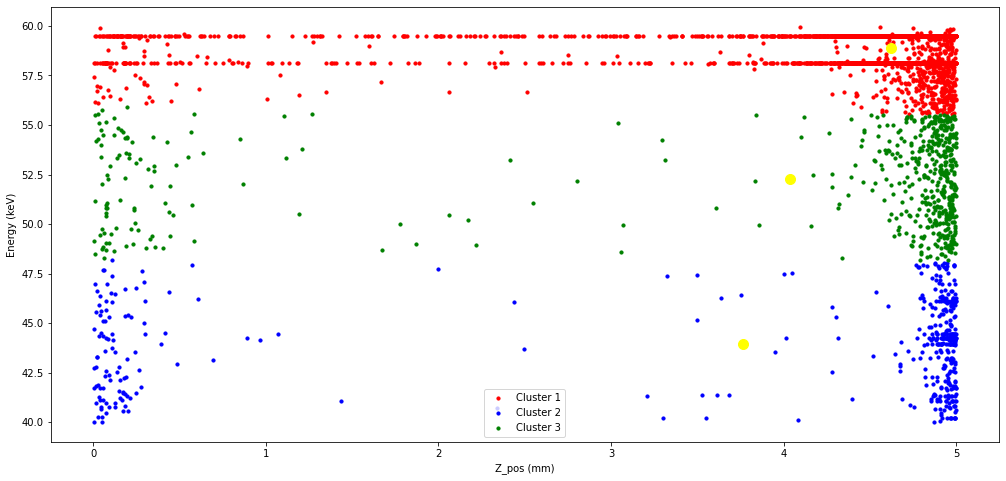

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow')
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

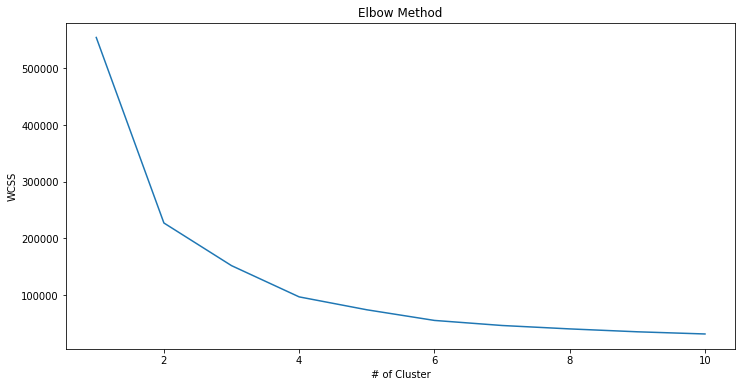

In [ ]:
X = deneme6_CXB.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

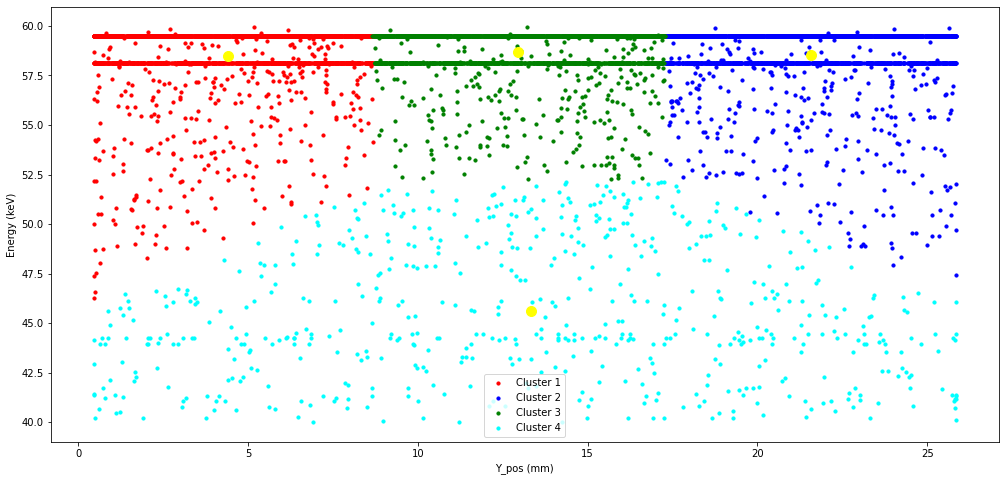

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'black', label = 'Cluster 5')     
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

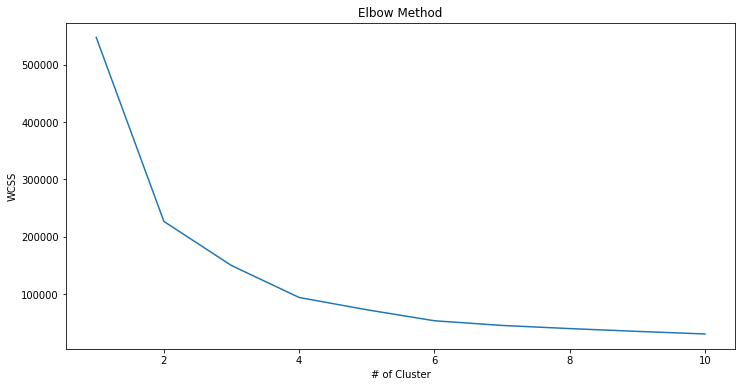

In [ ]:
X = deneme6_CXB.iloc[:,[1,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

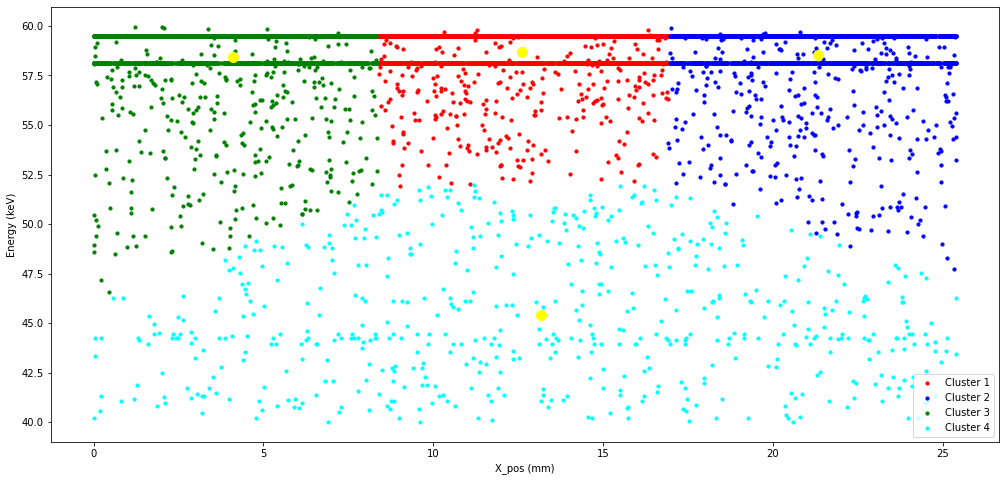

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow')
plt.xlabel('X_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

###60 80

In [ ]:
deneme4_CXB = deneme_CXB[(deneme_CXB.Energy_sum >= 60) & (deneme_CXB.Energy_sum <= 80)]

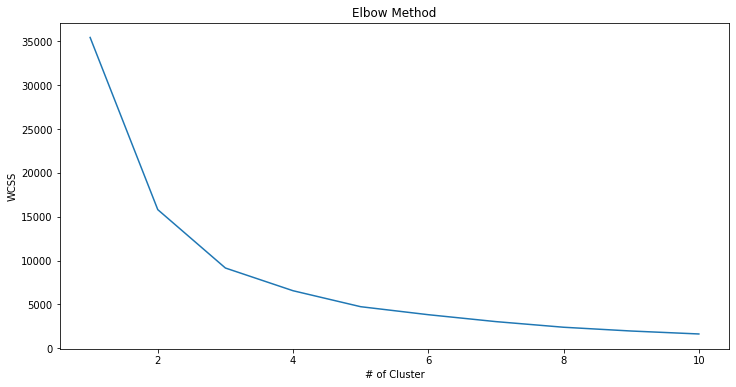

In [ ]:
X = deneme4_CXB.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

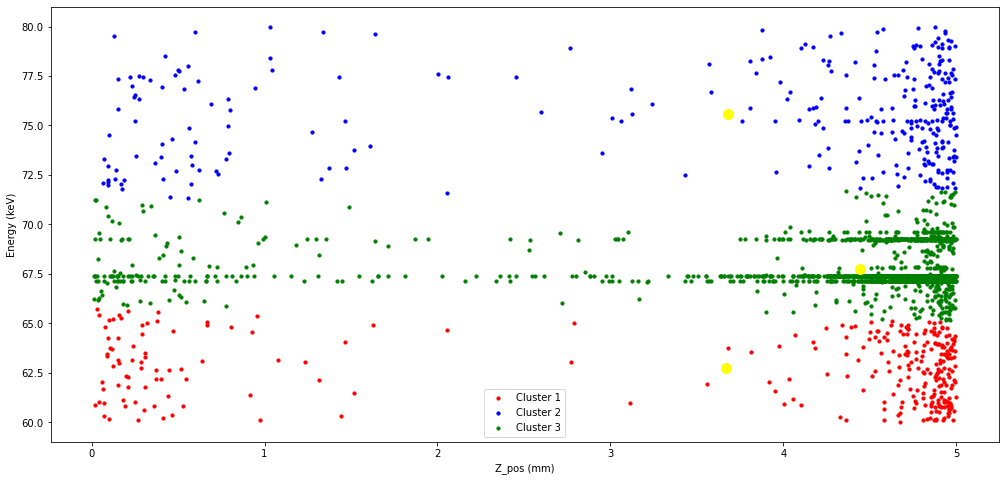

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow')
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

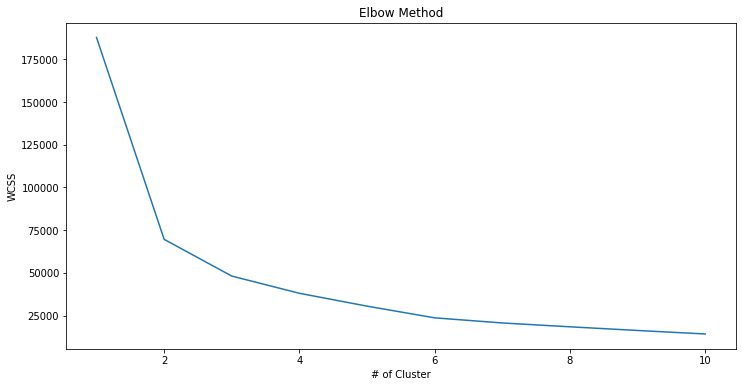

In [ ]:
X = deneme4_CXB.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

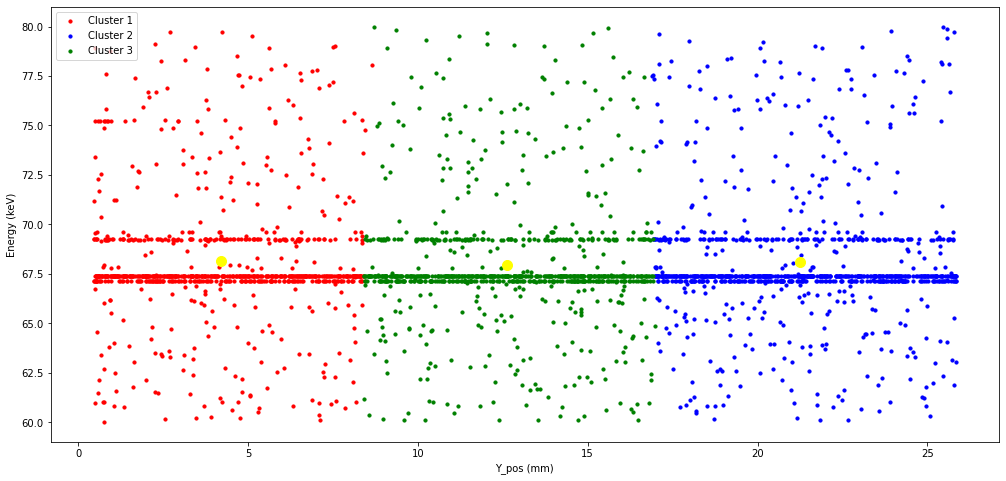

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

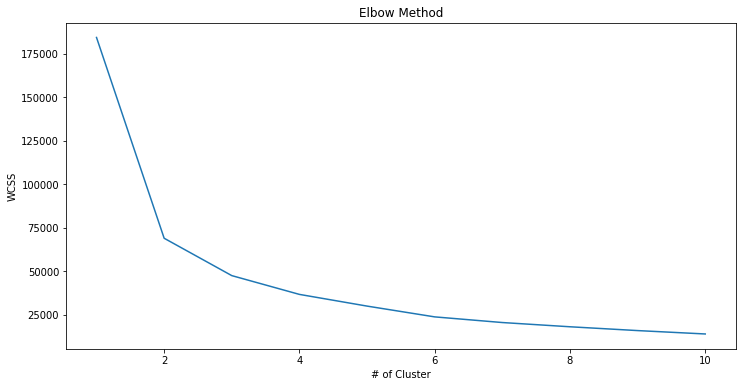

In [ ]:
X = deneme4_CXB.iloc[:,[1,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

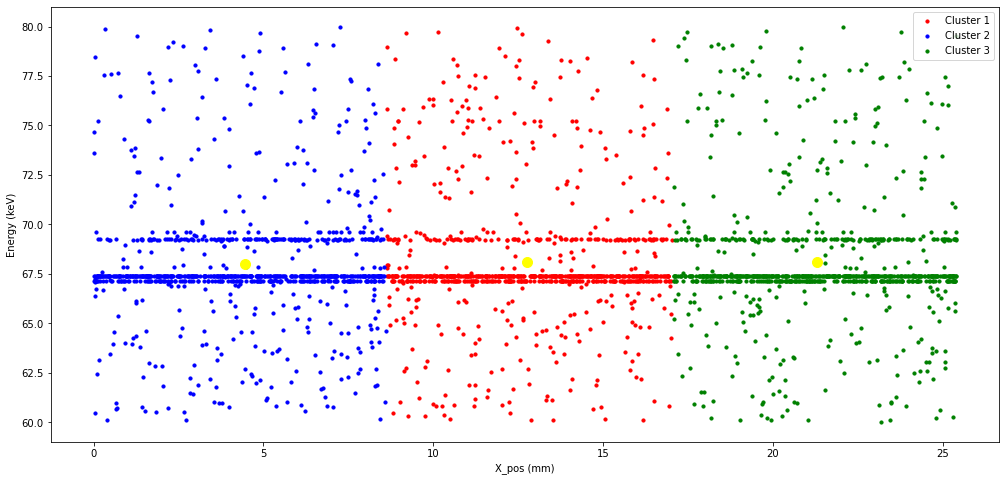

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow')
plt.xlabel('X_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

###80 150

In [ ]:
deneme7_CXB = deneme_CXB[(deneme_CXB.Energy_sum >= 80) & (deneme_CXB.Energy_sum <= 150)]

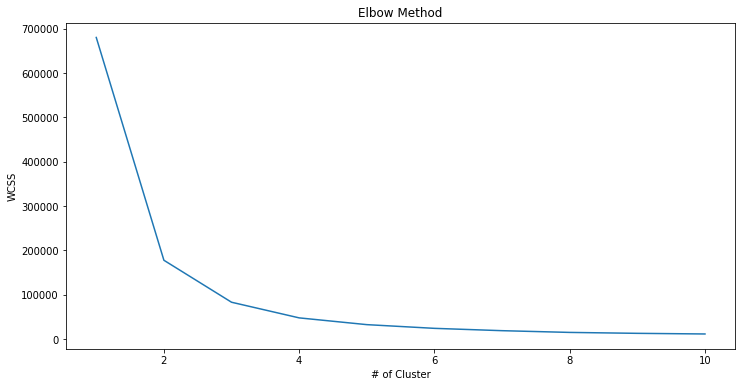

In [ ]:
X = deneme7_CXB.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

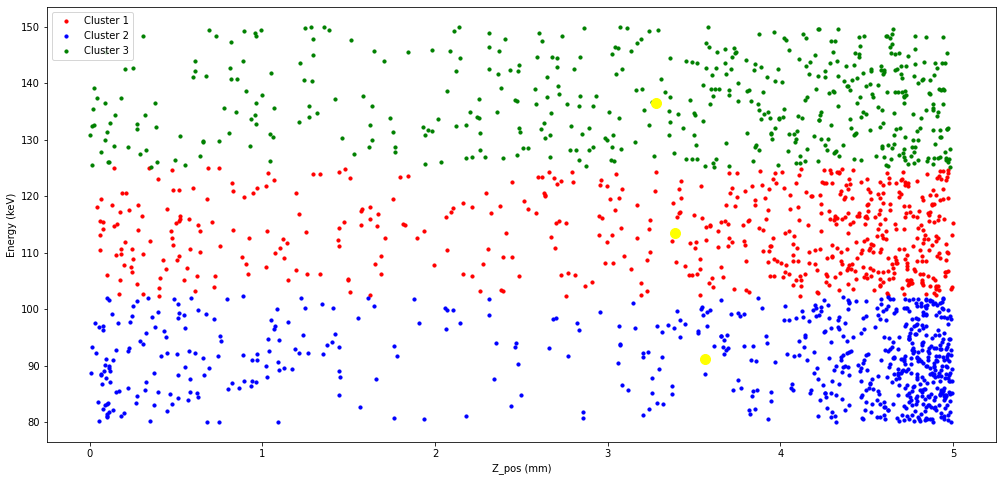

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow')
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

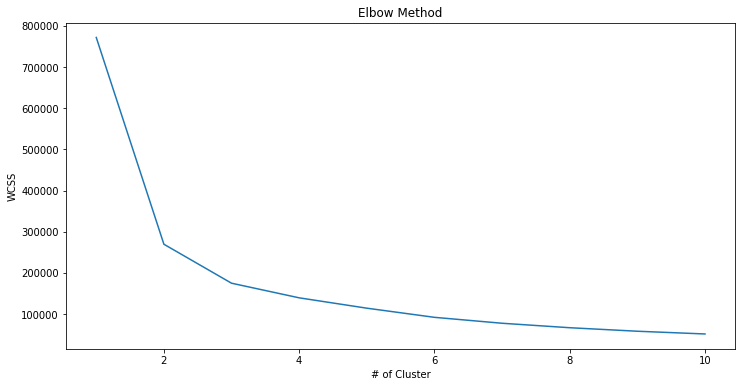

In [ ]:
X = deneme7_CXB.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

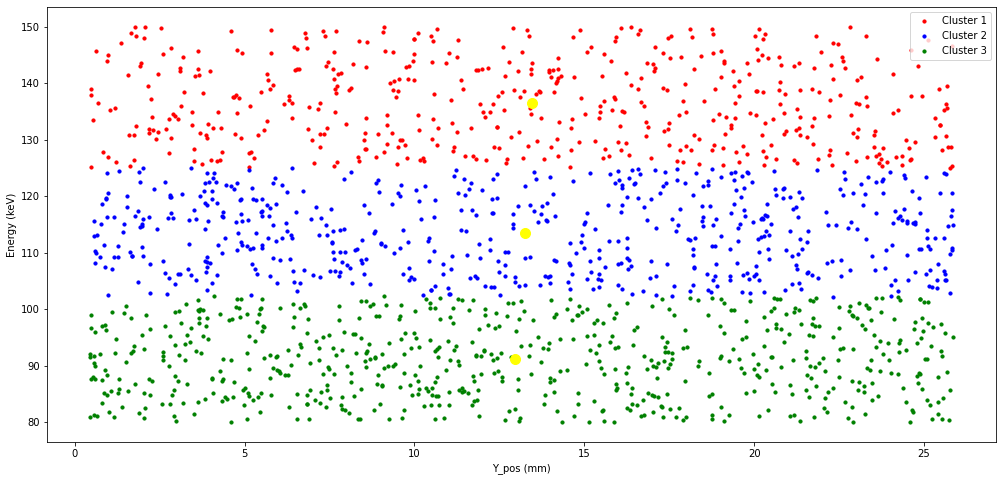

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

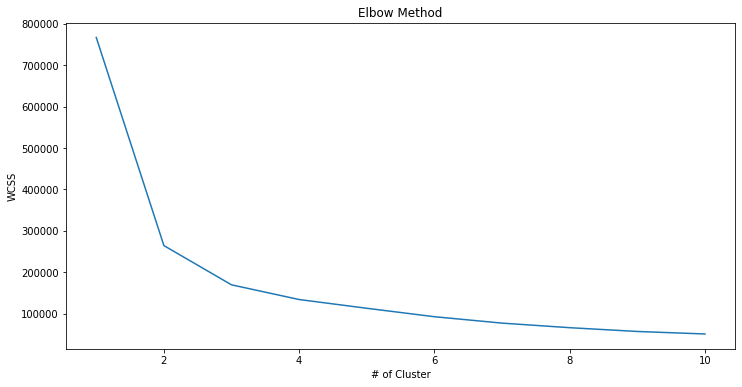

In [ ]:
X = deneme7_CXB.iloc[:,[1,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

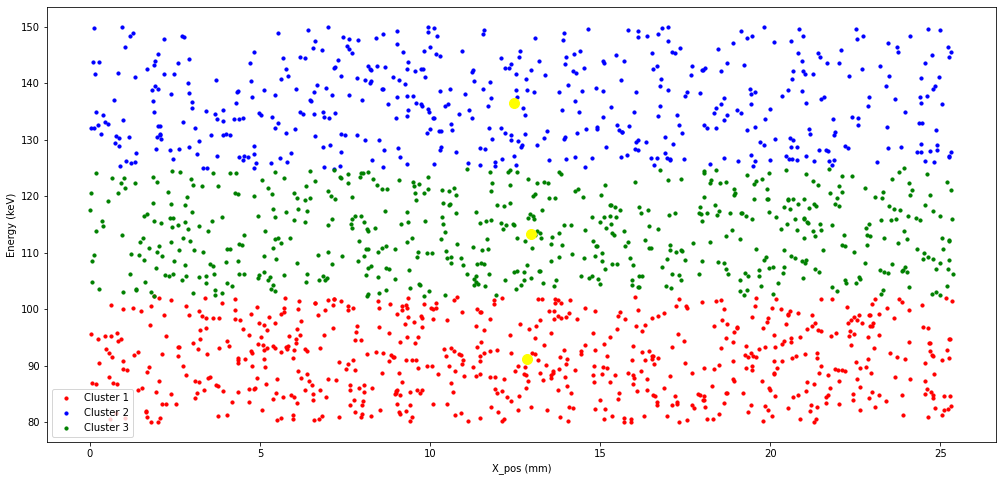

In [ ]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow')
plt.xlabel('X_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

#ALBEDO

##READ DATA

In [32]:
df_albedo = pd.read_csv("albedo_data.txt", sep=";", header=None)
df_albedo = df_albedo.drop(20,axis=1)
df_albedo = df_albedo.drop(6,axis=1)
df_albedo.columns = ["Event","Cloud_num","X_pos","Y_pos","Z_pos","Energy",
                   "Particle Type", "Current Volume", "Previous Volume 1", "Previous Volume 2",
                   "Previous Volume 3", "Previous Volume 4", "Process in Current Volume", 
                   "Process in Prev Vol 1", "Process in Prev Vol 2", "Process in Prev Vol 3"
                   "Process in Prev Vol 4", "Vertex Volume", "Vertex Energy", "Current Step Vol" ] 

In [33]:
df_albedo

Event  Cloud_num     X_pos    Y_pos    Z_pos      Energy  \
0             1          0   8.08324  15.9917  4.99798     0.23182   
1             1          1   8.08323  15.9917  4.99790     8.44356   
2             1          2   8.08324  15.9917  4.99798     0.03751   
3             1          3   8.08324  15.9917  4.99798     0.03751   
4             1          4   8.08324  15.9917  4.99798     0.37818   
...         ...        ...       ...      ...      ...         ...   
7587424  206563          2  10.23030  25.4719  4.24509   557.01100   
7587425  206563          3  13.56710  25.2265  3.81690   878.22600   
7587426  206563          4  16.77140  21.8459  3.39856  3342.46000   
7587427  206563          5  17.41190  21.5216  3.26552   452.65000   
7587428  206564          0  19.32450  25.0828  0.00000   779.28000   

         Particle Type  Current Volume  Previous Volume 1  Previous Volume 2  \
0         2.000000e+00    2.000000e+00       3.300000e+01                1.0   
1         2.000000e+00    2.000000e+00       3.300000e+01                1.0   
2         2.000000e+00    2.000000e+00       3.300000e+01                1.0   
3         2.000000e+00    2.000000e+00       3.300000e+01                1.0   
4         2.000000e+00    2.000000e+00       3.300000e+01                1.0   
...                ...             ...                ...                ...   
7587424  2.039997e-320   2.032092e-320       9.000000e+00                9.0   
7587425  2.039997e-320   2.032092e-320       9.000000e+00                9.0   
7587426  2.039997e-320   2.032092e-320       9.000000e+00                9.0   
7587427  2.039997e-320   2.032092e-320       9.000000e+00                9.0   
7587428  4.055785e-320   4.055785e-320      2.079028e-320                8.0   

         Previous Volume 3  Previous Volume 4  Process in Current Volume  \
0                      6.0       1.200000e+01               1.000000e+00   
1                      6.0       1.200000e+01               1.000000e+00   
2                      6.0       1.200000e+01               1.000000e+00   
3                      6.0       1.200000e+01               1.000000e+00   
4                      6.0       1.200000e+01               1.000000e+00   
...                    ...                ...                        ...   
7587424               33.0      2.039997e-320              2.032092e-320   
7587425               33.0      2.039997e-320              2.032092e-320   
7587426               33.0      2.039997e-320              2.032092e-320   
7587427               33.0      2.039997e-320              2.032092e-320   
7587428                8.0      4.055785e-320              4.055785e-320   

         Process in Prev Vol 1  Process in Prev Vol 2  \
0                     1.000000                    1.0   
1                     1.000000                    1.0   
2                     1.000000                    1.0   
3                     1.000000                    1.0   
4                     1.000000                    1.0   
...                        ...                    ...   
7587424              15.000000                   33.0   
7587425              15.000000                   33.0   
7587426              15.000000                   33.0   
7587427              15.000000                   33.0   
7587428               0.000158                    1.0   

         Process in Prev Vol 3Process in Prev Vol 4  Vertex Volume  \
0                                               1.0            1.0   
1                                               1.0            1.0   
2                                               1.0            1.0   
3                                               1.0            1.0   
4                                               1.0            1.0   
...                                             ...            ...   
7587424                                         1.0            0.0   
7587425                                         1.

In [34]:
df_albedo = df_albedo[["Event","Cloud_num","X_pos","Y_pos","Z_pos","Energy"]]

In [ ]:
df_albedo.dtypes

Event          int64
Cloud_num      int64
X_pos        float64
Y_pos        float64
Z_pos        float64
Energy       float64
dtype: object

In [ ]:
df_albedo.isnull().sum() / df_albedo.shape[0]

Event        0.0
Cloud_num    0.0
X_pos        0.0
Y_pos        0.0
Z_pos        0.0
Energy       0.0
dtype: float64

In [ ]:
df_albedo.describe().T 

count           mean           std           min          25%  \
Event      7587429.0  123123.849417  54513.856481  1.000000e+00  80979.00000   
Cloud_num  7587429.0      44.654649     47.876721  0.000000e+00     12.00000   
X_pos      7587429.0      12.718391      7.439444 -1.332270e-15      6.27997   
Y_pos      7587429.0      13.159872      7.419841  4.500000e-01      6.77228   
Z_pos      7587429.0       2.486862      1.568987 -8.881780e-16      1.07942   
Energy     7587429.0      82.932384    283.222200  4.186650e-10      0.02420   

                    50%           75%        max  
Event      129090.00000  169942.00000  206564.00  
Cloud_num      29.00000      61.00000     568.00  
X_pos          12.73220      19.13920      25.40  
Y_pos          13.14560      19.55740      25.85  
Z_pos           2.49111       3.88562       5.00  
Energy          0.21827      14.59900    8593.01

In [35]:
deneme_Source = df_albedo[df_albedo.Event <= 20399]

In [36]:
deneme_Source['Energy_sum'] = deneme_Source.groupby('Event').Energy.transform(sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
def for_weighted_xpos_Source(row):
  x_pos_sum = row.X_pos*row.Energy
  return x_pos_sum
def for_weighted_ypos_Source(row):
  y_pos_sum = row.Y_pos*row.Energy
  return y_pos_sum
def for_weighted_zpos_Source(row):
  z_pos_sum = row.Z_pos*row.Energy
  return z_pos_sum

deneme_Source['for_xpos'] = deneme_Source.apply(for_weighted_xpos_Source, axis=1)
deneme_Source['for_ypos'] = deneme_Source.apply(for_weighted_ypos_Source, axis=1)
deneme_Source['for_zpos'] = deneme_Source.apply(for_weighted_zpos_Source, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [38]:
deneme_Source['X_pos_sum'] = deneme_Source.groupby('Event').for_xpos.transform(sum)
deneme_Source['Y_pos_sum'] = deneme_Source.groupby('Event').for_ypos.transform(sum)
deneme_Source['Z_pos_sum'] = deneme_Source.groupby('Event').for_zpos.transform(sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [39]:
deneme_Source['weighted_Xpos'] = deneme_Source.apply(lambda x: x['X_pos_sum']/x['Energy_sum'],axis=1)
deneme_Source['weighted_Ypos'] = deneme_Source.apply(lambda x: x['Y_pos_sum']/x['Energy_sum'],axis=1)
deneme_Source['weighted_Zpos'] = deneme_Source.apply(lambda x: x['Z_pos_sum']/x['Energy_sum'],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [40]:
deneme_Source = deneme_Source[deneme_Source.Cloud_num == 0].reset_index(drop=True)

In [41]:
deneme_Source = deneme_Source[['Event','weighted_Xpos','weighted_Ypos','weighted_Zpos','Energy_sum']]

In [42]:
deneme_Source

Event  weighted_Xpos  weighted_Ypos  weighted_Zpos  Energy_sum
0          1       8.083280      15.991810       4.998099   35.154560
1          2       1.634885      11.671249       4.952261   53.395400
2          3      12.971137      24.313104       4.942008   59.818600
3          4      14.708836      19.511432       4.962990   60.596200
4          5      14.386495       8.386230       4.857602   62.856900
...      ...            ...            ...            ...         ...
20394  20395       4.466700       2.129230       2.022680  342.335000
20395  20396      10.807440      15.657500       1.429203  582.240600
20396  20397      17.838774      13.310991       4.598954  653.301300
20397  20398      18.248906       5.361722       4.999252   15.294284
20398  20399       8.475783       3.757220       4.942654  247.527900

[20399 rows x 5 columns]

##WEIGHTED HISTOGRAMS


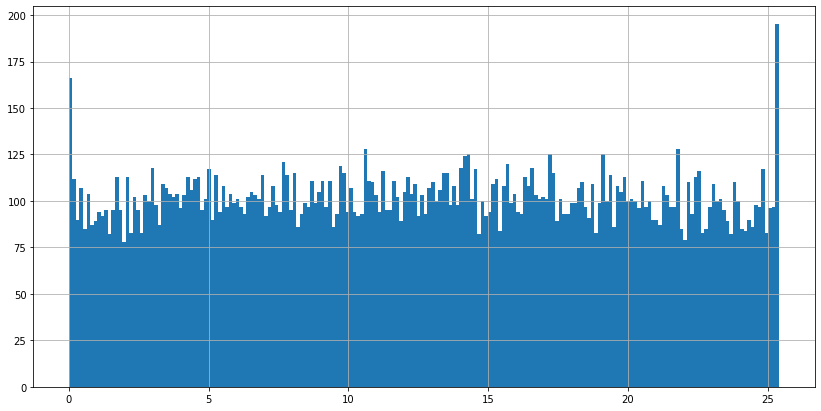

In [ ]:
deneme_Source.weighted_Xpos.hist(bins=200,figsize=(14,7))

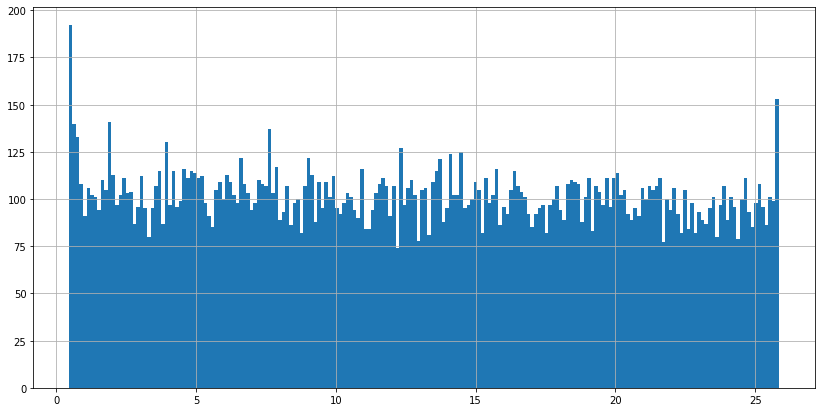

In [ ]:
deneme_Source.weighted_Ypos.hist(bins=200,figsize=(14,7))

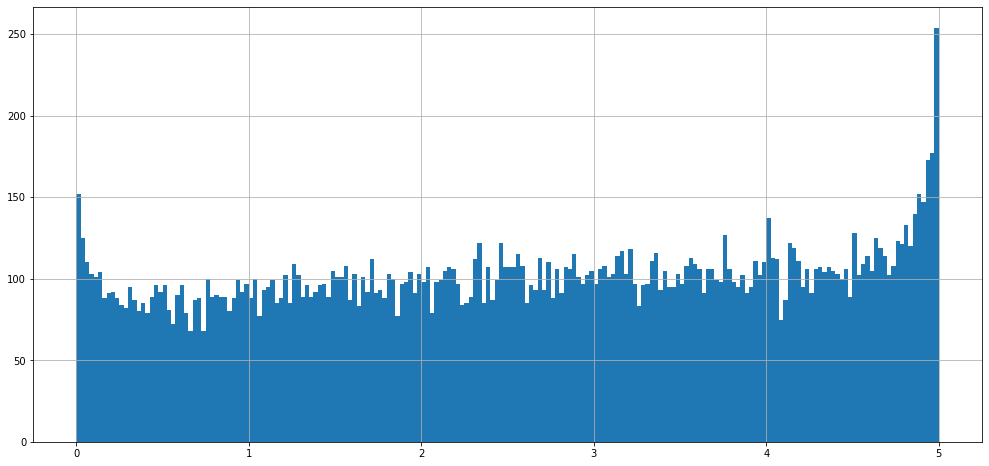

In [ ]:
deneme_Source.weighted_Zpos.hist(bins=200,figsize=(17,8))

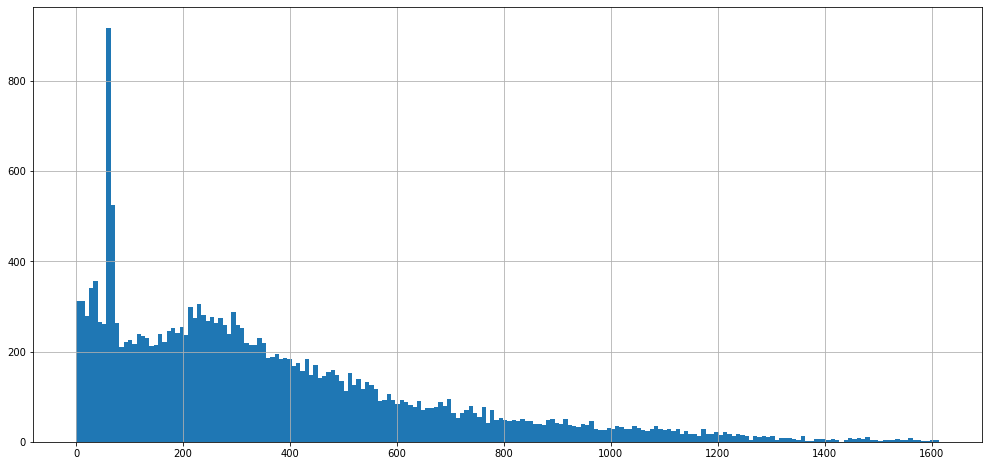

In [ ]:
deneme_Source.Energy_sum.hist(bins=200,figsize=(17,8))

##SPECIAL HISTOGRAMS (weighted)


###60 80

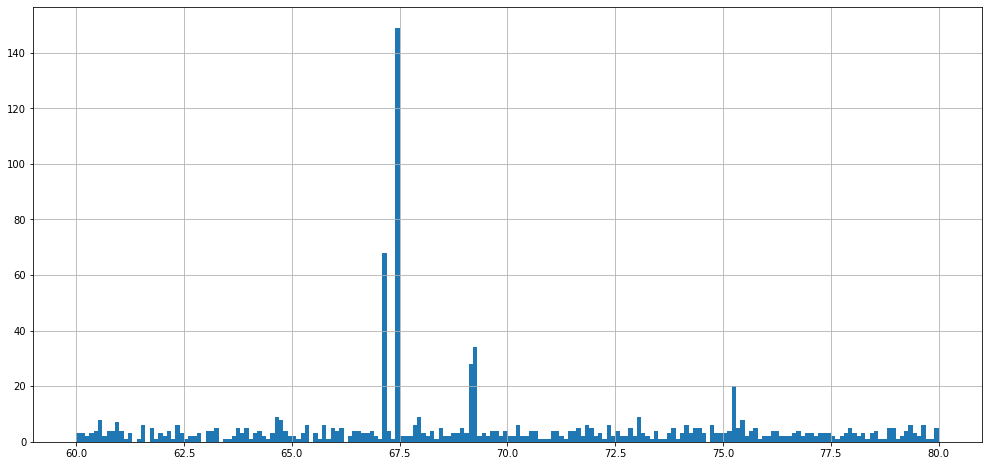

In [ ]:
deneme_Source[(deneme_Source.Energy_sum >= 60) & 
              (deneme_Source.Energy_sum <= 80)].Energy_sum.hist(bins=200,figsize=(17,8))

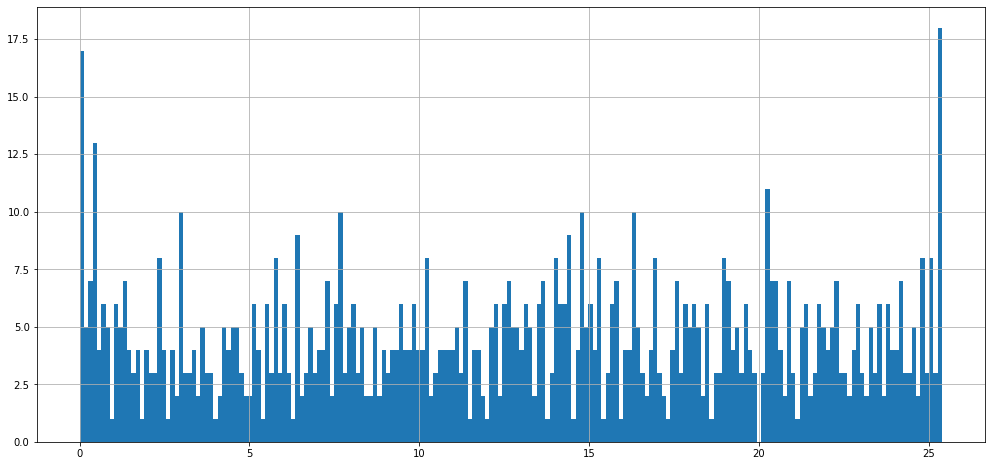

In [ ]:
deneme_Source[(deneme_Source.Energy_sum >= 60) & 
              (deneme_Source.Energy_sum <= 80)].weighted_Xpos.hist(bins=200,figsize=(17,8))

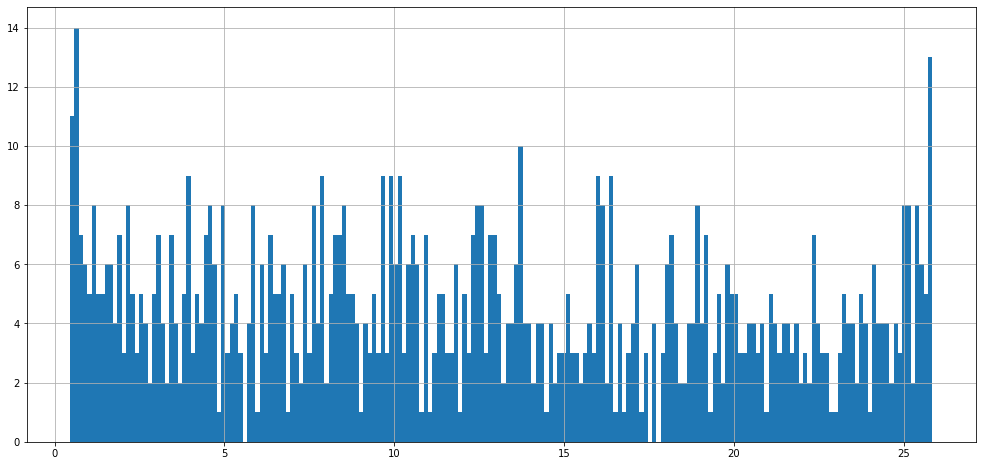

In [ ]:
deneme_Source[(deneme_Source.Energy_sum >= 60) & 
              (deneme_Source.Energy_sum <= 80)].weighted_Ypos.hist(bins=200,figsize=(17,8))

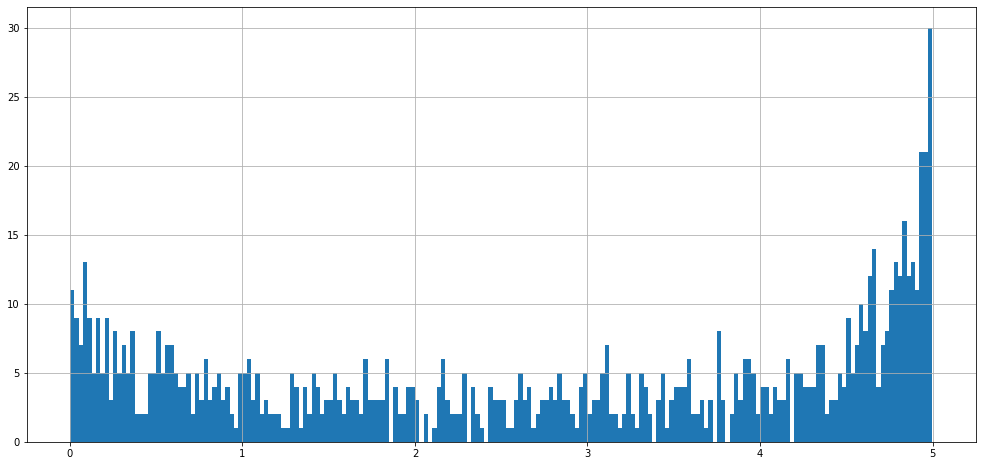

In [ ]:
deneme_Source[(deneme_Source.Energy_sum >= 60) & 
              (deneme_Source.Energy_sum <= 80)].weighted_Zpos.hist(bins=200,figsize=(17,8))

###20 200

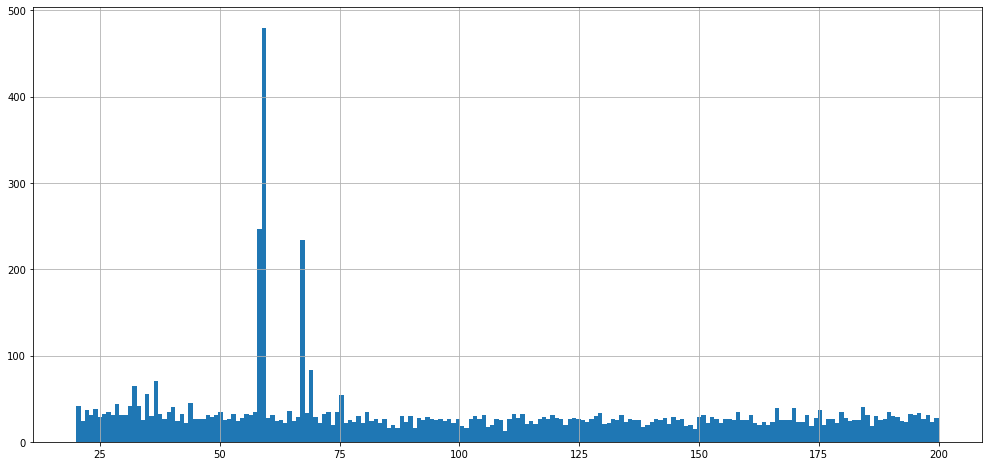

In [ ]:
deneme_Source[(deneme_Source.Energy_sum >= 20) & 
              (deneme_Source.Energy_sum <= 200)].Energy_sum.hist(bins=200,figsize=(17,8))

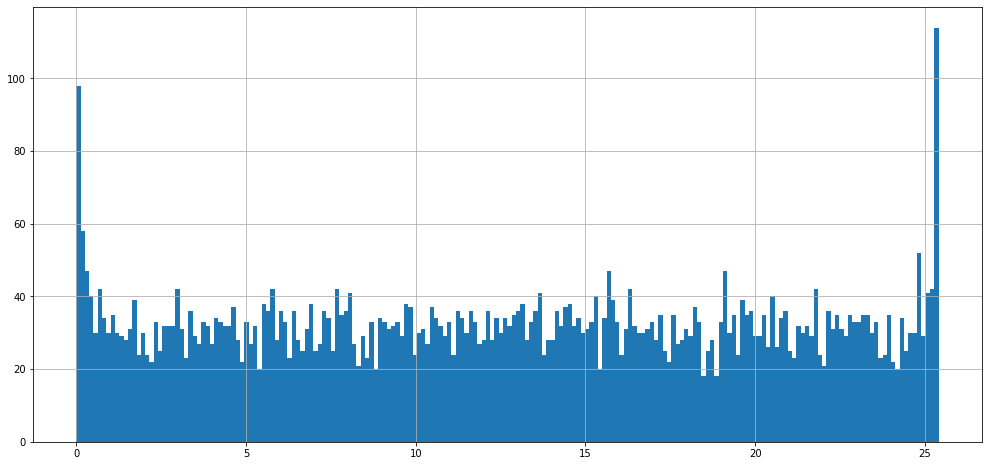

In [ ]:
deneme_Source[(deneme_Source.Energy_sum >= 20) & 
              (deneme_Source.Energy_sum <= 200)].weighted_Xpos.hist(bins=200,figsize=(17,8))

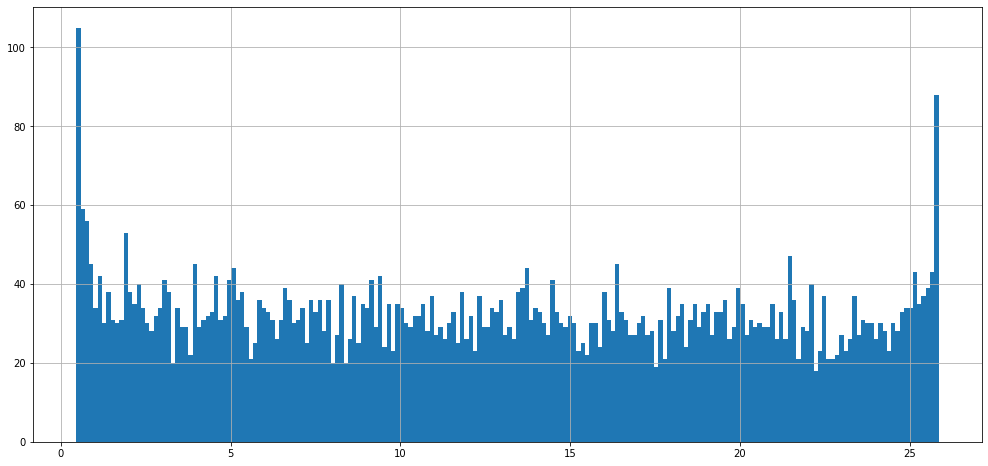

In [ ]:
deneme_Source[(deneme_Source.Energy_sum >= 20) & 
              (deneme_Source.Energy_sum <= 200)].weighted_Ypos.hist(bins=200,figsize=(17,8))

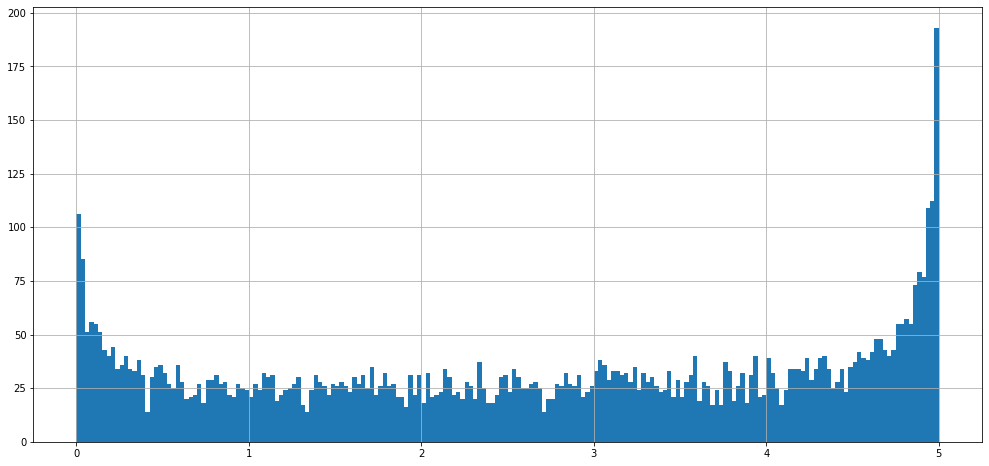

In [ ]:
deneme_Source[(deneme_Source.Energy_sum >= 20) & 
              (deneme_Source.Energy_sum <= 200)].weighted_Zpos.hist(bins=200,figsize=(17,8))

##K-MEANS

###20 200


In [ ]:
deneme2_Source = deneme_Source[(deneme_Source.Energy_sum >= 20) & (deneme_Source.Energy_sum <= 200)]

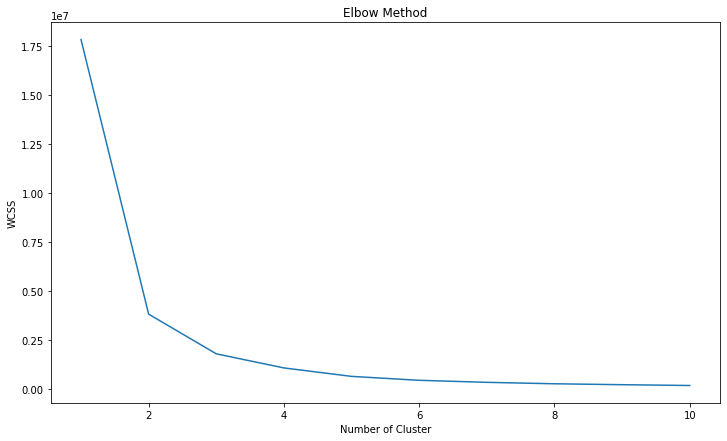

In [ ]:
X = deneme2_Source.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,7))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

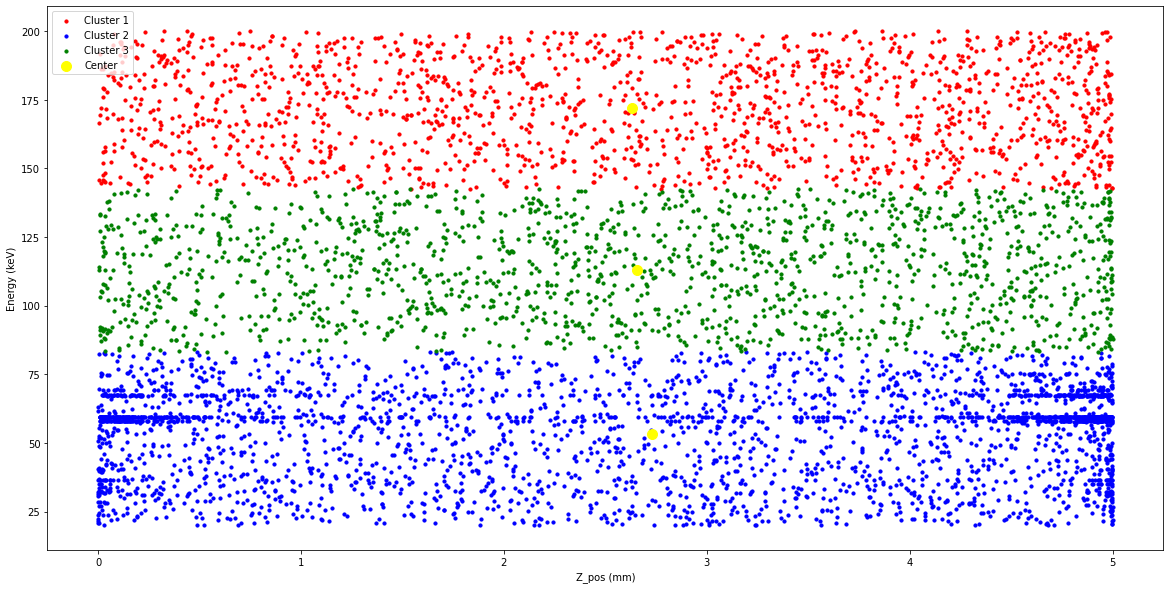

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Center')
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

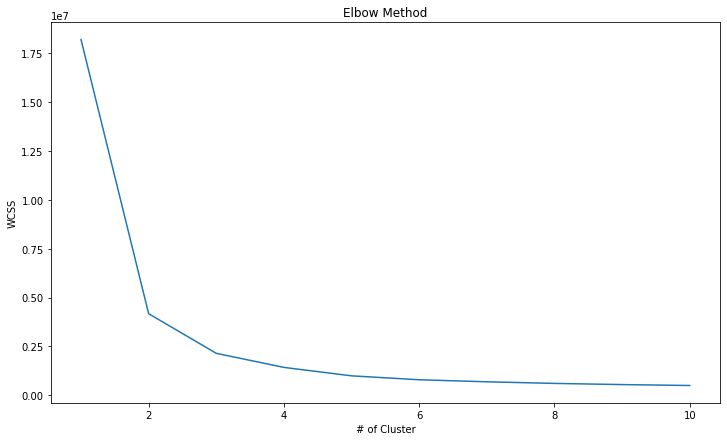

In [ ]:
X = deneme2_Source.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,7))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

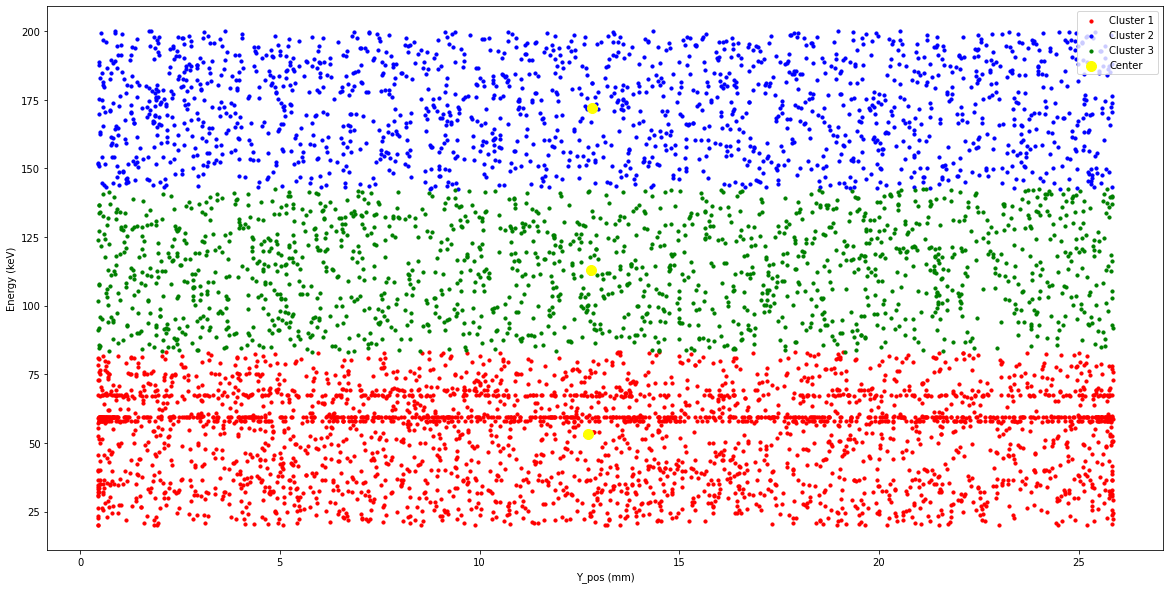

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Center')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

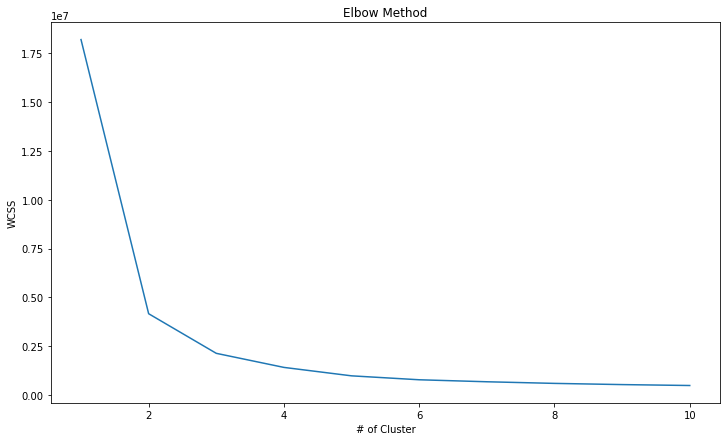

In [ ]:
X = deneme2_Source.iloc[:,[1,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,7))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

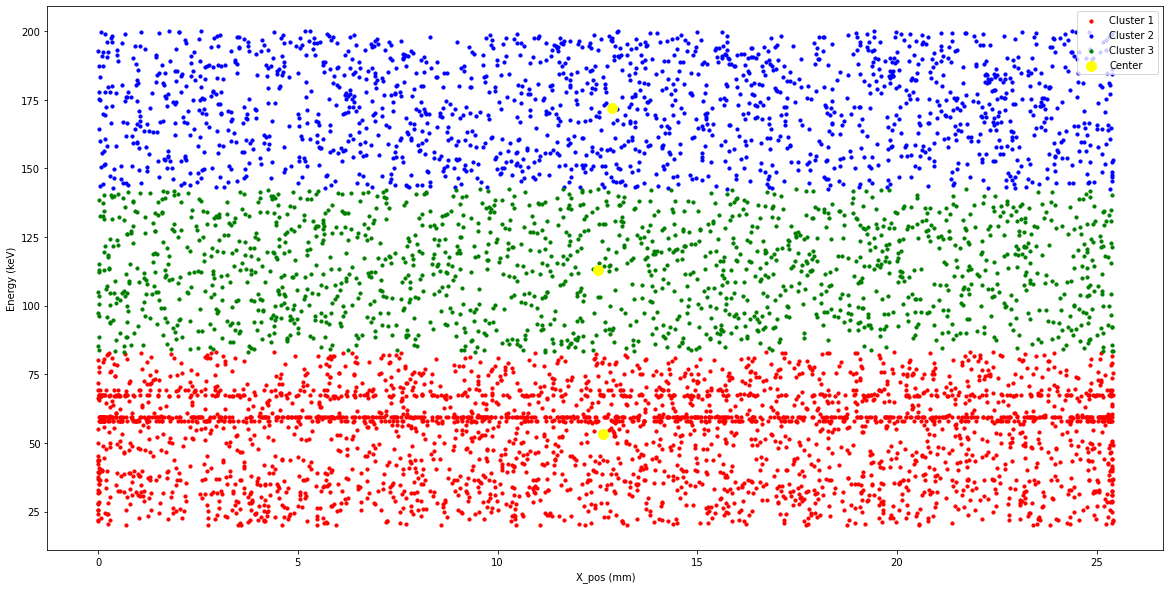

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Center')
plt.xlabel('X_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

###20 40

In [ ]:
deneme3_Source = deneme_Source[(deneme_Source.Energy_sum >= 20) & (deneme_Source.Energy_sum <= 40)]

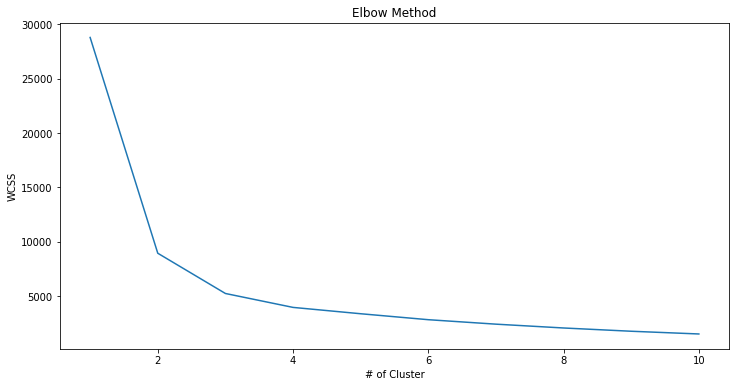

In [ ]:
X = deneme3_Source.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

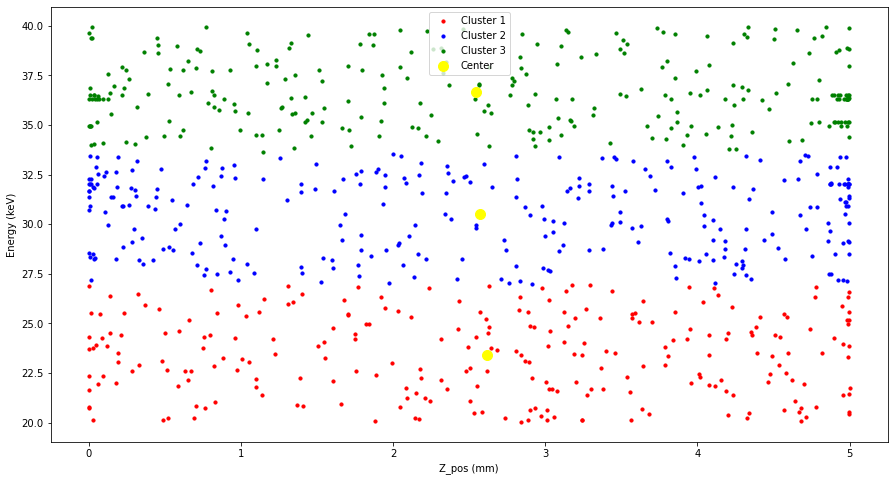

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

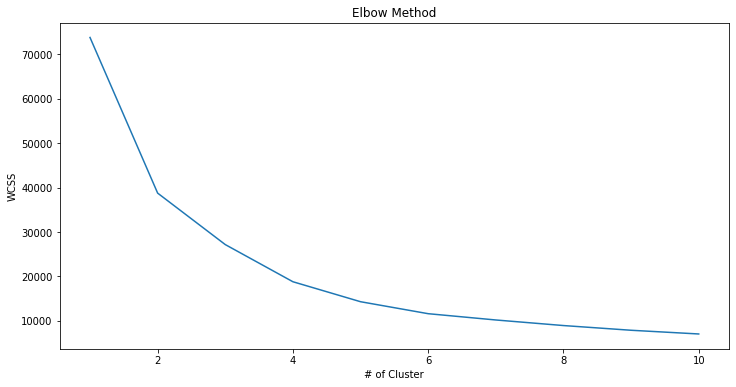

In [ ]:
X = deneme3_Source.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

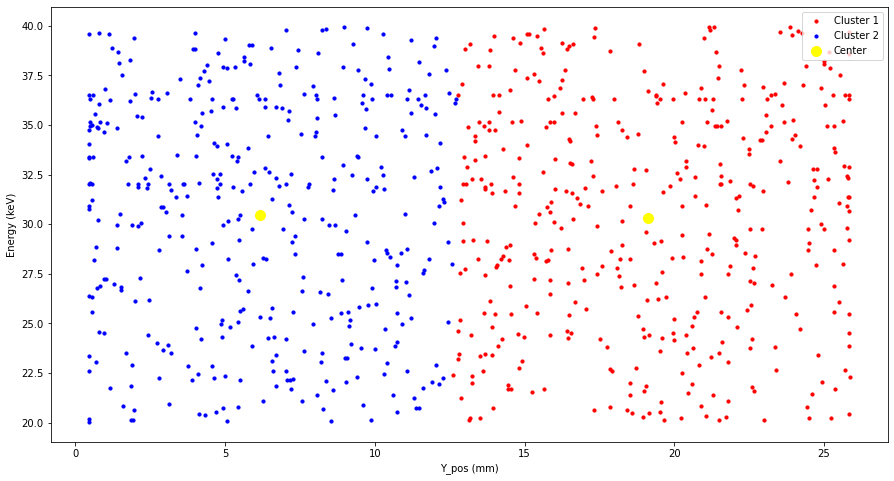

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

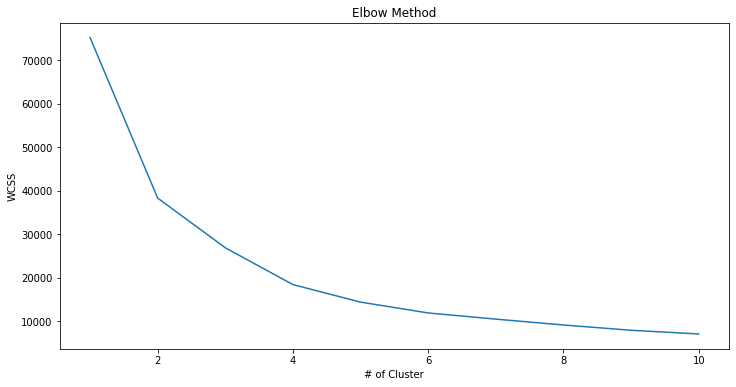

In [ ]:
X = deneme3_Source.iloc[:,[1,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

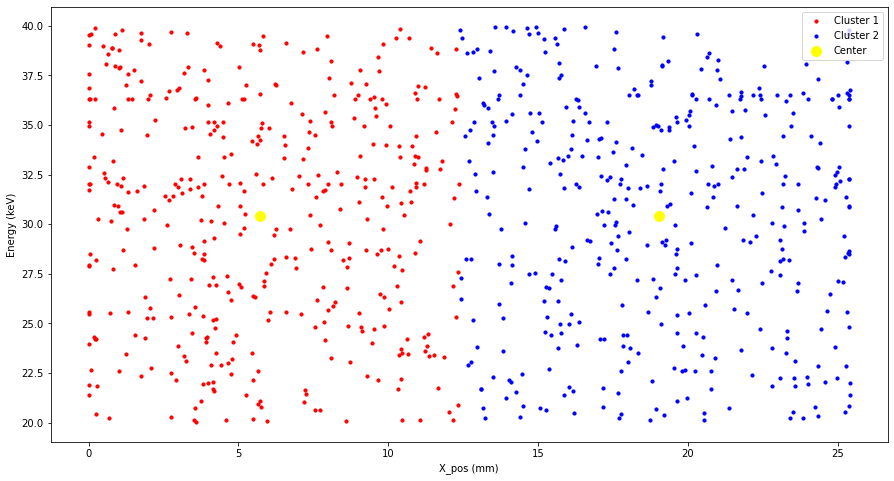

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('X_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

###40 60

In [ ]:
deneme4_Source = deneme_Source[(deneme_Source.Energy_sum >= 40) & (deneme_Source.Energy_sum <= 60)]

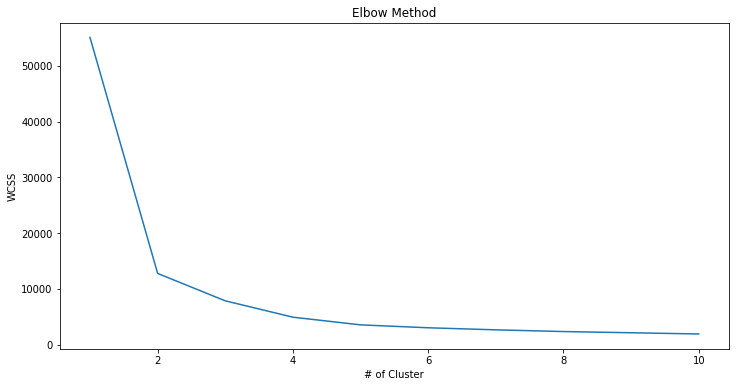

In [ ]:
X = deneme4_Source.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

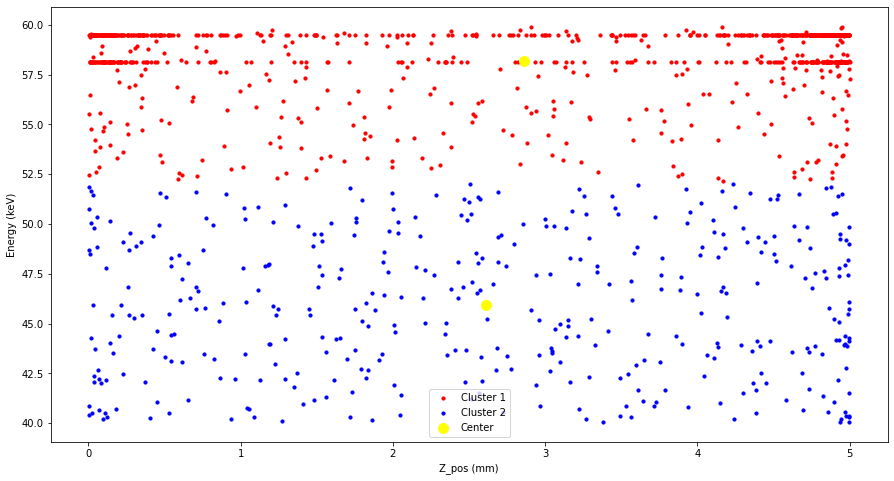

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

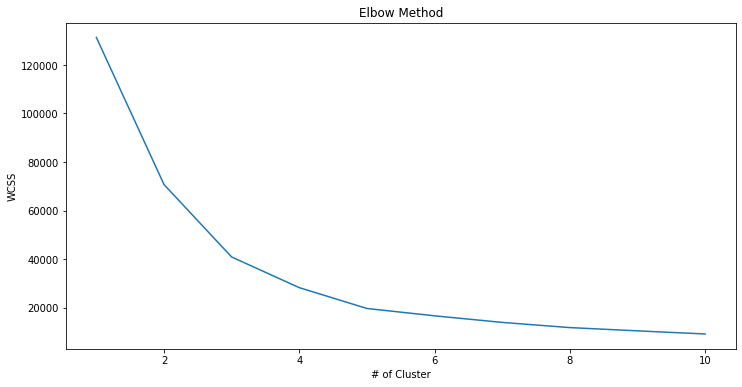

In [ ]:
X = deneme4_Source.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

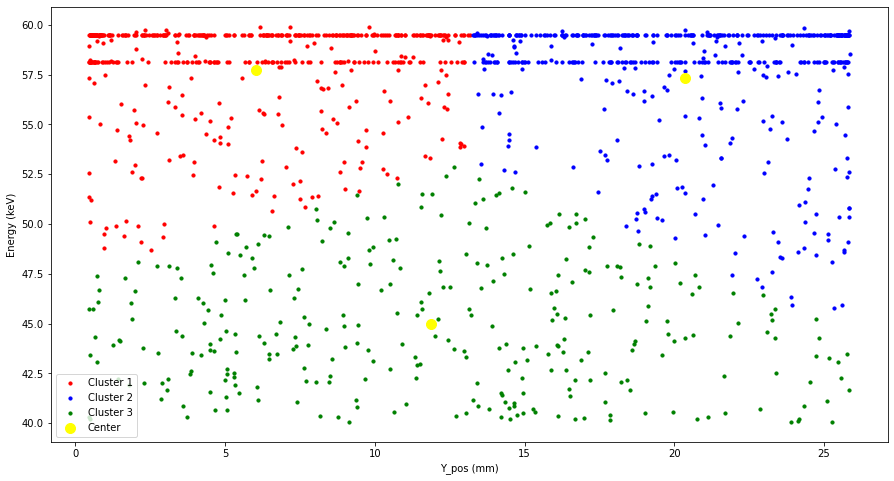

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'black', label = 'Cluster 5')     
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

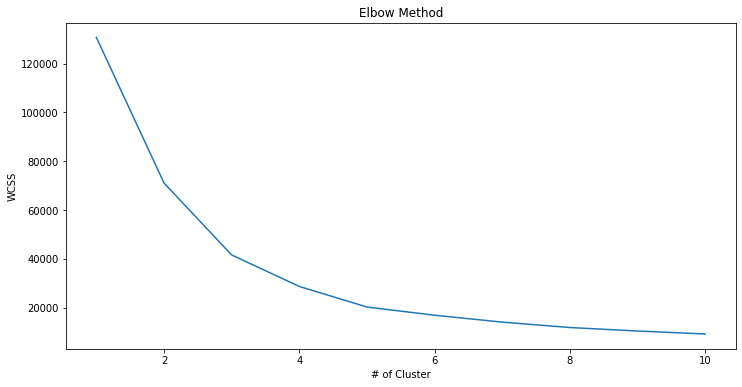

In [ ]:
X = deneme4_Source.iloc[:,[1,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

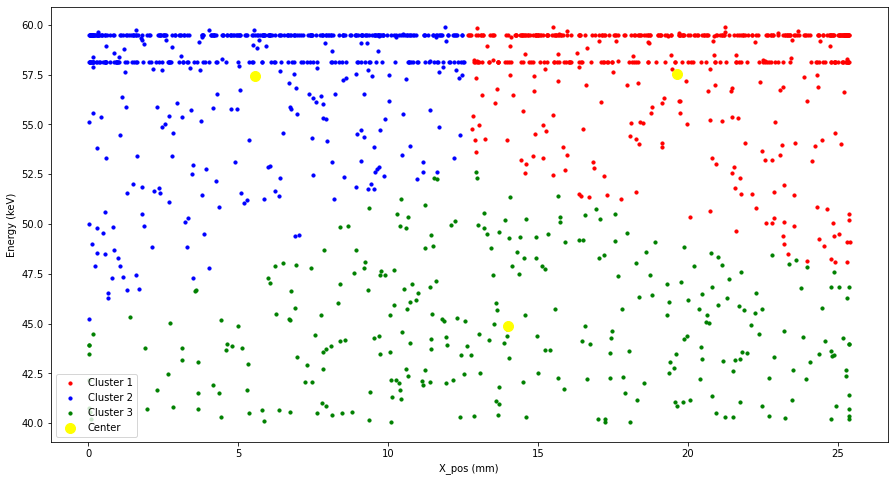

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('X_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

###60 80

In [ ]:
deneme5_Source = deneme_Source[(deneme_Source.Energy_sum >= 60) & (deneme_Source.Energy_sum <= 80)]

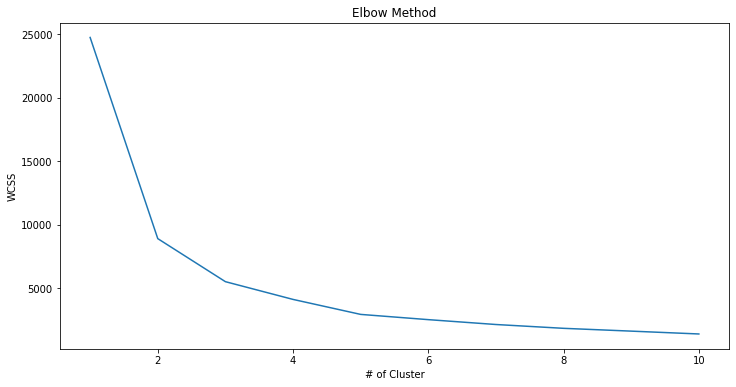

In [ ]:
X = deneme5_Source.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

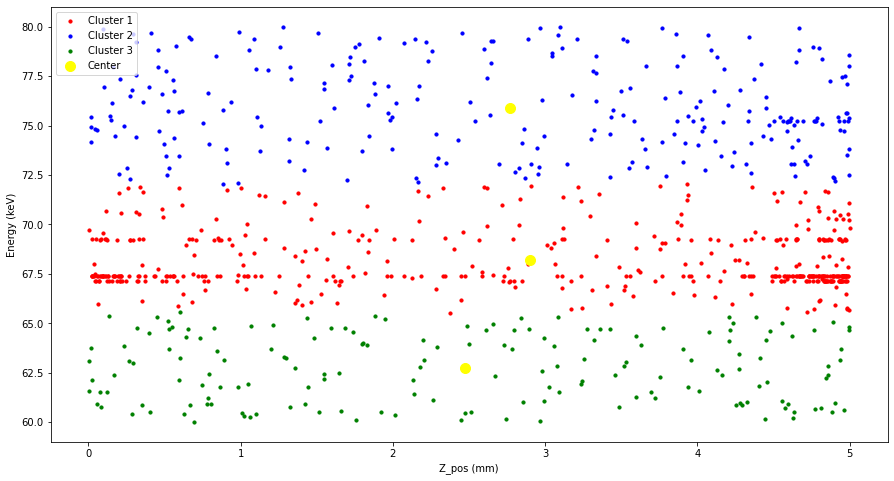

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

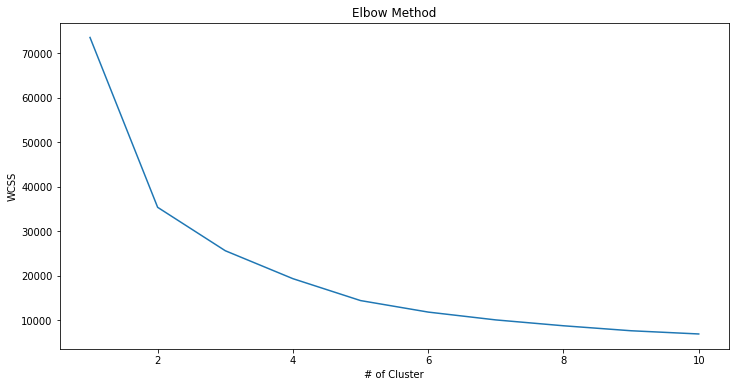

In [ ]:
X = deneme5_Source.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

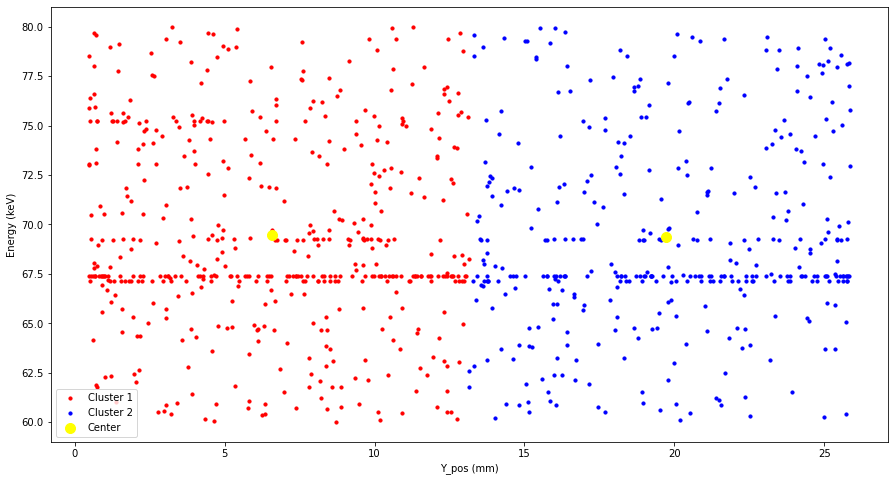

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

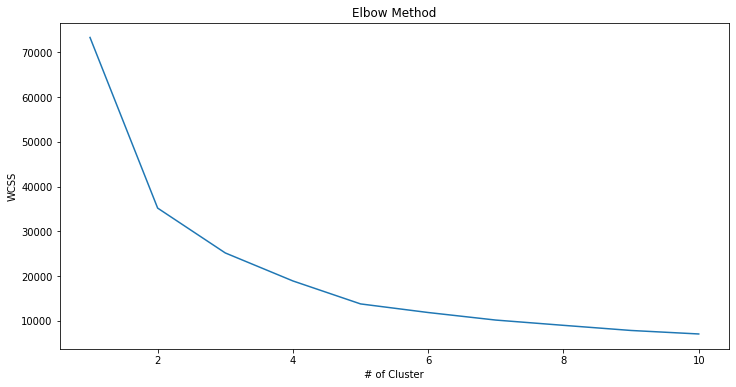

In [ ]:
X = deneme5_Source.iloc[:,[1,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

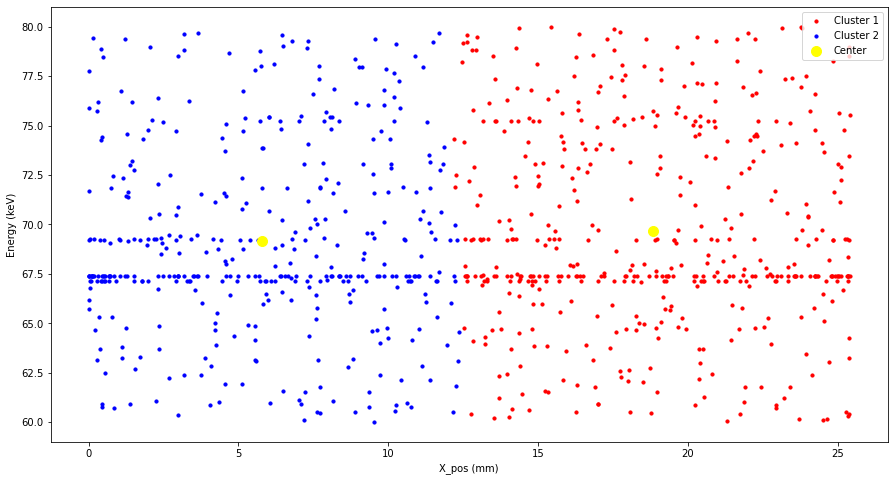

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('X_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

###80 150

In [ ]:
deneme6_Source = deneme_Source[(deneme_Source.Energy_sum >= 80) & (deneme_Source.Energy_sum <= 150)]

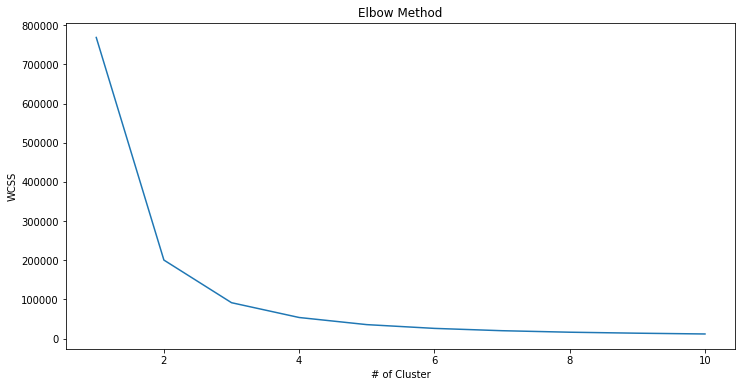

In [ ]:
X = deneme6_Source.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

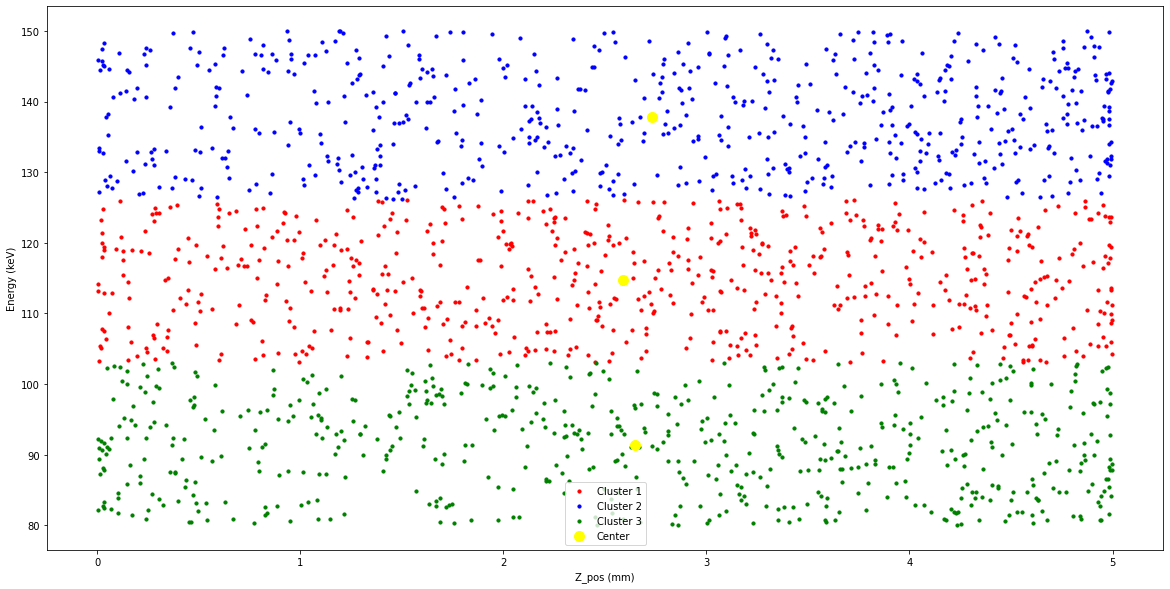

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Z_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

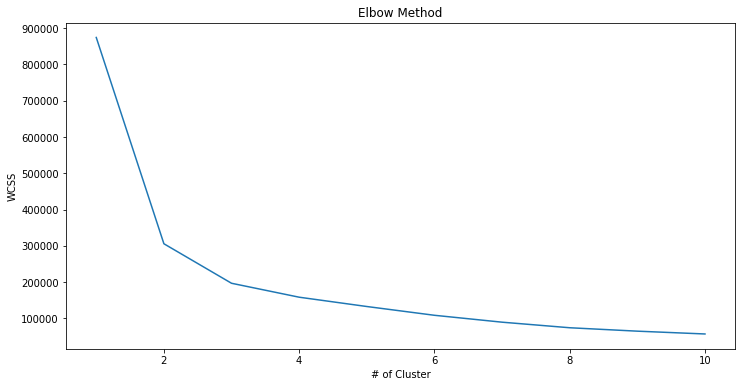

In [ ]:
X = deneme6_Source.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

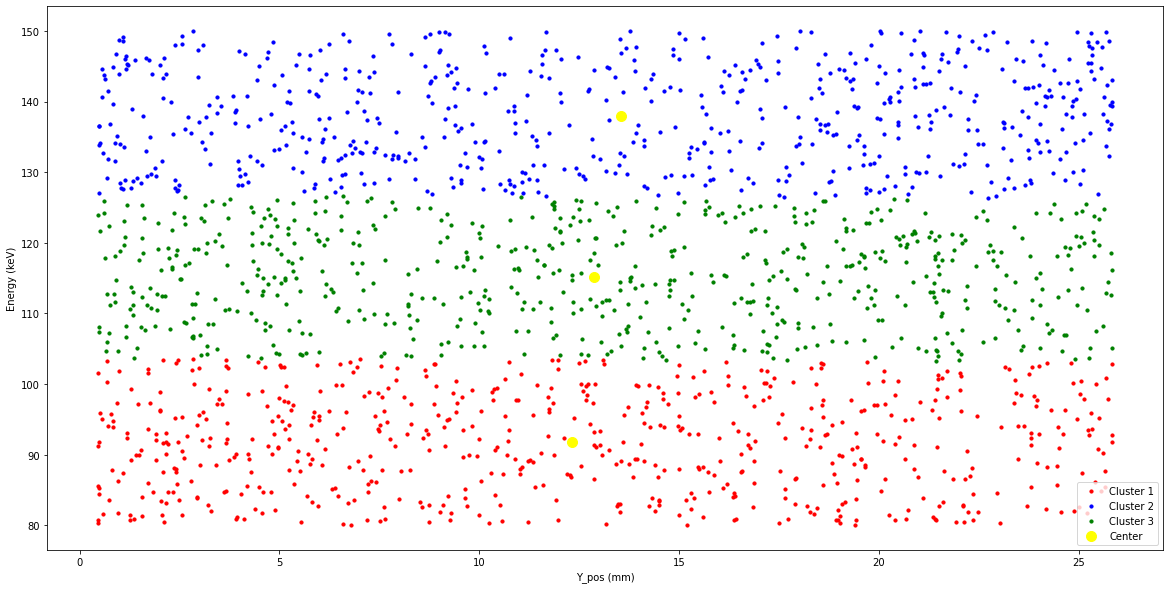

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('Y_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

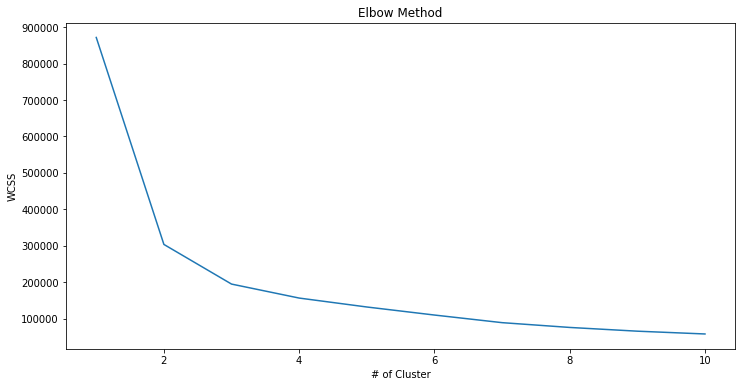

In [ ]:
X = deneme6_Source.iloc[:,[1,4]].values
from sklearn.cluster import KMeans
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Elbow Method')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

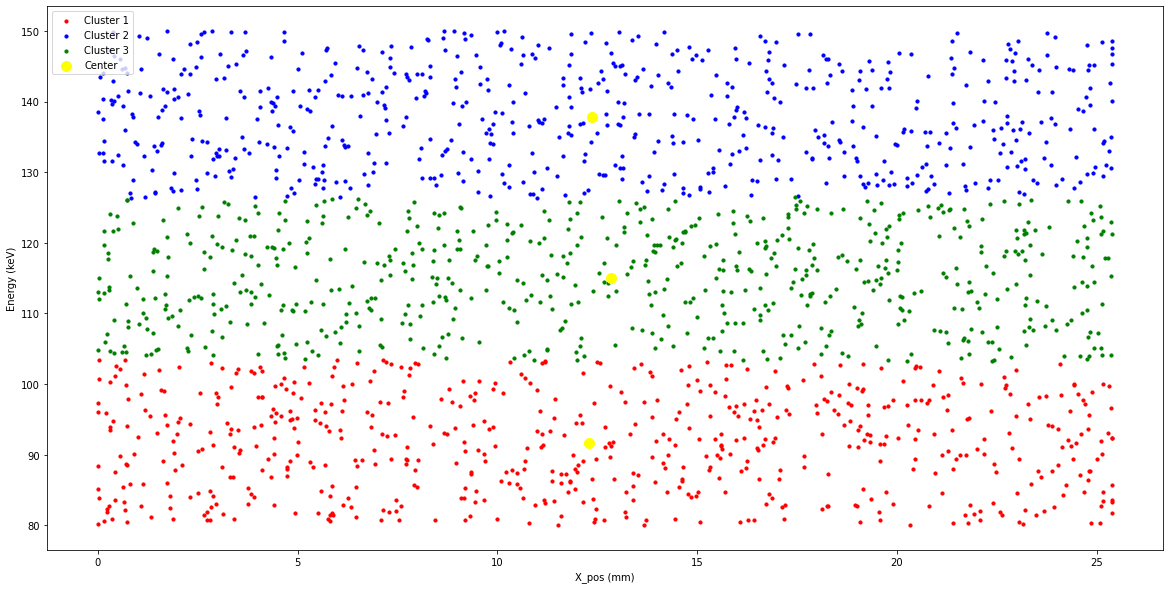

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label='Center')
plt.xlabel('X_pos (mm)')
plt.ylabel('Energy (keV)')
plt.legend()
plt.show()

#COMPARISON

##HISTOGRAM

###POSITIONS

####Z POSITION

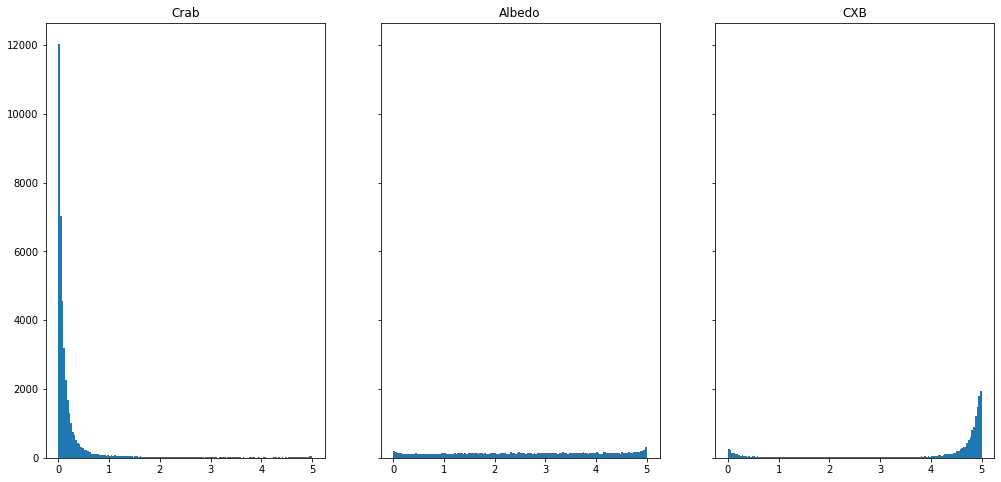

In [ ]:
fig, ax  =  plt.subplots(1, 3, figsize=(17, 8), sharey=True)

ax[0].set_title("Crab")
ax[1].set_title("Albedo")
ax[2].set_title("CXB")

ax[0].hist(deneme.weighted_Zpos,bins=150)
ax[1].hist(deneme_Source.weighted_Zpos,bins=150)
ax[2].hist(deneme_CXB.weighted_Zpos,bins=150)

plt.show()

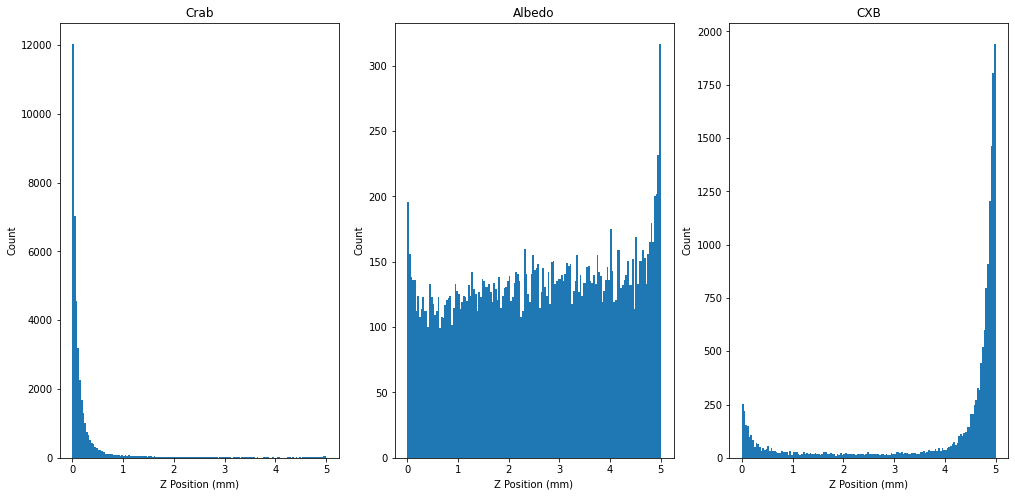

In [ ]:
fig, ax  =  plt.subplots(1, 3, figsize=(17, 8))

ax[0].set_title("Crab")
ax[1].set_title("Albedo")
ax[2].set_title("CXB")

ax[0].hist(deneme.weighted_Zpos,bins=150)
ax[0].set_xlabel('Z Position (mm)')
ax[0].set_ylabel('Count')
ax[1].hist(deneme_Source.weighted_Zpos,bins=150)
ax[1].set_xlabel('Z Position (mm)')
ax[1].set_ylabel('Count')
ax[2].hist(deneme_CXB.weighted_Zpos,bins=150)
ax[2].set_xlabel('Z Position (mm)')
ax[2].set_ylabel('Count')

plt.show()


####Y POSITION

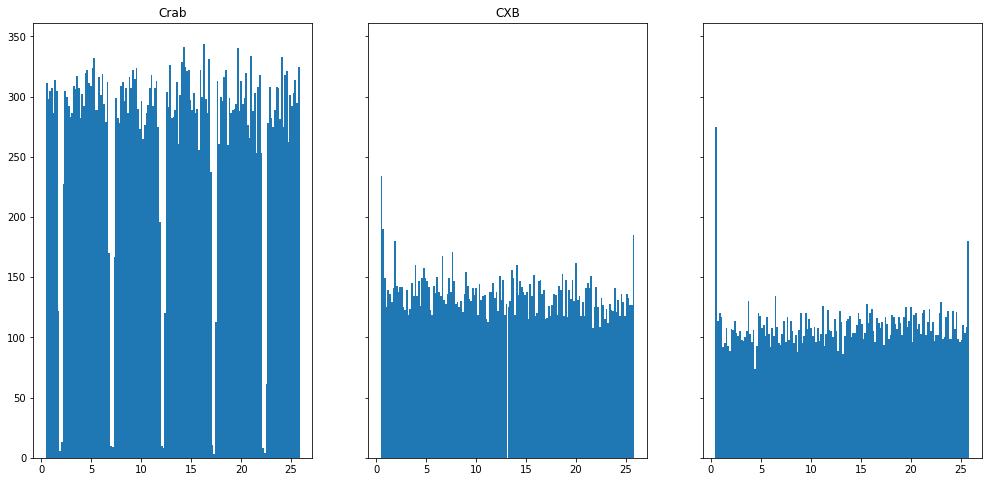

In [ ]:
fig, ax  =  plt.subplots(1, 3, figsize=(17, 8), sharey=True)

ax[0].set_title("Crab")
ax[1].set_title("Albedo")
ax[1].set_title("CXB")

ax[0].hist(deneme.weighted_Ypos,bins=150)
ax[1].hist(deneme_Source.weighted_Ypos,bins=150)
ax[2].hist(deneme_CXB.weighted_Ypos,bins=150)

plt.show()

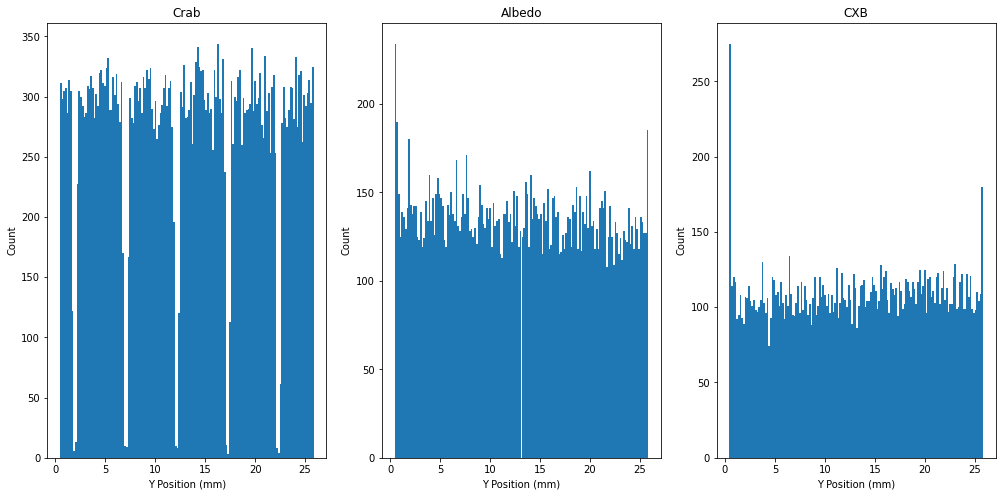

In [ ]:
fig, ax  =  plt.subplots(1, 3, figsize=(17, 8))

ax[0].set_title("Crab")
ax[1].set_title("Albedo")
ax[2].set_title("CXB")

ax[0].hist(deneme.weighted_Ypos,bins=150)
ax[0].set_xlabel('Y Position (mm)')
ax[0].set_ylabel('Count')
ax[1].hist(deneme_Source.weighted_Ypos,bins=150)
ax[1].set_xlabel('Y Position (mm)')
ax[1].set_ylabel('Count')
ax[2].hist(deneme_CXB.weighted_Ypos,bins=150)
ax[2].set_xlabel('Y Position (mm)')
ax[2].set_ylabel('Count')

plt.show()


####X POSITION

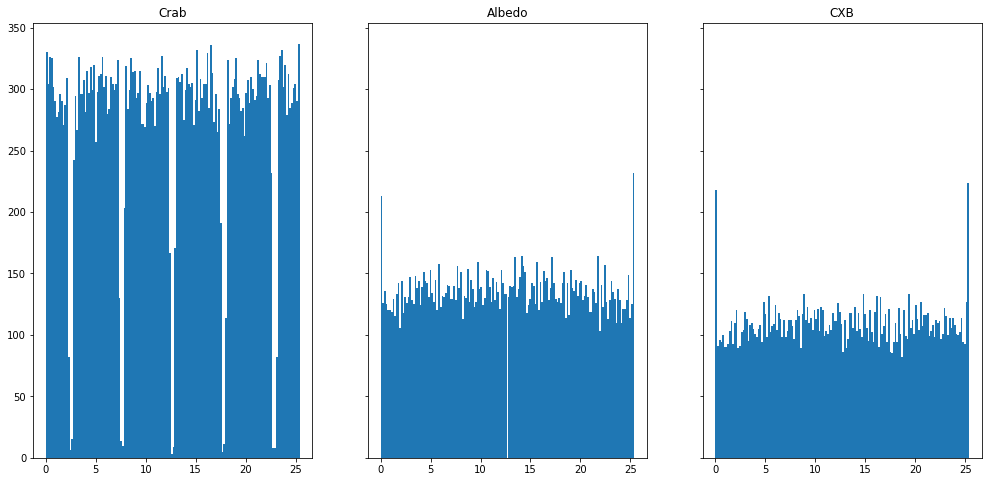

In [ ]:
fig, ax  =  plt.subplots(1, 3, figsize=(17, 8), sharey=True)

ax[0].set_title("Crab")
ax[1].set_title("Albedo")
ax[2].set_title("CXB")

ax[0].hist(deneme.weighted_Xpos,bins=150)
ax[1].hist(deneme_Source.weighted_Xpos,bins=150)
ax[2].hist(deneme_CXB.weighted_Xpos,bins=150)

plt.show()

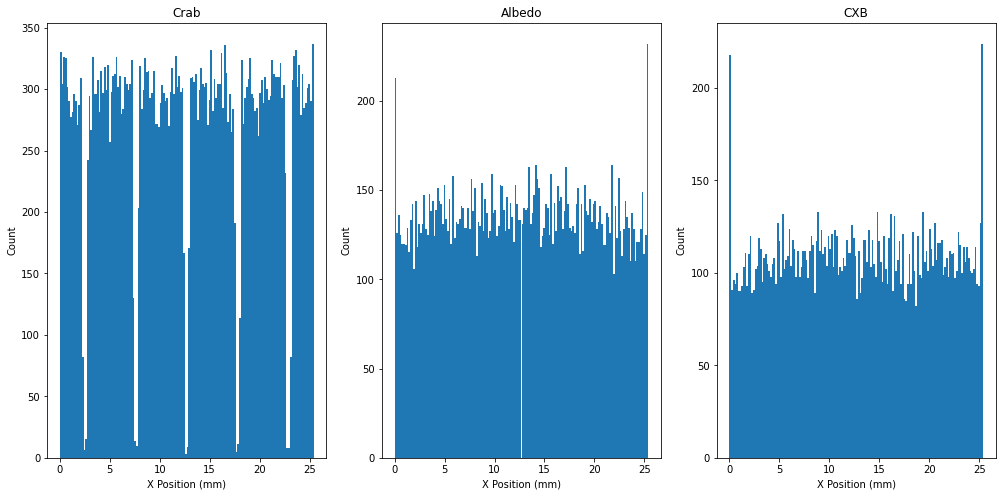

In [ ]:
fig, ax  =  plt.subplots(1, 3, figsize=(17, 8))

ax[0].set_title("Crab")
ax[1].set_title("Albedo")
ax[2].set_title("CXB")

ax[0].hist(deneme.weighted_Xpos,bins=150)
ax[0].set_xlabel('X Position (mm)')
ax[0].set_ylabel('Count')
ax[1].hist(deneme_Source.weighted_Xpos,bins=150)
ax[1].set_xlabel('X Position (mm)')
ax[1].set_ylabel('Count')
ax[2].hist(deneme_CXB.weighted_Xpos,bins=150)
ax[2].set_xlabel('X Position (mm)')
ax[2].set_ylabel('Count')

plt.show()

###60 - 80 keV

####Z_pos

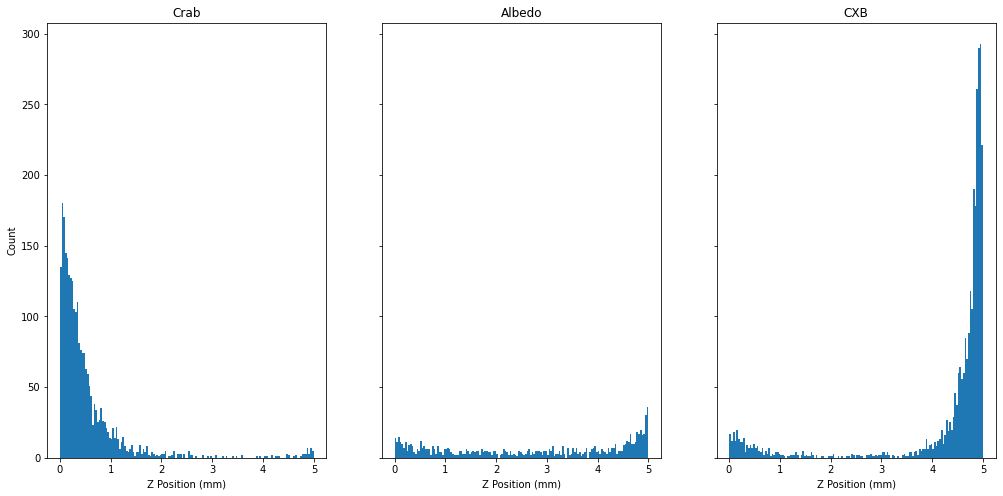

In [ ]:
fig, ax  =  plt.subplots(1, 3, figsize=(17, 8), sharey=True)

ax[0].set_title("Crab")
ax[1].set_title("Albedo")
ax[2].set_title("CXB")

ax[0].hist(deneme[(deneme.Energy_sum >= 60) & (deneme.Energy_sum <= 80)].weighted_Zpos,bins=150)
ax[0].set_xlabel('Z Position (mm)')
ax[0].set_ylabel('Count')
ax[1].hist(deneme_Source[(deneme_Source.Energy_sum >= 60) & (deneme_Source.Energy_sum <= 80)].weighted_Zpos,bins=150)
ax[1].set_xlabel('Z Position (mm)')
ax[2].hist(deneme_CXB[(deneme_CXB.Energy_sum >= 60) & (deneme_CXB.Energy_sum <= 80)].weighted_Zpos,bins=150)
ax[2].set_xlabel('Z Position (mm)')

plt.show()

####Y_pos

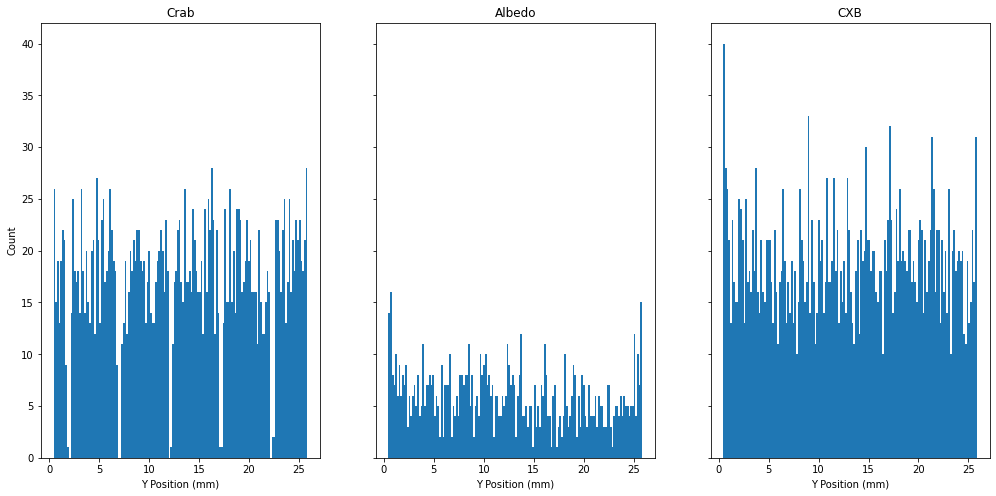

In [ ]:
fig, ax  =  plt.subplots(1, 3, figsize=(17, 8), sharey=True)

ax[0].set_title("Crab")
ax[1].set_title("Albedo")
ax[2].set_title("CXB")


ax[0].hist(deneme[(deneme.Energy_sum >= 60) & (deneme.Energy_sum <= 80)].weighted_Ypos,bins=150)
ax[0].set_xlabel('Y Position (mm)')
ax[0].set_ylabel('Count')
ax[1].hist(deneme_Source[(deneme_Source.Energy_sum >= 60) & (deneme_Source.Energy_sum <= 80)].weighted_Ypos,bins=150)
ax[1].set_xlabel('Y Position (mm)')
ax[2].hist(deneme_CXB[(deneme_CXB.Energy_sum >= 60) & (deneme_CXB.Energy_sum <= 80)].weighted_Ypos,bins=150)
ax[2].set_xlabel('Y Position (mm)')

plt.show()

####X_pos

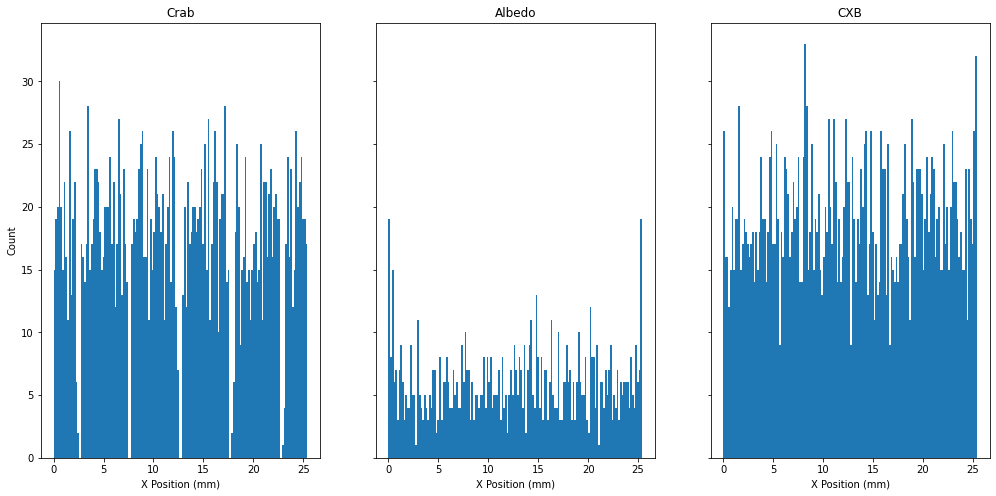

In [ ]:
fig, ax  =  plt.subplots(1, 3, figsize=(17, 8), sharey=True)

ax[0].set_title("Crab")
ax[1].set_title("Albedo")
ax[2].set_title("CXB")


ax[0].hist(deneme[(deneme.Energy_sum >= 60) & (deneme.Energy_sum <= 80)].weighted_Xpos,bins=150)
ax[0].set_xlabel('X Position (mm)')
ax[0].set_ylabel('Count')
ax[1].hist(deneme_Source[(deneme_Source.Energy_sum >= 60) & (deneme_Source.Energy_sum <= 80)].weighted_Xpos,bins=150)
ax[1].set_xlabel('X Position (mm)')
ax[2].hist(deneme_CXB[(deneme_CXB.Energy_sum >= 60) & (deneme_CXB.Energy_sum <= 80)].weighted_Xpos,bins=150)
ax[2].set_xlabel('X Position (mm)')

plt.show()

In [48]:
x = deneme[(deneme.Energy_sum >= 20) & (deneme.Energy_sum <= 200)]
x = x.sample(frac=1)
x.reset_index(inplace=True, drop=True)
x

Event  weighted_Xpos  weighted_Ypos  weighted_Zpos  Energy_sum
0      15212       3.693562       3.449321       0.108431    22.94390
1      31320      14.211614       9.529191       0.167211    49.67610
2      19888       7.293436      21.805700       0.006138    27.24990
3      34147      11.694836      25.768387       0.016200    61.64830
4      39825      12.116894       3.097743       1.545655   137.92400
...      ...            ...            ...            ...         ...
27679  40052       4.013435       8.145530       0.438316   149.06500
27680  27611      20.683241      21.977677       0.047179    38.99383
27681  14667      21.326057       6.582820       0.135501    22.82940
27682  37610      15.497607      18.881489       0.734736    91.54490
27683  34980       9.358400       0.597162       0.804992    67.54830

[27684 rows x 5 columns]

In [52]:
y = deneme_Source[(deneme_Source.Energy_sum >= 20) & (deneme_Source.Energy_sum <= 200)]
y = y.sample(frac=1)
y.reset_index(inplace=True, drop=True)
y

Event  weighted_Xpos  weighted_Ypos  weighted_Zpos  Energy_sum
0      5960      20.605500       4.581500       3.067380  113.195000
1      6070       6.634068       0.673438       1.489080   59.483000
2     11603       6.508602       0.454415       3.374290   33.327489
3      7794      10.529300      15.181400       2.380120   46.749400
4      7687      10.588400      23.754000       4.814390  101.406000
...     ...            ...            ...            ...         ...
6488  18099      13.888500       1.004990       0.128975  118.844000
6489   8762      10.414932       9.794845       0.021468   62.143800
6490    229       5.305505       0.866776       0.327157  199.968000
6491   1800      23.211900       8.389060       3.549050  131.855000
6492   3122      25.153400      23.979000       1.101850  134.062000

[6493 rows x 5 columns]

In [46]:
deneme_CXB[(deneme_CXB.Energy_sum >= 20) & (deneme_CXB.Energy_sum <= 200)]

Event  weighted_Xpos  weighted_Ypos  weighted_Zpos  Energy_sum
112     113       9.427810      16.459426       0.138320    20.01430
114     115      13.290220      23.501960       0.135576    20.13320
116     117      20.380240      12.581200       0.057921    20.03550
117     118      13.079290      12.584763       0.097505    20.21480
118     119      23.370000      21.073048       0.071372    20.45790
...     ...            ...            ...            ...         ...
1758   1759      15.826190      19.549145       4.960153    66.03180
1759   1760      19.923384      22.998433       4.964883    72.75100
1760   1761      23.845270      14.935424       0.487756    72.70152
1761   1762       9.364178       4.066025       4.951885    59.48300
1762   1763       5.703787      10.443047       4.860466    61.05590

[1543 rows x 5 columns]

###20 - 200 keV

####Z_pos

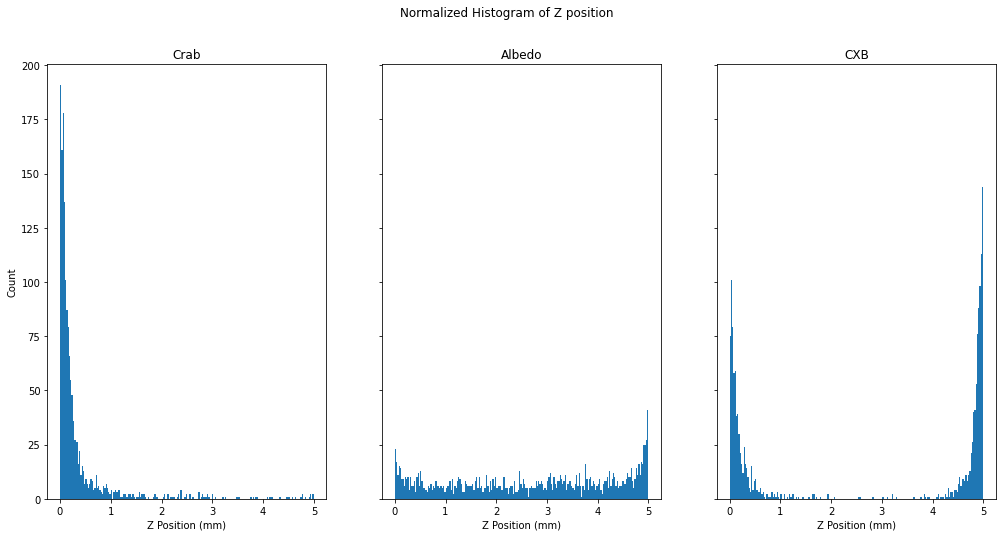

In [59]:
fig, ax  =  plt.subplots(1, 3, figsize=(17, 8), sharey=True)

ax[0].set_title("Crab")
ax[1].set_title("Albedo")
ax[2].set_title("CXB")

ax[0].hist(x[:1543].weighted_Zpos,bins=200)
ax[0].set_xlabel('Z Position (mm)')
ax[0].set_ylabel('Count')
ax[1].hist(y[:1543].weighted_Zpos,bins=200)
ax[1].set_xlabel('Z Position (mm)')
ax[2].hist(deneme_CXB[(deneme_CXB.Energy_sum >= 20) & (deneme_CXB.Energy_sum <= 200)].weighted_Zpos,bins=200)
ax[2].set_xlabel('Z Position (mm)')

plt.suptitle('Normalized Histogram of Z position')
plt.show()

####Y_pos

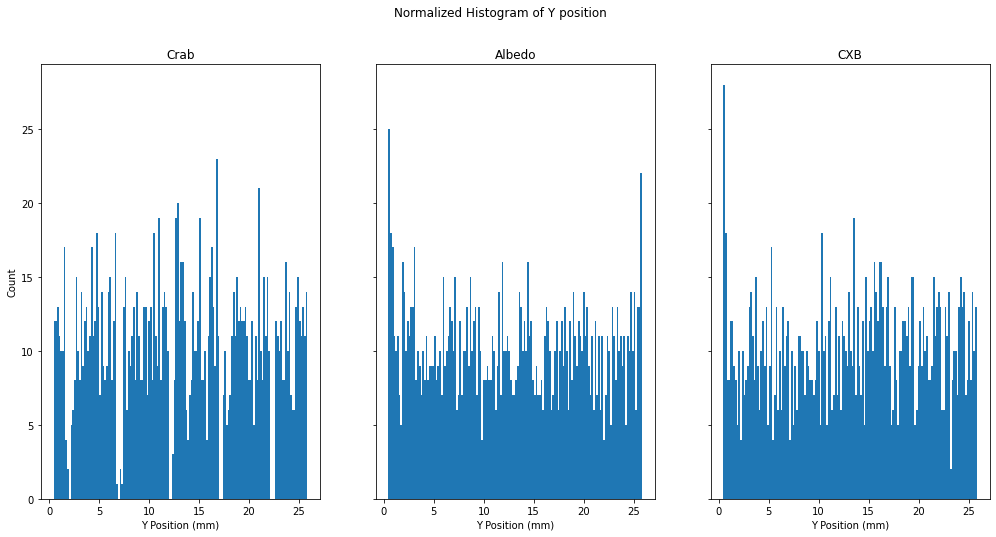

In [63]:
fig, ax  =  plt.subplots(1, 3, figsize=(17, 8), sharey=True)

ax[0].set_title("Crab")
ax[1].set_title("Albedo")
ax[2].set_title("CXB")

ax[0].hist(x[:1543].weighted_Ypos,bins=150)
ax[0].set_xlabel('Y Position (mm)')
ax[0].set_ylabel('Count')
ax[1].hist(y[:1543].weighted_Ypos,bins=150)
ax[1].set_xlabel('Y Position (mm)')
ax[2].hist(deneme_CXB[(deneme_CXB.Energy_sum >= 20) & (deneme_CXB.Energy_sum <= 200)].weighted_Ypos,bins=150)
ax[2].set_xlabel('Y Position (mm)')

plt.suptitle('Normalized Histogram of Y position')
plt.show()

####X_pos

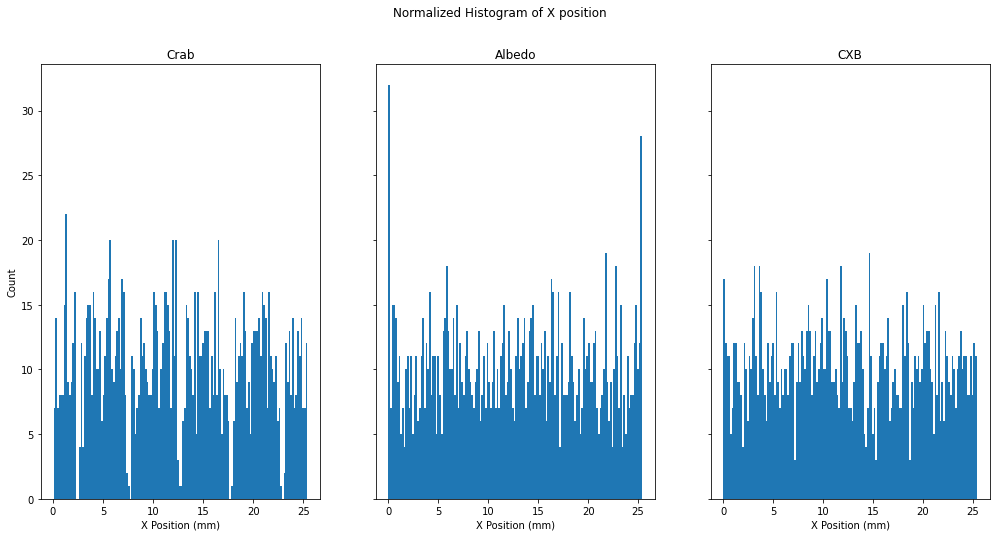

In [64]:
fig, ax  =  plt.subplots(1, 3, figsize=(17, 8), sharey=True)

ax[0].set_title("Crab")
ax[1].set_title("Albedo")
ax[2].set_title("CXB")

ax[0].hist(x[:1543].weighted_Xpos,bins=150)
ax[0].set_xlabel('X Position (mm)')
ax[0].set_ylabel('Count')
ax[1].hist(y[:1543].weighted_Xpos,bins=150)
ax[1].set_xlabel('X Position (mm)')
ax[2].hist(deneme_CXB[(deneme_CXB.Energy_sum >= 20) & (deneme_CXB.Energy_sum <= 200)].weighted_Xpos,bins=150)
ax[2].set_xlabel('X Position (mm)')

plt.suptitle('Normalized Histogram of X position')
plt.show()

##K-Means

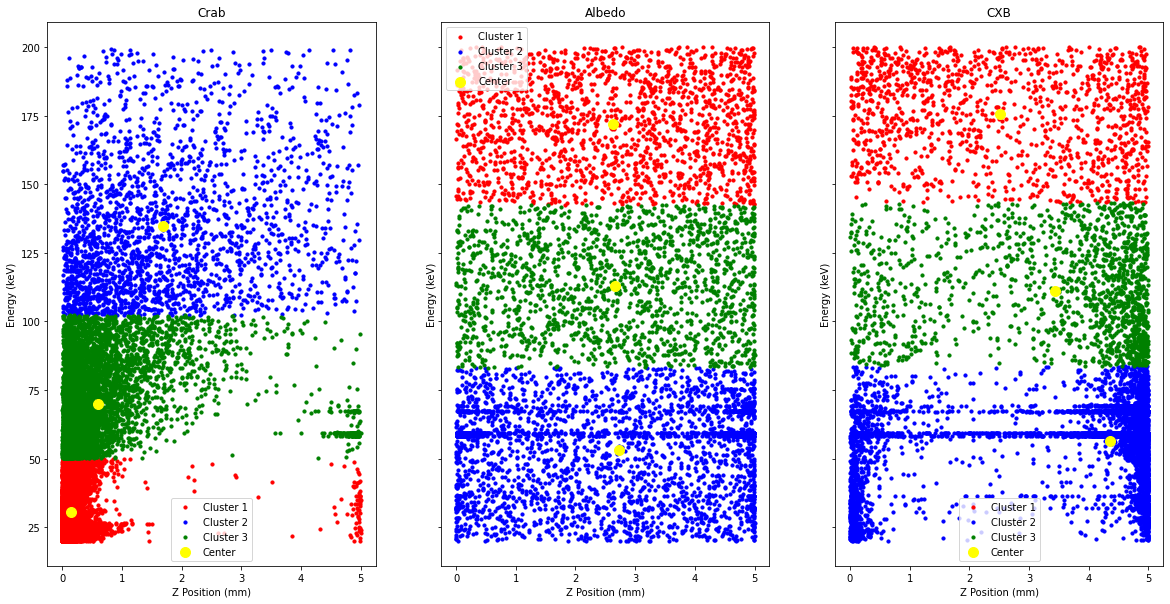

In [ ]:
fig, ax  =  plt.subplots(1, 3, figsize=(20, 10), sharey=True)

ax[0].set_title("Crab")
ax[1].set_title("Albedo")
ax[2].set_title("CXB")

X = deneme2.iloc[:,[3,4]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

ax[0].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
ax[0].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
ax[0].scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Center')
ax[0].set_xlabel('Z Position (mm)')
ax[0].set_ylabel('Energy (keV)')
ax[0].legend()

X = deneme2_Source.iloc[:,[3,4]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

ax[1].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
ax[1].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
ax[1].scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
ax[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Center')
ax[1].set_xlabel('Z Position (mm)')
ax[1].set_ylabel('Energy (keV)')
ax[1].legend()

X = deneme3_CXB.iloc[:,[3,4]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

ax[2].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
ax[2].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
ax[2].scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
ax[2].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Center')
ax[2].set_xlabel('Z Position (mm)')
ax[2].set_ylabel('Energy (keV)')
ax[2].legend()

plt.show()

#SHUFFLE

In [ ]:
deneme['type'] = deneme.apply(lambda x: 0, axis=1)
deneme_Source['type'] = deneme_Source.apply(lambda x: 1, axis=1)
deneme_CXB['type'] = deneme_CXB.apply(lambda x: 2, axis=1)

In [ ]:
deneme_crab_cxb = deneme.append(deneme_CXB)

In [ ]:
data = deneme_Source.append(deneme_crab_cxb)

In [ ]:
data = data.sample(frac=1)

In [ ]:
data = data.reset_index(drop=False)

In [ ]:
data

index  Event  weighted_Xpos  weighted_Ypos  weighted_Zpos  Energy_sum  \
0      10022  10023       7.278802       1.156442       0.001726    18.97150   
1       1128   1129       9.118012      20.462400       0.006897    12.03998   
2       4446   4447       2.392570      14.715600       0.985242   208.07300   
3       4156   4157      14.223512      14.637870       4.952129   231.15908   
4       9647   9648      17.223133      10.889800       0.014562    18.78020   
...      ...    ...            ...            ...            ...         ...   
77583   9881   9882      21.352449      18.231319       4.688545    57.92430   
77584  14035  14036      11.341864      21.002682       0.209599    22.17320   
77585  14211  14212      14.396664      19.658918       0.116739    22.11630   
77586   8647   8648      16.813800      21.733846       0.023191    18.46040   
77587   8723   8724      17.337722      10.516178       0.185679    18.09800   

       type  
0         0  
1         0  
2         1  
3         1  
4         0  
...     ...  
77583     2  
77584     0  
77585     0  
77586     0  
77587     0  

[77588 rows x 7 columns]

#LOGISTIC REGRESSION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

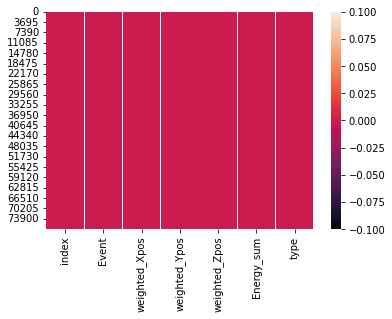

In [ ]:
sns.heatmap(data.isnull())

## Count-type
##0: Source
##1: Albedo
##2: CXB

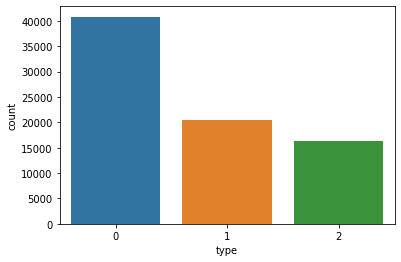

In [ ]:
sns.countplot(x='type',data=data)

##Mean calculations

In [ ]:
data2 = data.copy()
data2['Energy_sum_mean'] = data2.groupby('type').Energy_sum.transform(np.mean)
data2['weighted_Zpos_mean'] = data2.groupby('type').weighted_Zpos.transform(np.mean)
data2['weighted_Ypos_mean'] = data2.groupby('type').weighted_Ypos.transform(np.mean)
data2['weighted_Xpos_mean'] = data2.groupby('type').weighted_Xpos.transform(np.mean)
data2
#sns.countplot(x='type',hue='Energy_sum_mean',data=data2)

index  Event  weighted_Xpos  weighted_Ypos  weighted_Zpos  Energy_sum  \
0      10022  10023       7.278802       1.156442       0.001726    18.97150   
1       1128   1129       9.118012      20.462400       0.006897    12.03998   
2       4446   4447       2.392570      14.715600       0.985242   208.07300   
3       4156   4157      14.223512      14.637870       4.952129   231.15908   
4       9647   9648      17.223133      10.889800       0.014562    18.78020   
...      ...    ...            ...            ...            ...         ...   
77583   9881   9882      21.352449      18.231319       4.688545    57.92430   
77584  14035  14036      11.341864      21.002682       0.209599    22.17320   
77585  14211  14212      14.396664      19.658918       0.116739    22.11630   
77586   8647   8648      16.813800      21.733846       0.023191    18.46040   
77587   8723   8724      17.337722      10.516178       0.185679    18.09800   

       type  Energy_sum_mean  weighted_Zpos_mean  weighted_Ypos_mean  \
0         0        37.536661            0.272135           13.209296   
1         0        37.536661            0.272135           13.209296   
2         1       362.285391            2.631646           12.887725   
3         1       362.285391            2.631646           12.887725   
4         0        37.536661            0.272135           13.209296   
...     ...              ...                 ...                 ...   
77583     2        73.831439            4.021769           13.221325   
77584     0        37.536661            0.272135           13.209296   
77585     0        37.536661            0.272135           13.209296   
77586     0        37.536661            0.272135           13.209296   
77587     0        37.536661            0.272135           13.209296   

       weighted_Xpos_mean  
0               12.716174  
1               12.716174  
2               12.690732  
3               12.690732  
4               12.716174  
...                   ...  
77583           12.779035  
77584           12.716174  
77585           12.716174  
77586           12.716174  
77587           12.716174  

[77588 rows x 11 columns]

### ENERGY

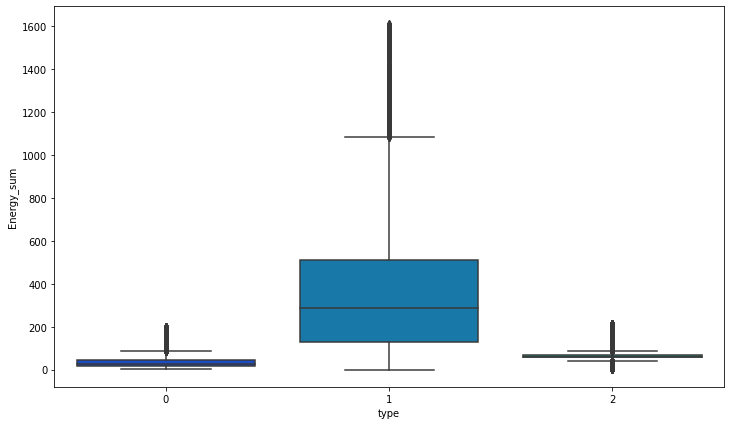

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='type',y='Energy_sum',data=data2,palette='winter')
plt.show()

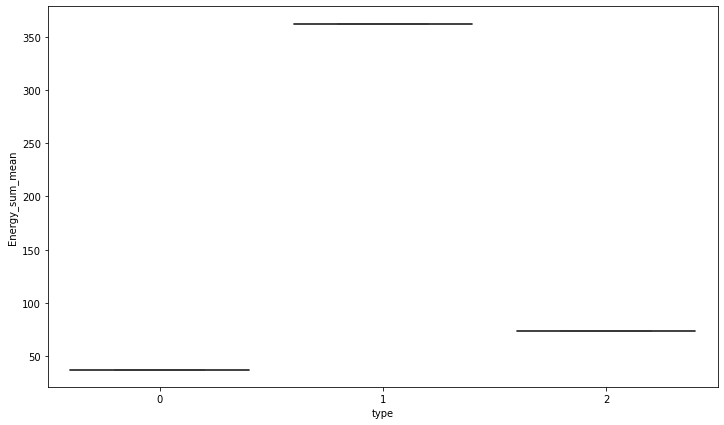

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='type',y='Energy_sum_mean',data=data2,palette='winter')
plt.show()

###Z POSITION

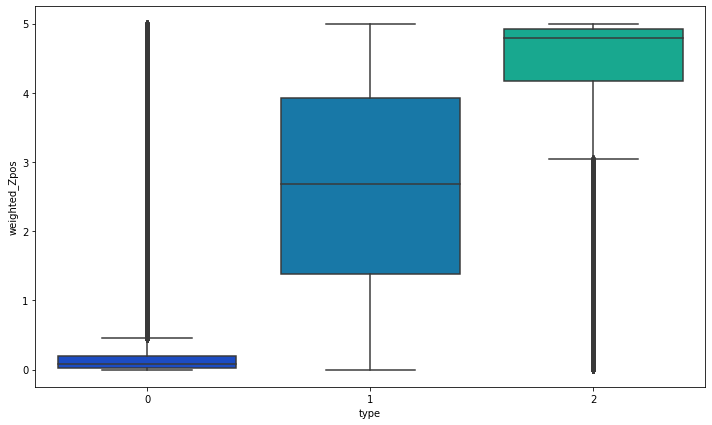

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='type',y='weighted_Zpos',data=data2,palette='winter')
plt.show()

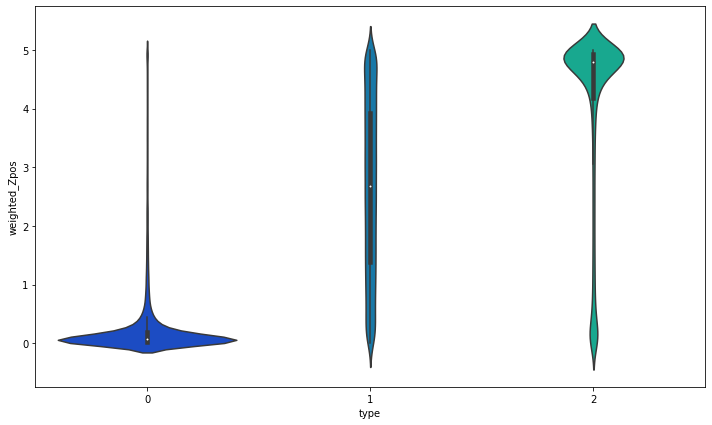

In [ ]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='type',y='weighted_Zpos',data=data2,palette='winter')
plt.show()

###Y POSITION

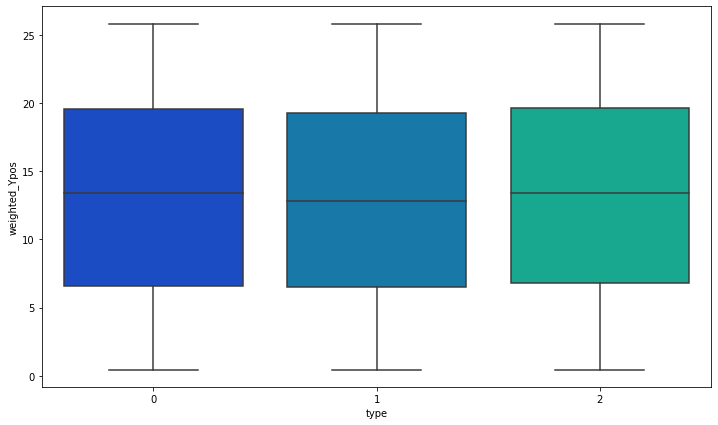

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='type',y='weighted_Ypos',data=data2,palette='winter')
plt.show()

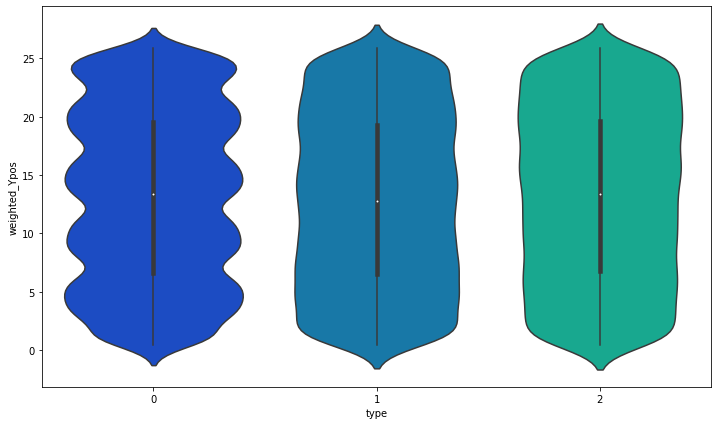

In [ ]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='type',y='weighted_Ypos',data=data2,palette='winter')
plt.show()

### X POSITION

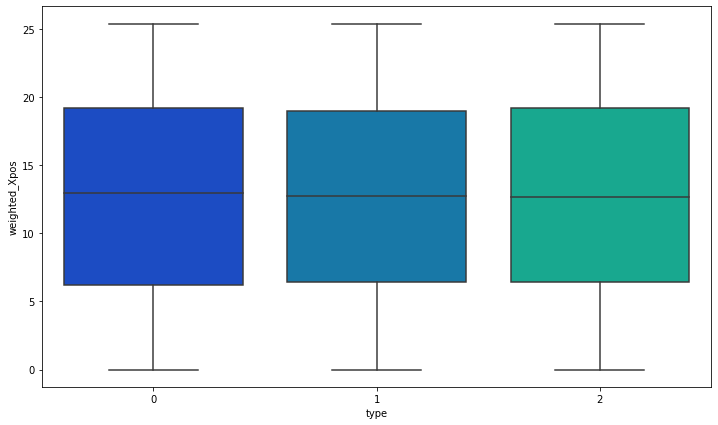

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='type',y='weighted_Xpos',data=data2,palette='winter')
plt.show()

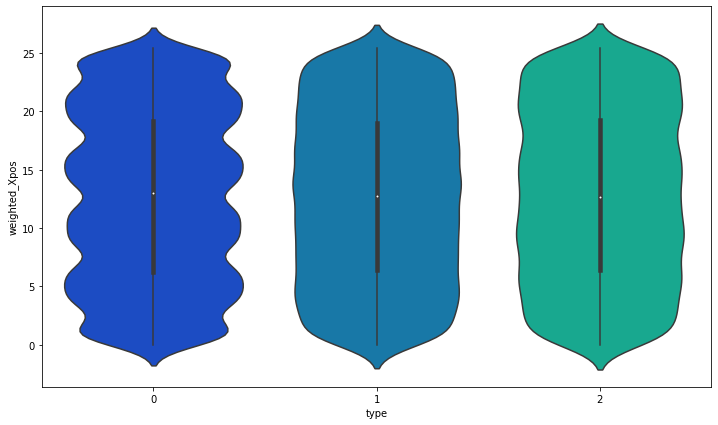

In [ ]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='type',y='weighted_Xpos',data=data2,palette='winter')
plt.show()

## LoG Model Results

In [ ]:
data2['source'] = data2['type'].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
# daha iyi ölçmek için %50 source %50 background veri ayarladık

#data_2 = data2[data2['type'] == 2]
data_1 = data2[data2['type'] == 1].iloc[0:40798]
data_0 = data2[data2['type'] == 0]
data50 = data_0.append(data_1)
#data50 = data50.append(data_2)
data50 = data50.sample(frac=1)
data50 = data50.reset_index(drop=False)
data50

level_0   index   Event  Cloud_num  weighted_Xpos  weighted_Ypos  \
0       209939   16945   16946          0       8.886647      22.905859   
1        26457  142196  142197          0      11.875399      14.105040   
2         8171  180239  180240          0       1.818933      11.605858   
3       137154    5346    5347          0       4.399819      20.086969   
4         6764   66437   66438          0      20.845554      12.206371   
...        ...     ...     ...        ...            ...            ...   
81591   246772   23192   23193          0      11.225182       8.736599   
81592   245802   40615   40616          0       5.621964       4.248328   
81593    31007   19843   19844          0       4.272850       9.276340   
81594     7732   62232   62233          0      11.412561       0.800573   
81595    16646  169585  169586          0      23.099220      17.802469   

       weighted_Zpos   Energy_sum  type  Energy_sum_mean  weighted_Zpos_mean  \
0           0.107465     25.07280     0        37.536661            0.272135   
1           4.540577   4418.51463     1      3046.240260            2.384476   
2           3.259008  13837.20180     1      3046.240260            2.384476   
3           0.027693     15.91370     0        37.536661            0.272135   
4           3.423431    510.99980     1      3046.240260            2.384476   
...              ...          ...   ...              ...                 ...   
81591       0.046015     32.24440     0        37.536661            0.272135   
81592       3.344309    170.85800     0        37.536661            0.272135   
81593       0.510868    389.36400     1      3046.240260            2.384476   
81594       3.653665   1911.68445     1      3046.240260            2.384476   
81595       3.080190   4613.46720     1      3046.240260            2.384476   

       weighted_Ypos_mean  weighted_Xpos_mean  source  
0               13.209296           12.716174       1  
1               13.061027           12.718751       0  
2               13.061027           12.718751       0  
3               13.209296           12.716174       1  
4               13.061027           12.718751       0  
...                   ...                 ...     ...  
81591           13.209296           12.716174       1  
81592           13.209296           12.716174       1  
81593           13.061027           12.718751       0  
81594           13.061027           12.718751       0  
81595           13.061027           12.718751       0  

[81596 rows x 14 columns]

In [ ]:
data_deneme = data2.copy()

In [ ]:
data_deneme = data_deneme[['weighted_Xpos','weighted_Ypos','weighted_Zpos','Energy_sum','source']]

In [ ]:
from sklearn.model_selection import train_test_split

#data_deneme.drop('Vertex_pos',axis=1,inplace=True)
#data_deneme.drop('type',axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data_deneme.drop('source',axis=1), 
                                                    data_deneme['source'], test_size=0.20, 
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7361
           1       0.91      0.95      0.93      8157

    accuracy                           0.92     15518
   macro avg       0.92      0.92      0.92     15518
weighted avg       0.92      0.92      0.92     15518



## LoG Model Results 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
X = data_deneme[['weighted_Xpos','weighted_Ypos','weighted_Zpos','Energy_sum']]
y = data_deneme['source']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

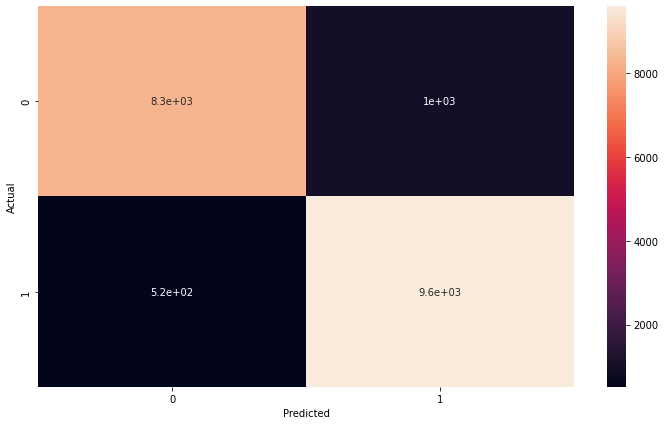

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True)
plt.show()

**TP = True Positives = 9800**

**TN = True Negatives = 9400**

**FP = False Positives = 780**

**FN = False Negatives = 400**

**Accuracy = (TP+TN)/Total = (9800+9400)/20380 = 0.942**

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9217404753312368


## Neural Network

In [ ]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
# split into X and Y
Y = data_deneme['source']
X = data_deneme.drop(['source'], axis=1)

print(X.shape)
print(Y.shape)

# convert to numpy arrays
X = np.array(X)

(77588, 4)
(77588,)


In [ ]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=25, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                80        
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
6207/6207 [==============================] - 14s 2ms/step - loss: 0.2389 - accuracy: 0.9146 - val_loss: 0.2058 - val_accuracy: 0.9253
Epoch 2/25
6207/6207 [==============================] - 14s 2ms/step - loss: 0.2050 - accuracy: 0.9276 - val_loss: 0.2043 - val_accuracy: 0.9278
Epoch 3/25
6207/6207 [========

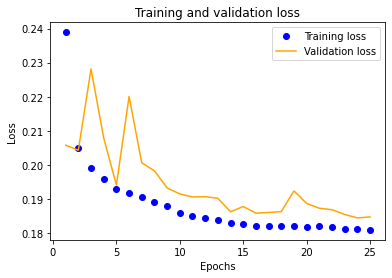

In [ ]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

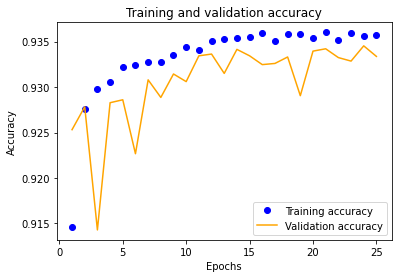

0.9345276355743408

In [ ]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(X) # prob of successes (survival)
np.round(model.predict(X),0) # 1 and 0 (survival or not)
Y # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X),0)

# confusion matrix
print(confusion_matrix(Y, preds)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])

print(classification_report(Y, preds))

[[33777  3013]
 [ 1972 38826]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     36790
           1       0.93      0.95      0.94     40798

    accuracy                           0.94     77588
   macro avg       0.94      0.93      0.94     77588
weighted avg       0.94      0.94      0.94     77588

